# Predict Credit Card Approval

In today's digital age, access to credit is crucial, but manually analyzing credit card applications can be time-consuming and error-prone. In this project, I used machine learning to build a model that predicts credit card approval with high accuracy, potentially helping lenders make faster and more informed decisions."

### Goals and Approach:
+ My goal is to build a model that could predict whether an applicant would be approved for a credit card based on their data. I started by exploring the data, and identifying patterns and trends. Then, I preprocessed the data by handling missing values, and outliers, and performing necessary transformations. Next, I trained various machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting. Finally, I evaluated the models based on their performance metrics and selected the best one."

### Achievements and Challenges:
+ One key finding from my data analysis was that annual income, family members, and employment duration were the most important features for predicting approval. I used techniques like SMOTE to address imbalanced data, where applicants with high risk were much fewer. Interestingly, during the economic recession, prioritizing recall (catching good applicants) was more important than precision (avoiding bad applicants), so I chose Gradient Boosting as the best model based on its recall score."

### Impact and Skills:
+ My model achieved an accuracy of 88.48%, potentially improving lenders' ability to assess creditworthiness efficiently. This project allowed me to showcase my skills in data analysis, machine learning, and feature engineering. I also learned valuable lessons about ethical considerations in AI models and the importance of tailoring them to specific business contexts."

### Here We follow the Following Steps:
+ Exploratory data analysis(EDA)
+ Feature engineering
+ Feature selection
+ Data preprocessing
+ Model training
+ Model selection

## 1.Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from pathlib import Path
import os
%matplotlib inline

In [2]:
from scipy.stats import probplot, chi2_contingency, chi2, stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from yellowbrick.model_selection import FeatureImportances
import joblib
from sklearn.inspection import permutation_importance
import scikitplot as skplt

## 2.1.Import dataset

In [3]:
credit_card_data = pd.read_csv("dataset/Credit_card.csv")
credit_card_label_data = pd.read_csv("dataset/Credit_card_label.csv")

In [4]:
credit_card_data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [5]:
credit_card_label_data.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

## 2.2.Merge target variable('label') in original dataset

In [6]:
credit_card_full_data = pd.merge(credit_card_data,credit_card_label_data, on = 'Ind_ID')

In [7]:
credit_card_full_data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

## 2.3.Rename Feature

In [8]:
credit_card_full_data = credit_card_full_data.rename(columns = {'Birthday_count' : 'Age', 'label':'Is_high_risk'})

In [9]:
credit_card_full_data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

       Age  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0 -18772.0         365243             1           0      0         0   
1 -13557.0           -586             1           1      1         0   
2      NaN           -586             1           1      1         0   
3 -13557.0           -586             1           1      1         0   
4 -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Is_high_risk  
0             NaN               2             1  
1             NaN               2             1  
2             NaN               2             1  
3             NaN               2             1  
4             NaN               2             1

## 2.4.Split the data into training and test sets

Now we will split the credit_card_data_full_data into a training and testing set. We will use 80% of the data for training and 20% for testing and store them respectively in cc_train_original and cc_test_original variables

In [10]:
# split the data into train and test dataset
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [11]:
# wet set test size 0.2, which means our training data set is 0.8
cc_train_original, cc_test_original = data_split(credit_card_full_data, 0.2)

#### Shape of training data

In [12]:
cc_train_original.shape

(1238, 19)

+ Here we have 19 features(columns) and 1238 observations(rows) for the training dataset.

#### Shape of training data

In [13]:
cc_test_original.shape

(310, 19)

+ Here we have 19 features(columns) and 310 observations(rows) for the testing dataset.

#### Save train and test data

In [14]:
cc_train_original.to_csv('dataset/train.csv',index=False)
cc_test_original.to_csv('dataset/test.csv',index=False)

## 3.1.Exploring the data

In [15]:
credit_card_full_data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

       Age  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0 -18772.0         365243             1           0      0         0   
1 -13557.0           -586             1           1      1         0   
2      NaN           -586             1           1      1         0   
3 -13557.0           -586             1           1      1         0   
4 -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Is_high_risk  
0             NaN               2             1  
1             NaN               2             1  
2             NaN               2             1  
3             NaN               2             1  
4             NaN               2             1

#### Get Features

In [16]:
credit_card_full_data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Is_high_risk'],
      dtype='object')

#### Get Info

In [17]:
credit_card_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

#### Describes
+ The describe() function gives us statistics about the numerical features in the dataset. These statistics include each numerical feature’s count, mean, standard deviation, interquartile range(25%, 50%, 75%), and minimum and maximum values

In [18]:
credit_card_full_data.describe()

Ind_ID     CHILDREN  Annual_income           Age  Employed_days  \
count  1.548000e+03  1548.000000   1.525000e+03   1526.000000    1548.000000   
mean   5.078920e+06     0.412791   1.913993e+05 -16040.342071   59364.689922   
std    4.171759e+04     0.776691   1.132530e+05   4229.503202  137808.062701   
min    5.008827e+06     0.000000   3.375000e+04 -24946.000000  -14887.000000   
25%    5.045070e+06     0.000000   1.215000e+05 -19553.000000   -3174.500000   
50%    5.078842e+06     0.000000   1.665000e+05 -15661.500000   -1565.000000   
75%    5.115673e+06     1.000000   2.250000e+05 -12417.000000    -431.750000   
max    5.150412e+06    14.000000   1.575000e+06  -7705.000000  365243.000000   

       Mobile_phone   Work_Phone        Phone     EMAIL_ID  Family_Members  \
count        1548.0  1548.000000  1548.000000  1548.000000     1548.000000   
mean            1.0     0.208010     0.309432     0.092377        2.161499   
std             0.0     0.406015     0.462409     0.289651        0.947772   
min             1.0     0.000000     0.000000     0.000000        1.000000   
25%             1.0     0.000000     0.000000     0.000000        2.000000   
50%             1.0     0.000000     0.000000     0.000000        2.000000   
75%             1.0     0.000000     1.000000     0.000000        3.000000   
max             1.0     1.000000     1.000000     1.000000       15.000000   

       Is_high_risk  
count   1548.000000  
mean       0.113049  
std        0.316755  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

#### Missing Value
+ Find missing value
+ Also we are using Missingno to visualize the missing values per feature using its matrix function

In [19]:
credit_card_full_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Is_high_risk         0
dtype: int64

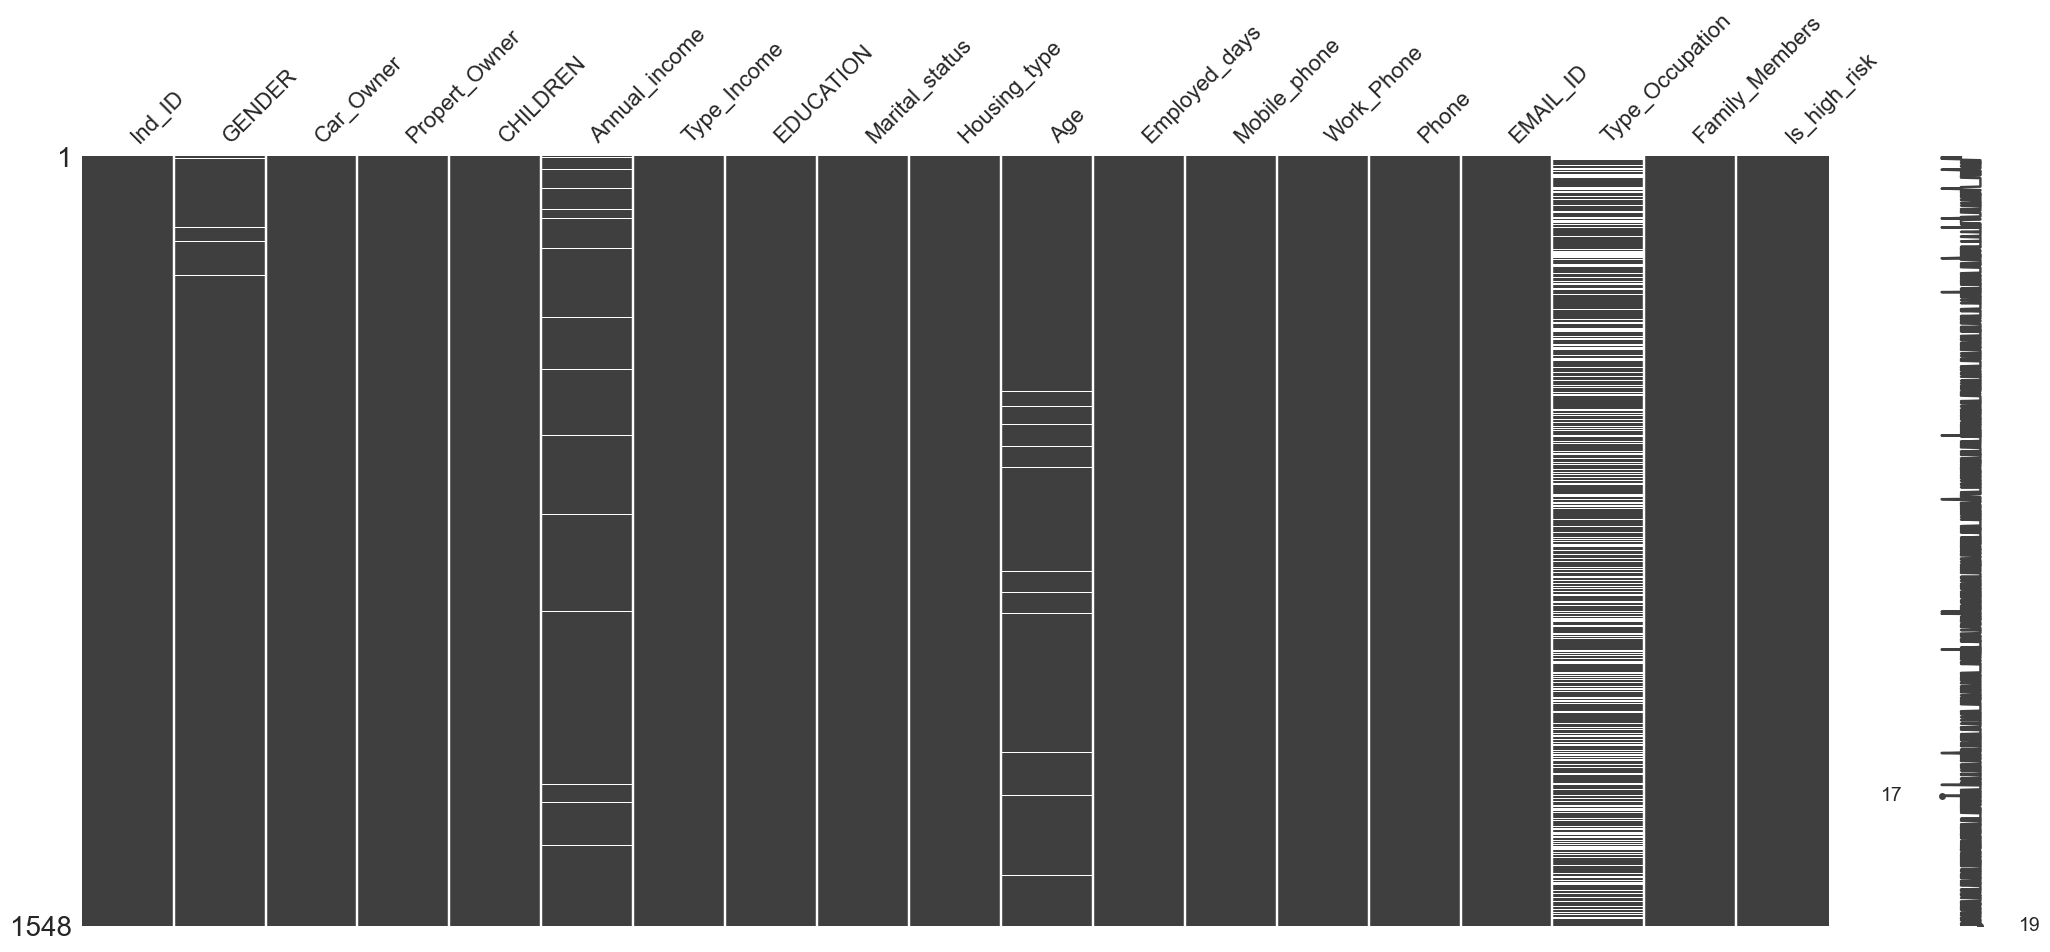

In [20]:
msno.matrix(credit_card_full_data)
plt.show()

+ Here we can see that the GENDER, Annual_income, Age and  Tyoe_Occupation features with missing values. Slim white lines represent missing values

#### Bar Plot
+ we can also use bar() function to have a barplot with the count of non-null values for clear representation of the missing values count

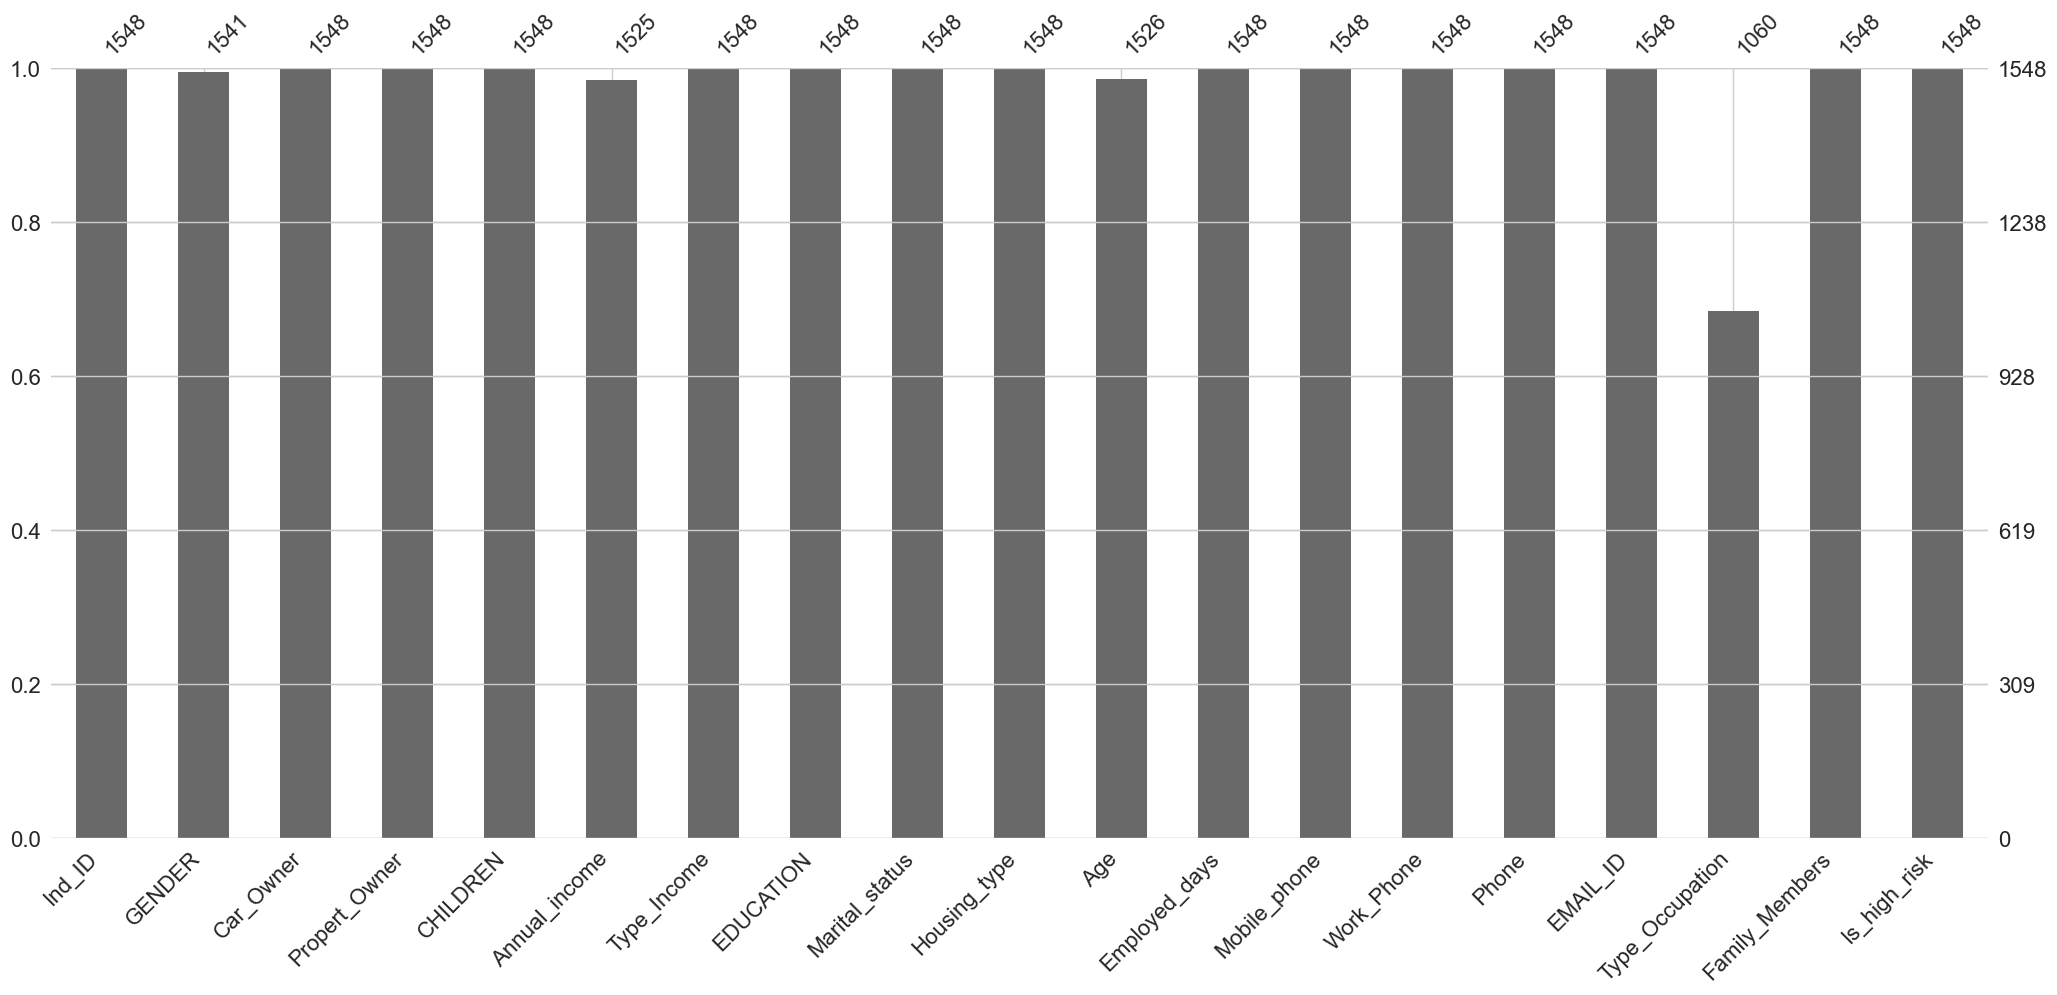

In [21]:
msno.bar(credit_card_full_data)
plt.show()

## 3.2.create a functions to analyze each feature(Univariate analysis)

### 3.2.1.Value Count Freq function
+ we will create first function value_cnt_freq is used to calculate the count of each class in a feature with its frequency (normalized on a scale of 100)

In [22]:
def value_cnt_freq(df, feature):
    # we get the value counts of each feature
    ftr_value_cnt = df[feature].value_counts()
    # we normalize the value counts on a scale of 100
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    # we concatenate the value counts with normalized value count column wise
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    # give it a column name
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    # return the dataframe
    return ftr_value_cnt_concat

### 3.2.2.Feature Info function
+ Create feature_info function that will return the description, the datatype, statistics, the value counts and frequencies.

In [23]:
def feature_info(df, feature):
    # if the feature is Age
    if feature == 'Age':
        # change the feature in positive number of days and divide by 365.25 to convert in year
        print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
        print('*'*40)
        print('Data type:{}'.format(df[feature].dtype))

    # if the feature is Employed_days 
    if feature == 'Employed_days':
        employment_days_no_ret = df['Employed_days'][df['Employed_days'] < 0]
        # change negative to positive values
        employment_days_no_ret_yrs = np.abs(employment_days_no_ret) /365.25
        print('Description:\n{}'.format((employment_days_no_ret_yrs).describe()))
        print('*'*40)
        # print the datatype
        print('Data type:{}'.format(employment_days_no_ret.dtype))

    else:
        # get the description
        print('Description:\n{}'.format(df[feature].describe()))
        # print separators
        print('*'*40)
        # print the datatype
        print('Data type:\n{}'.format(df[feature].dtype))
        # print separators
        print('*'*40)
        # calling the value_cnt_freq function
        value_cnt = value_cnt_freq(df,feature)
        # print the result
        print('Value count:\n{}'.format(value_cnt))

### 3.2.3.Bar Plot Function
+ We are creating a function here to generate a bar plot.

In [24]:
def bar_plot(df,feature):
    if feature == 'Marital_status' or feature == 'Housing_type' or feature == 'Type_Occupation' or feature == 'Type_Income' or feature == 'EDUCATION':
        fig, ax = plt.subplots(figsize=(6,10))
        
        sns.barplot(x=value_cnt_freq(df,feature).index,y=value_cnt_freq(df,feature).values[:,0])
        # set the plot's tick labels to the index from the value_cnt_norm_cal function, rotate those ticks by 45 degrees
        ax.set_xticks(range(len(value_cnt_freq(df, feature).index)))
        ax.set_xticklabels(labels = value_cnt_freq(df,feature).index,rotation=45,ha='right')
        # Give the X-axis the same label as the feature name
        plt.xlabel('{}'.format(feature))
        # Give the Y-axis the label "Count"
        plt.ylabel('Count')
        # Give the plot a title
        plt.title('{} count'.format(feature))
        # Return the title
        return plt.show()
    else:
        fig, ax = plt.subplots(figsize=(6,10))
        sns.barplot(x=value_cnt_freq(df,feature).index,y=value_cnt_freq(df,feature).values[:,0])
        plt.xlabel('{}'.format(feature))
        plt.ylabel('Count')
        plt.title('{} count'.format(feature))
        return plt.show()

### 3.2.4. Pie Chart Function
+ We are creating a function to generate a pie chart plot

In [25]:
def pie_chart_plot(df, feature):
    if feature == 'Housing_type' or feature == 'EDUCATION':
        # call value_cnt_freq function
        ratio_size = value_cnt_freq(df, feature)
        # get how many classes we have
        ratio_size_len = len(ratio_size.index)
        ratio_list = []
        # loop continues until the max range
        for i in range(ratio_size_len):
            # append the ratio of each feature to the list
            ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
        # create subplot
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.pie(ratio_list, startangle=90, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'})
        # add title
        plt.title('Pie chart of {}'.format(feature))
        # add legend
        plt.legend(loc='best', labels=ratio_size.index)
        # center the plot in the subplot
        plt.axis('equal')

        return plt.show()

    # For other features
    else:
        ratio_size = value_cnt_freq(df, feature)
        ratio_size_len = len(ratio_size.index)
        ratio_list = []
        for i in range(ratio_size_len):
            ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
        # create subplot    
        fig, ax = plt.subplots(figsize=(8, 8))
        plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
        # add title
        plt.title('Pie chart of {}'.format(feature))
        # add legend
        plt.legend(loc='best')
        # axis equal to ensure that pie is drawn as a circle.
        plt.axis('equal')
        # return the plot
        return plt.show()

          

### 3.2.5.Box-Plot Function
+ We are creating a function for generating a box plot.

In [26]:
def box_plot(df,feature):
    if feature == 'Age':
        fig, ax = plt.subplots(figsize = (2,8))
        # convert the feature in positive numbers days
        sns.boxplot(y = np.abs(df[feature])/365.25)
        plt.title('{} distribution(Boxplot)'.format(feature))
        return plt.show()

    if feature == 'CHILDREN':
        fig, ax = plt.subplots(figsize=(2,8))
        sns.boxplot(y=df[feature])
        plt.title('{} distribution(Boxplot)'.format(feature))
        # using the numpy arrange to populate the Y ticks starting from 0 till the max count of children with an interval of 1 
        # as follows np.arange(start, stop, step)
        plt.yticks(np.arange(0,df[feature].max(),1))
        return plt.show()

    if feature == 'Employed_days':
        fig, ax = plt.subplots(figsize=(2,8))
        employment_days_no_ret = df['Employed_days'][df['Employed_days'] < 0]
        # change negative to positive values
        employment_days_no_ret_yrs = np.abs(employment_days_no_ret) /365.25

        # create boxplot
        sns.boxplot(y = employment_days_no_ret_yrs)
        plt.title('{} distribution(Boxplot)'.format(feature))
        # set y-axis ticks from 0 to the max value with an interval of 2
        plt.yticks(np.arange(0,employment_days_no_ret_yrs.max(),2))
        return plt.show()

    if feature == 'Annual_income':
        fig, ax = plt.subplots(figsize=(2,8))
        sns.boxplot(y=df[feature])
        plt.title('{} distribution(Boxplot)'.format(feature))
        # format y-axis ticks as integers with commas
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        return plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(2,8))
        sns.boxplot(y=df[feature])
        plt.title('{} distribution(Boxplot)'.format(feature))
        return plt.show()

### 3.2.6.Histogram Function
+ We are creating a function to generate a histogram.

In [27]:
def hist_plot(df, feature, the_bins = 50):
    if feature == 'Age':
        fig, ax = plt.subplots(figsize = (18,10))
        # convert the feature in positive numbers of days
        sns.histplot(np.abs(df[feature])/365.25,bins=the_bins,kde=True)
        plt.title('{} distribution'.format(feature))
        return plt.show()
        
    elif feature == 'Annual_income':
        fig, ax = plt.subplots(figsize=(18,10))
        sns.histplot(df[feature], bins = the_bins, kde = True)
        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.title('{} distribution'.format(feature))
        return plt.show()
        
    elif feature == 'Employed_days':
        fig, ax = plt.subplots(figsize=(18,10))
        employment_days_no_ret = df['Employed_days'][df['Employed_days'] < 0]
        # change negative to positive values
        employment_days_no_ret_yrs = np.abs(employment_days_no_ret) /365.25
        sns.histplot(employment_days_no_ret_yrs,bins=the_bins,kde=True)
        plt.title('{} distribution'.format(feature))
        return plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(18,10))
        sns.histplot(df[feature],bins=the_bins,kde=True)
        plt.title('{} distribution'.format(feature))
        return plt.show()      

### 3.2.7.Low vs High Risk Box Plot Function
+ This function will plot two box plots: one for low-risk (good client) applicants and the other for high-risk (bad client) applicants.

In [28]:
def low_vs_high_risk_box_plot(df, feature):
    if feature == 'Age':
        print(np.abs(df.groupby('Is_high_risk')[feature].mean()/365.25))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature])/365.25,x=df['Is_high_risk'])
        # add ticks to the X axis
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        plt.title('High risk grouped by age')
        return plt.show()

    if feature == 'Annual_income':
        print(np.abs(df.groupby('Is_high_risk')[feature].mean()))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature]),x=df['Is_high_risk'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.title('High risk grouped by {}'.format(feature))
        return plt.show() 

    if feature == 'Employed_days':
        # check an applicant is high risk or not
        employment_no_ret = cc_train_original['Employed_days'][cc_train_original['Employed_days'] <0]
        employment_no_ret_idx = employment_no_ret.index
        employment_days_no_ret_yrs = np.abs(employment_no_ret)/365.25
        # extract those who are employed from the original dataframe and return only the employment length and Is high risk columns
        employment_no_ret_df = cc_train_original.iloc[employment_no_ret_idx][['Employed_days','Is_high_risk']]
        # return the mean employment length group by how risky is the applicant
        employment_no_ret_is_high_risk = employment_no_ret_df.groupby('Is_high_risk')['Employed_days'].mean()
        print(np.abs(employment_no_ret_is_high_risk)/365.25)
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y= employment_days_no_ret_yrs,x=df['Is_high_risk'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        plt.title('High vs low risk  grouped by {}'.format(feature))
        return plt.show()

    else:
        print(np.abs(df.groupby('Is_high_risk')[feature].mean()))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature]),x=df['Is_high_risk'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        plt.title('High risk grouped by {}'.format(feature))
        return plt.show()

### 3.2.8.Low vs High Risk Bar Plot
+ We are creating a function for a bar plot comparing Low and High categories.

In [29]:
def low_high_risk_bar_plot(df, feature):
    # Group by the specified feature and sum the high-risk applicants
    is_high_risk_grp = df.groupby(feature)['Is_high_risk'].sum()
    # Sort in descending order
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(6, 10))
    sns.barplot(x=is_high_risk_grp_srt.index, y=is_high_risk_grp_srt.values)

    # Set the ticks and labels after creating the plot
    ax.set_xticks(range(len(is_high_risk_grp_srt)))
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index, rotation=45, ha='right')

    plt.ylabel('Count')
    plt.title(f'High risk applicants count grouped by {feature}')
    plt.show()

# Example usage:
# low_high_risk_bar_plot(your_dataframe, 'Marital_status')


# 3.3.Univariate Analysis

### Age

In [30]:
feature_info(cc_train_original, 'Age')

Description:
count    1220.000000
mean       43.863197
std        11.521349
min        22.422998
25%        33.952772
50%        42.945927
75%        53.479808
max        68.298426
Name: Age, dtype: float64
****************************************
Data type:float64
Description:
count     1220.000000
mean    -16021.032787
std       4208.172710
min     -24946.000000
25%     -19533.500000
50%     -15686.000000
75%     -12401.250000
max      -8190.000000
Name: Age, dtype: float64
****************************************
Data type:
float64
****************************************
Value count:
          Count  Frequency (%)
Age                           
-21363.0      5       0.409836
-13557.0      5       0.409836
-18173.0      4       0.327869
-14523.0      4       0.327869
-13682.0      3       0.245902
...         ...            ...
-14661.0      1       0.081967
-8304.0       1       0.081967
-18661.0      1       0.081967
-15429.0      1       0.081967
-18348.0      1       0.081967

[

+ we can see that the youngest applicants is 22 year old while the oldest is 68.and average age is 43.86 and median age is 42.94

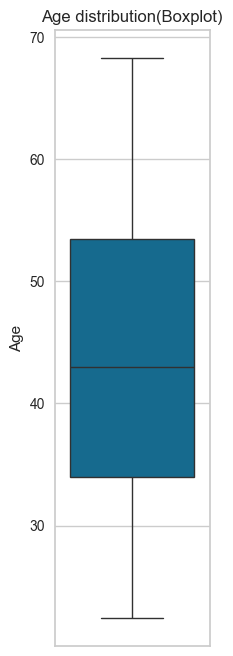

In [31]:
box_plot(cc_train_original,'Age')

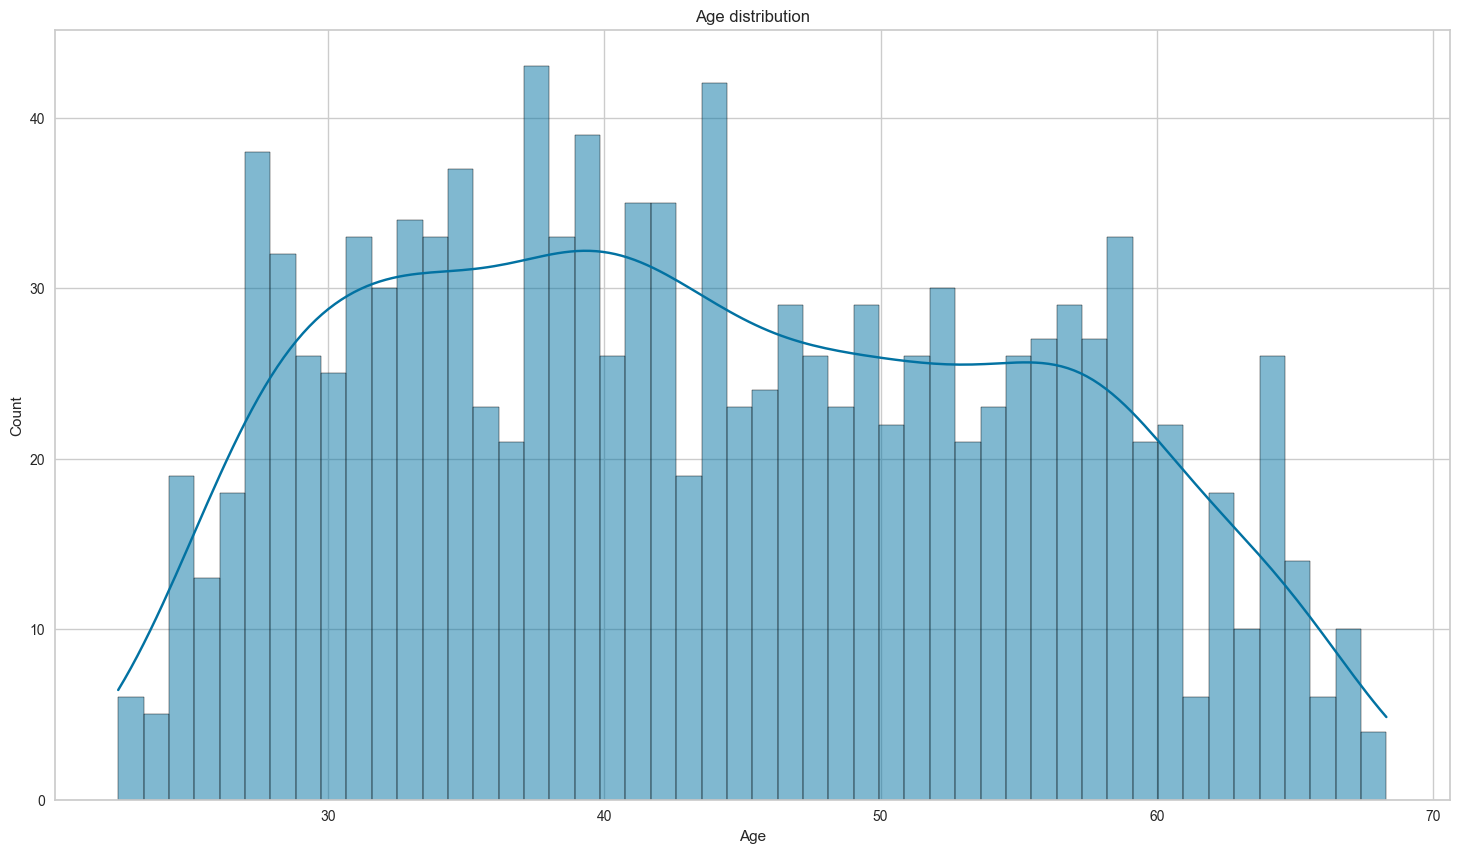

In [32]:
hist_plot(cc_train_original,'Age')

+ we plot histogrma with the kernal  density estimator. we can see 'Age' is not normally distributed.it is sligtly positively skewed.

Is_high_risk
0    43.733156
1    44.834892
Name: Age, dtype: float64


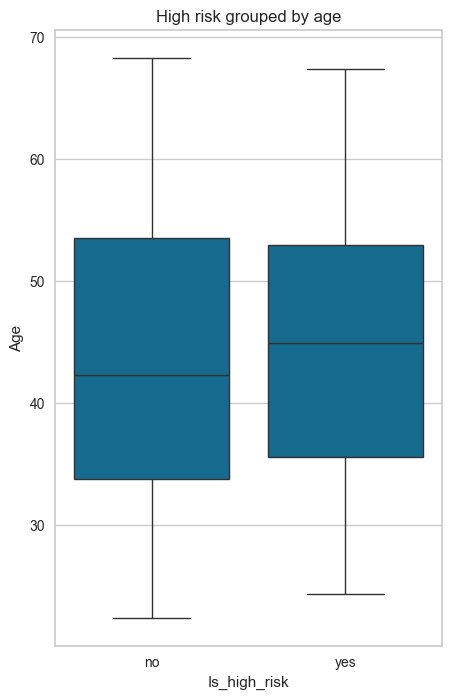

In [33]:
low_vs_high_risk_box_plot(cc_train_original, 'Age')

+ we can see that there is no significance difference between the age of those who are high risk and those who are not. The mean age for both group is around 43 year old and there is no correlation between the age and risk factors of the applicants.

### Gender

In [34]:
feature_info(cc_train_original, 'GENDER')

Description:
count     1232
unique       2
top          F
freq       778
Name: GENDER, dtype: object
****************************************
Data type:
object
****************************************
Value count:
        Count  Frequency (%)
GENDER                      
F         778      63.149351
M         454      36.850649


+ we can see that have two unique classes F(Female) and M(Male) with 778 and 454 repectively. And have 63.14% female and 36.85% Male

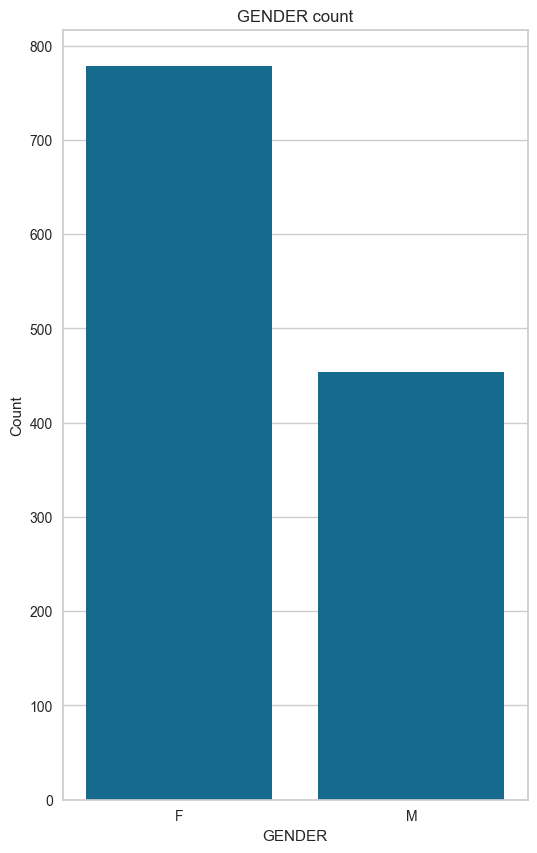

In [35]:
bar_plot(cc_train_original,'GENDER')

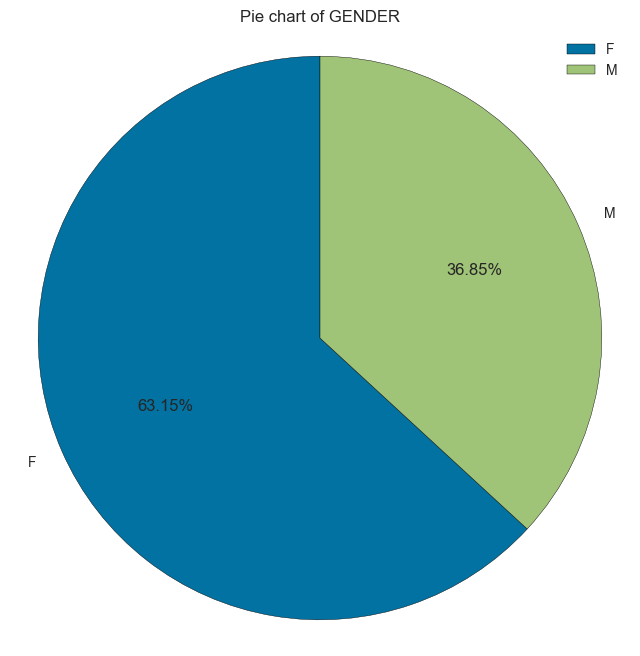

In [36]:
pie_chart_plot(cc_train_original,'GENDER')

### Marital_status

In [37]:
feature_info(cc_train_original,'Marital_status')

Description:
count        1238
unique          5
top       Married
freq          848
Name: Marital_status, dtype: object
****************************************
Data type:
object
****************************************
Value count:
                      Count  Frequency (%)
Marital_status                            
Married                 848      68.497577
Single / not married    183      14.781906
Civil marriage           76       6.138934
Separated                71       5.735057
Widow                    60       4.846527


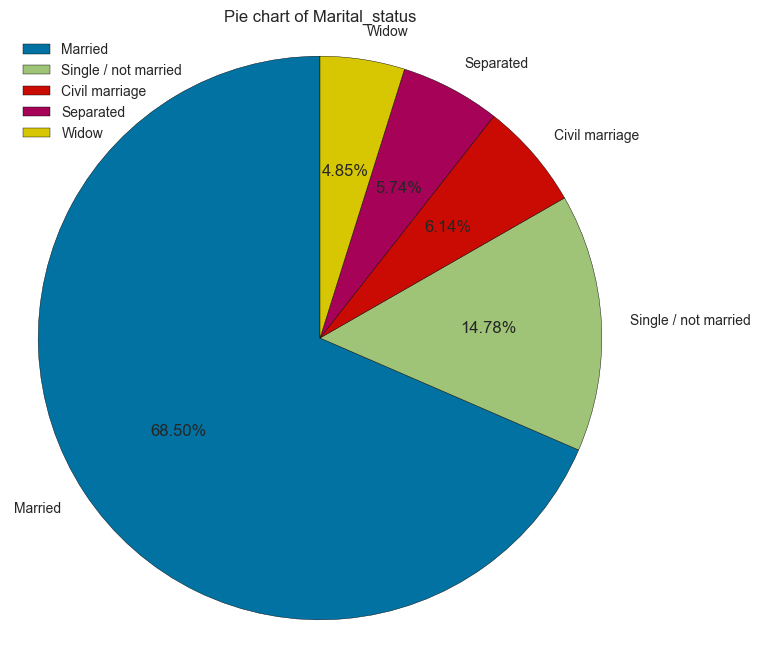

In [38]:
pie_chart_plot(cc_train_original,'Marital_status')

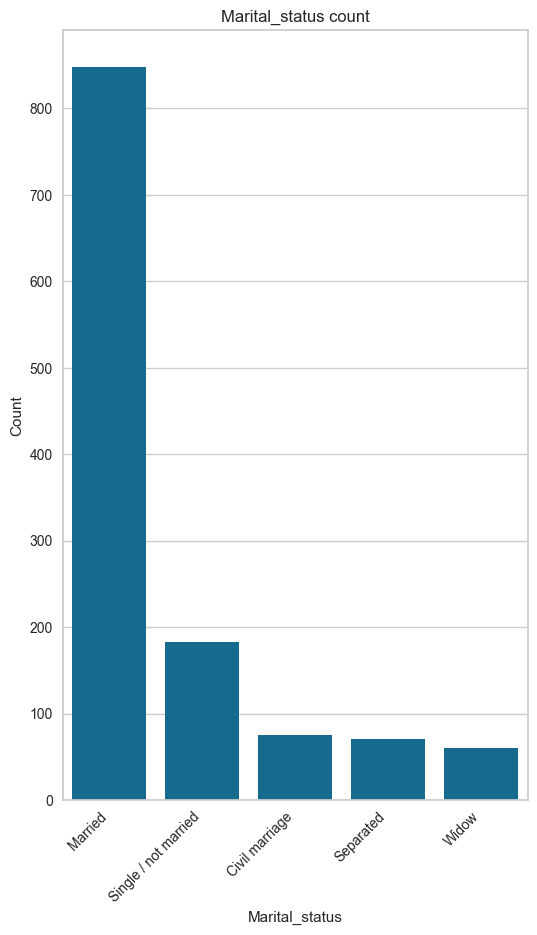

In [39]:
bar_plot(cc_train_original,'Marital_status')

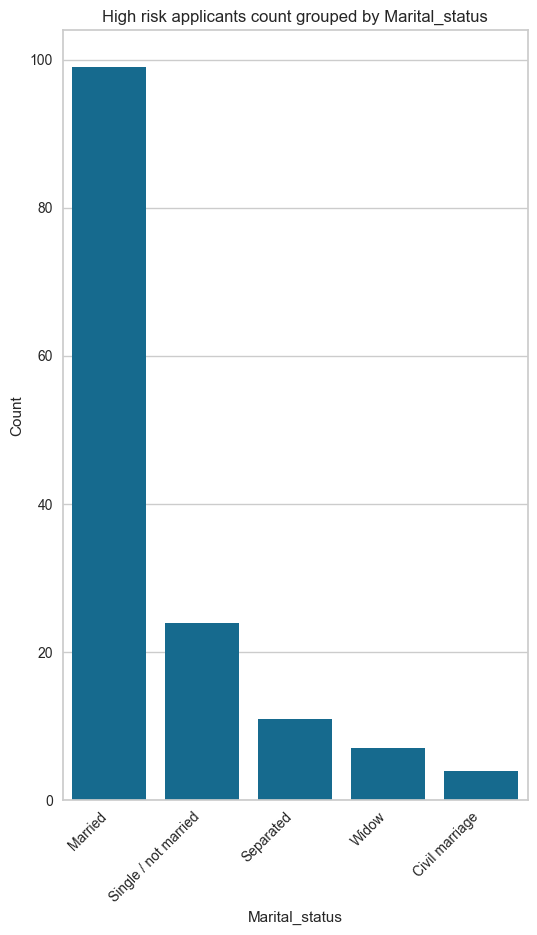

In [40]:
low_high_risk_bar_plot(cc_train_original,'Marital_status')

+ Here we can see there are 5 unique classes.Most applicants belong to married with 68.50 % .
+ interesting observation we can see  that even though we have a higher number of applicants who are separated than widows.but widow applicants are high risk than those who are separated.

### Family_Members

In [41]:
feature_info(cc_train_original,'Family_Members')

Description:
count    1238.000000
mean        2.172052
std         0.968524
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family_Members, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
                Count  Frequency (%)
Family_Members                      
2                 642      51.857835
1                 264      21.324717
3                 214      17.285945
4                 102       8.239095
5                  14       1.130856
15                  1       0.080775
6                   1       0.080775


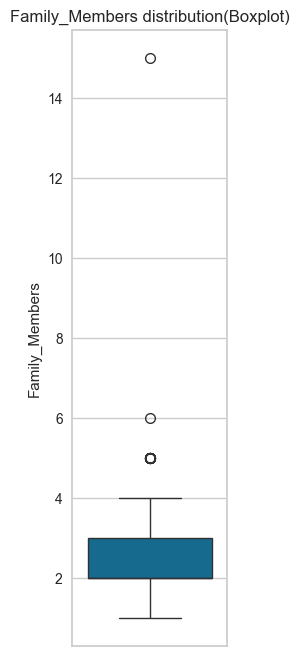

In [42]:
box_plot(cc_train_original,'Family_Members')

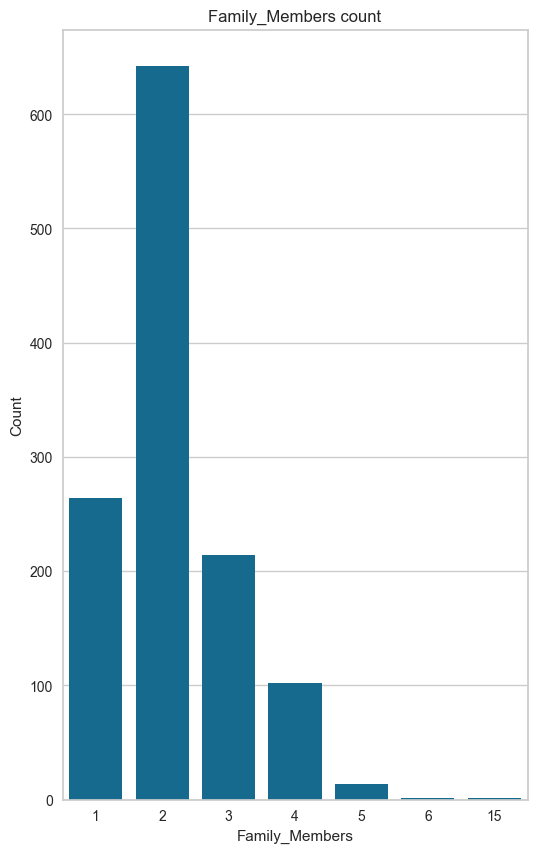

In [43]:
bar_plot(cc_train_original,'Family_Members')

+ we can see this is numerical feature with the median of 2 family members with 51.85%(642) of all , followed by single family member with 21.32%(264)
+ In box plot we can see there are three outlier 5 and two are extream with 6 and 15 members. 

### CHILDREN

In [44]:
feature_info(cc_train_original,'CHILDREN')

Description:
count    1238.000000
mean        0.421648
std         0.804142
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: CHILDREN, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
          Count  Frequency (%)
CHILDREN                      
0           869      70.193861
1           245      19.789984
2           107       8.642973
3            15       1.211632
14            1       0.080775
4             1       0.080775


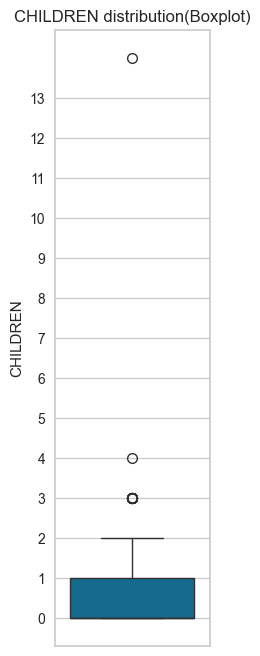

In [45]:
box_plot(cc_train_original,'CHILDREN')

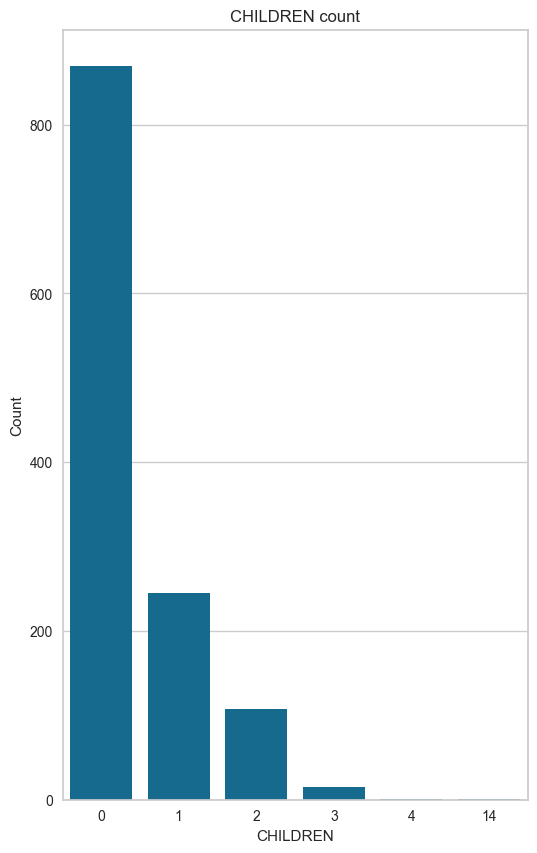

In [46]:
bar_plot(cc_train_original,'CHILDREN')

+ Here we can see most applicants don't have a child
+ Also here have three outlier 3 and extream outlier with 4 and 15  

### Housing_type

In [47]:
feature_info(cc_train_original,'Housing_type')

Description:
count                  1238
unique                    6
top       House / apartment
freq                   1107
Name: Housing_type, dtype: object
****************************************
Data type:
object
****************************************
Value count:
                     Count  Frequency (%)
Housing_type                             
House / apartment     1107      89.418417
With parents            58       4.684976
Municipal apartment     45       3.634895
Rented apartment        18       1.453958
Office apartment         6       0.484653
Co-op apartment          4       0.323102


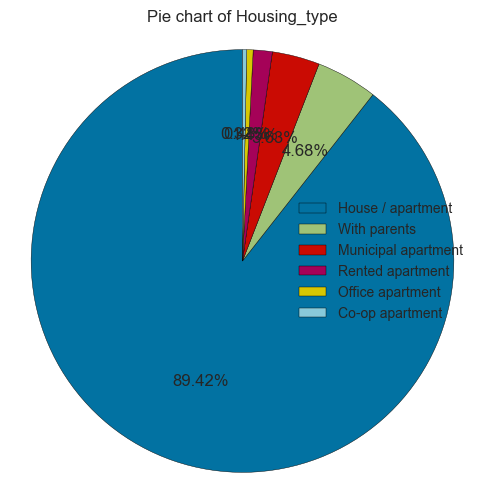

In [48]:
pie_chart_plot(cc_train_original,'Housing_type')

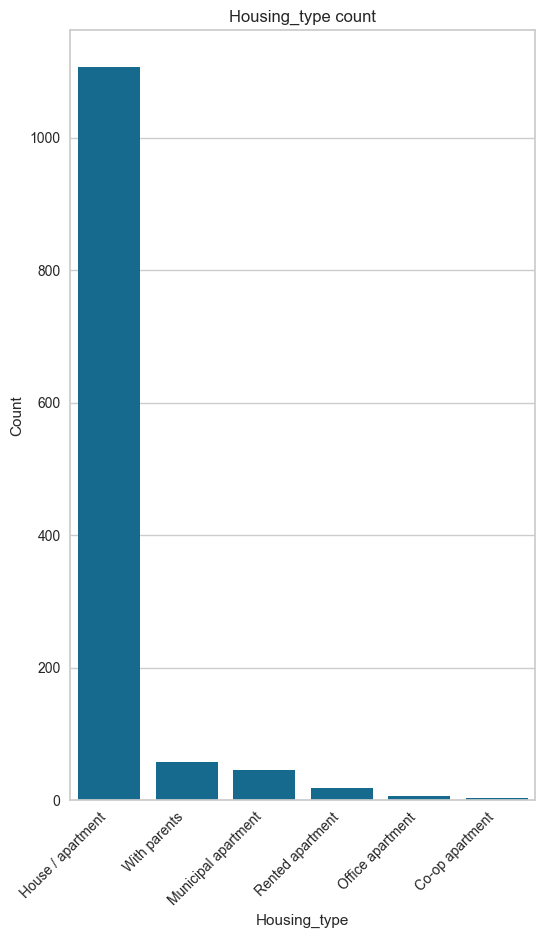

In [49]:
bar_plot(cc_train_original, 'Housing_type')

+ we can see 89.42 % applicants lives in House/apartment

### Annual_income

In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
feature_info(cc_train_original,'Annual_income')

Description:
count      1222.00
mean     194770.84
std      117728.60
min       33750.00
25%      126000.00
50%      172125.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64
****************************************
Data type:
float64
****************************************
Value count:
               Count  Frequency (%)
Annual_income                      
135000.00        135          11.05
112500.00        114           9.33
180000.00        107           8.76
157500.00         95           7.77
225000.00         91           7.45
...              ...            ...
787500.00          1           0.08
175500.00          1           0.08
95850.00           1           0.08
215100.00          1           0.08
382500.00          1           0.08

[104 rows x 2 columns]


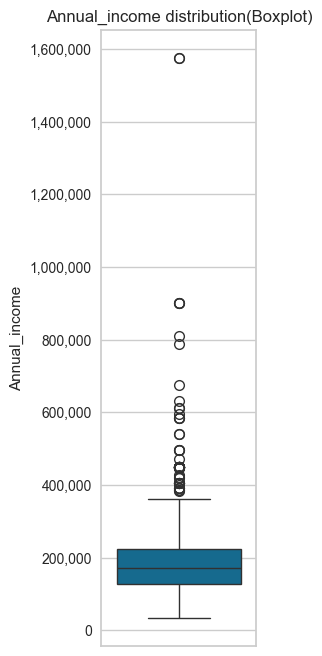

In [51]:
box_plot(cc_train_original,'Annual_income')

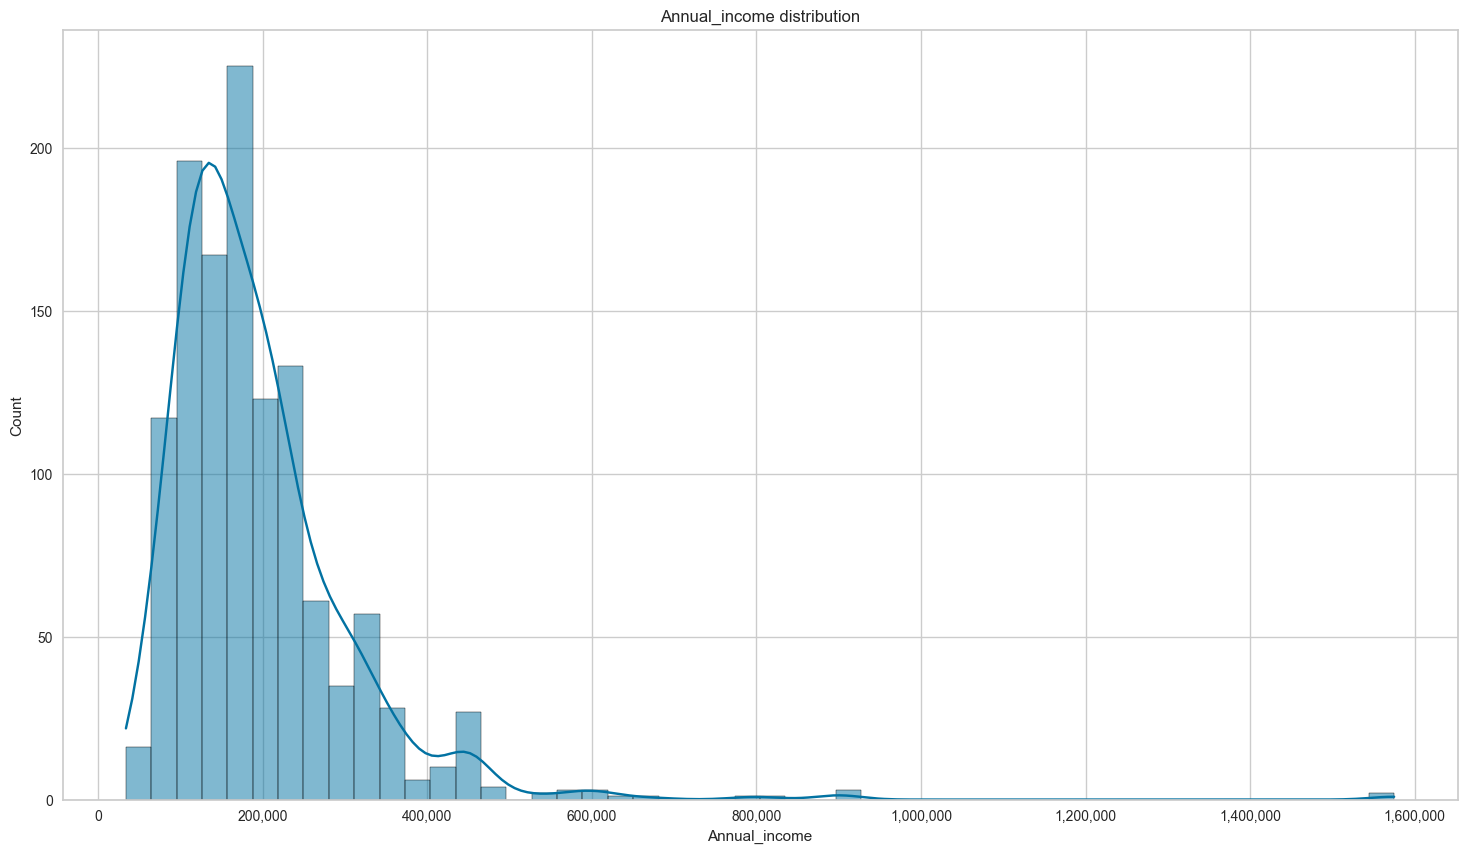

In [52]:
hist_plot(cc_train_original,'Annual_income')

Is_high_risk
0   193525.39
1   204396.43
Name: Annual_income, dtype: float64


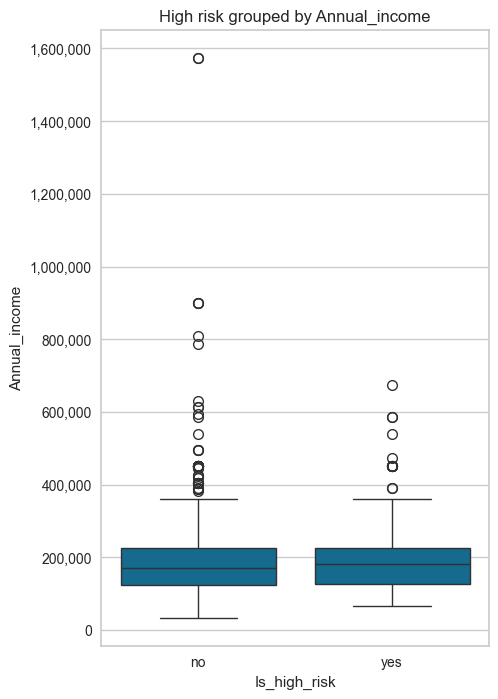

In [53]:
# bivariate analysis with target variable
low_vs_high_risk_box_plot(cc_train_original,'Annual_income')

+ we can see average income is 194770.84 but this amount is outlier, Most people make 172125, if we ignore the the outliers
+ we can see in the box plot it is positively skewed
+ low risk and high risk applicants almost similar income

### Type_Occupation

In [54]:
feature_info(cc_train_original, 'Type_Occupation')

Description:
count          838
unique          18
top       Laborers
freq           210
Name: Type_Occupation, dtype: object
****************************************
Data type:
object
****************************************
Value count:
                       Count  Frequency (%)
Type_Occupation                            
Laborers                 210          25.06
Core staff               141          16.83
Managers                 112          13.37
Sales staff               91          10.86
Drivers                   70           8.35
High skill tech staff     51           6.09
Medicine staff            39           4.65
Accountants               37           4.42
Security staff            18           2.15
Cooking staff             17           2.03
Private service staff     15           1.79
Cleaning staff            14           1.67
Secretaries                7           0.84
Low-skill Laborers         5           0.60
Waiters/barmen staff       5           0.60
HR staff     

In [55]:
Type_Occupation_nan_count = cc_train_original['Type_Occupation'].isna().sum()
Type_Occupation_nan_count

400

In [56]:
rows_total_count = cc_train_original.shape[0]

In [57]:
print('The missing value percentage is {:.2f} %'.format(Type_Occupation_nan_count * 100 / rows_total_count))

The missing value percentage is 32.31 %


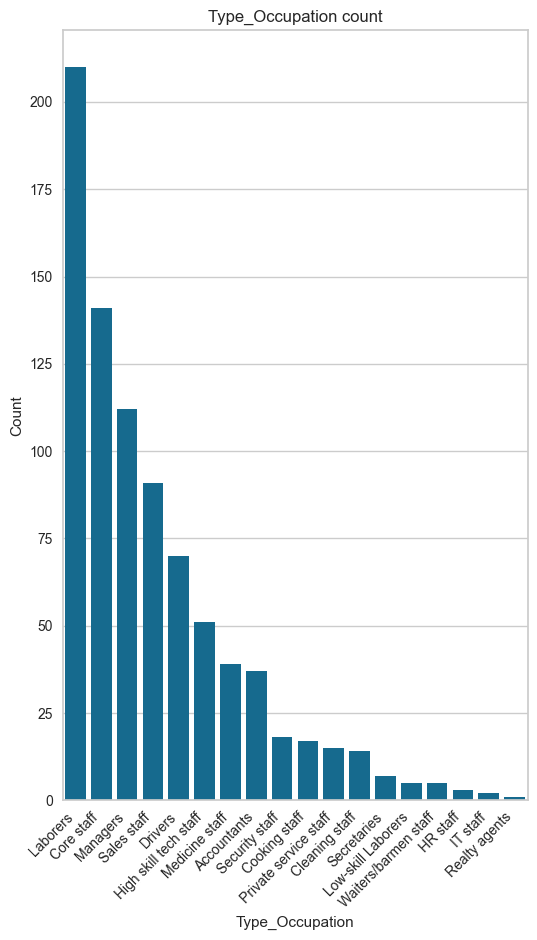

In [58]:
bar_plot(cc_train_original,'Type_Occupation')

+ we can see most Type Occupation is Laborers with 210(25.06%), followed by Core staff with 141(16.83%)
+ Also have 32.31 % of missing data

### Type_Income

In [59]:
feature_info(cc_train_original, 'Type_Income')

Description:
count        1238
unique          4
top       Working
freq          634
Name: Type_Income, dtype: object
****************************************
Data type:
object
****************************************
Value count:
                      Count  Frequency (%)
Type_Income                               
Working                 634          51.21
Commercial associate    292          23.59
Pensioner               216          17.45
State servant            96           7.75


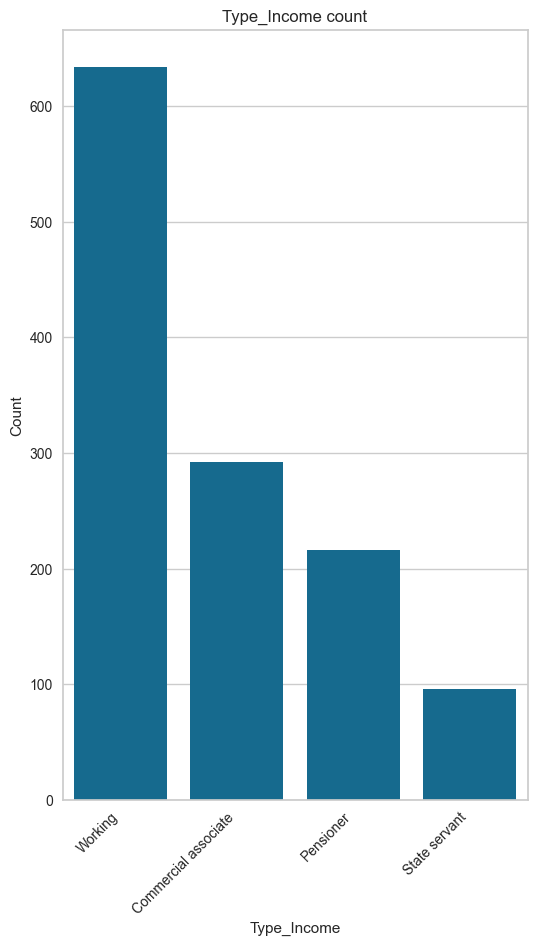

In [60]:
bar_plot(cc_train_original,'Type_Income')

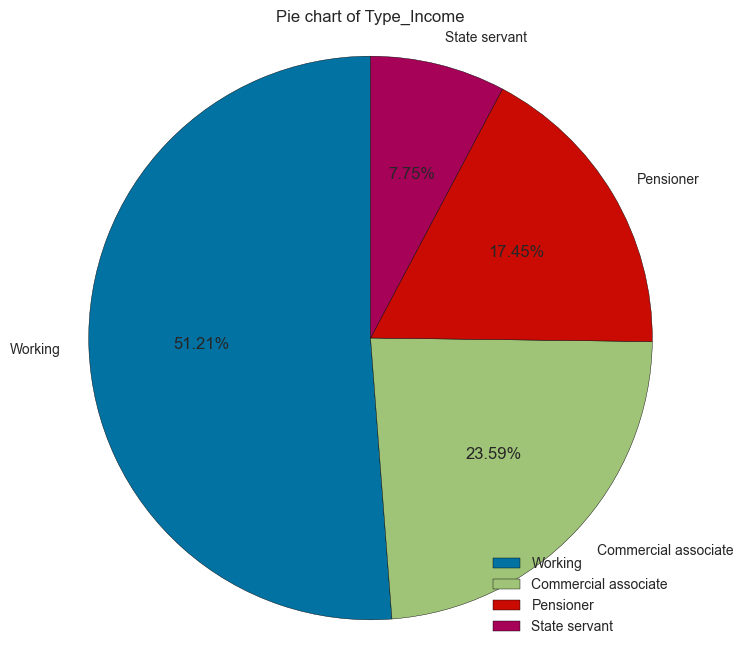

In [61]:
pie_chart_plot(cc_train_original,'Type_Income')

+ Most applicants are working(51.21%), second is Commercial associate(23.59%)

### EDUCATION

In [62]:
feature_info(cc_train_original,'EDUCATION')

Description:
count                              1238
unique                                5
top       Secondary / secondary special
freq                                820
Name: EDUCATION, dtype: object
****************************************
Data type:
object
****************************************
Value count:
                               Count  Frequency (%)
EDUCATION                                          
Secondary / secondary special    820          66.24
Higher education                 349          28.19
Incomplete higher                 54           4.36
Lower secondary                   14           1.13
Academic degree                    1           0.08


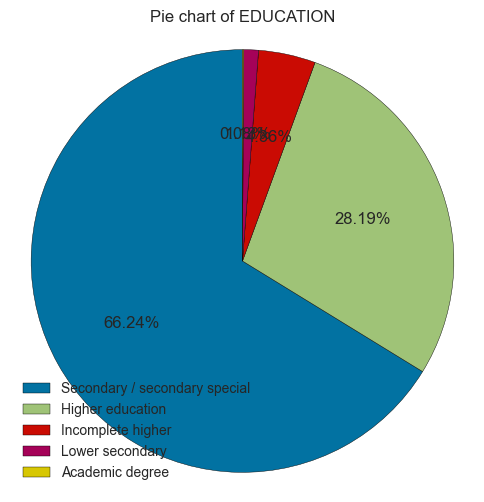

In [63]:
pie_chart_plot(cc_train_original,'EDUCATION')

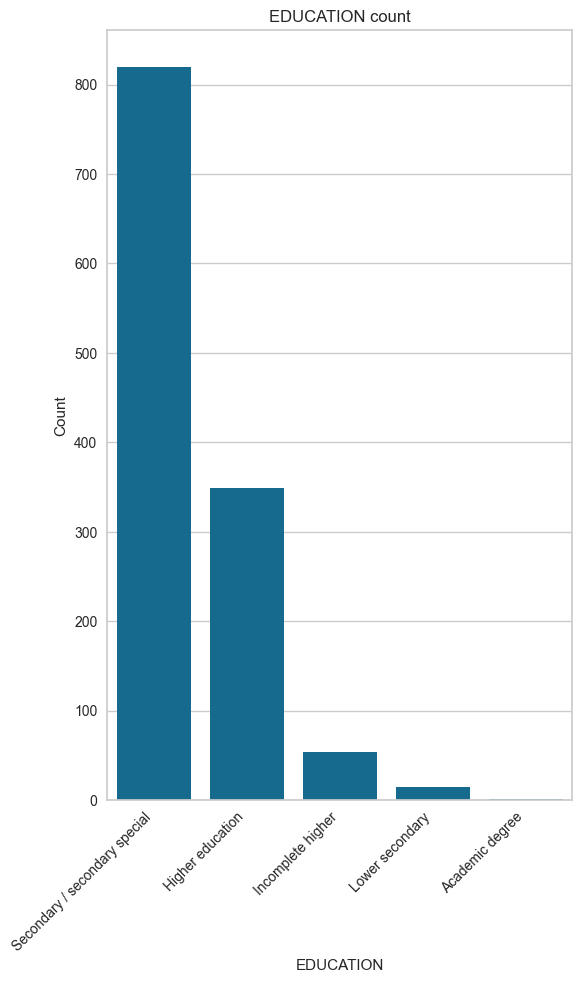

In [64]:
bar_plot(cc_train_original,'EDUCATION')

+ Most of applicants have completed their Secondary / secondary special degree(66.24%)

### Employed_days

In [65]:
feature_info(cc_train_original,'Employed_days')

Description:
count   1030.00
mean       7.32
std        6.54
min        0.20
25%        2.57
50%        5.30
75%        9.60
max       40.76
Name: Employed_days, dtype: float64
****************************************
Data type:int64


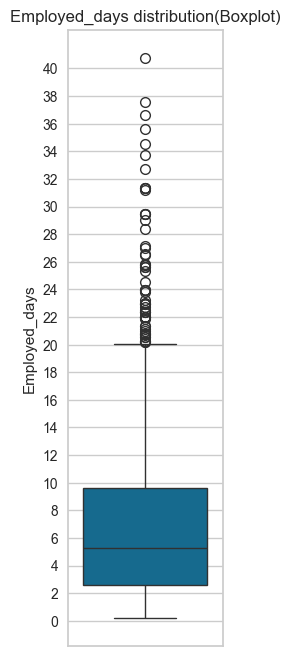

In [66]:
# below employed_days are in years
box_plot(cc_train_original,'Employed_days')

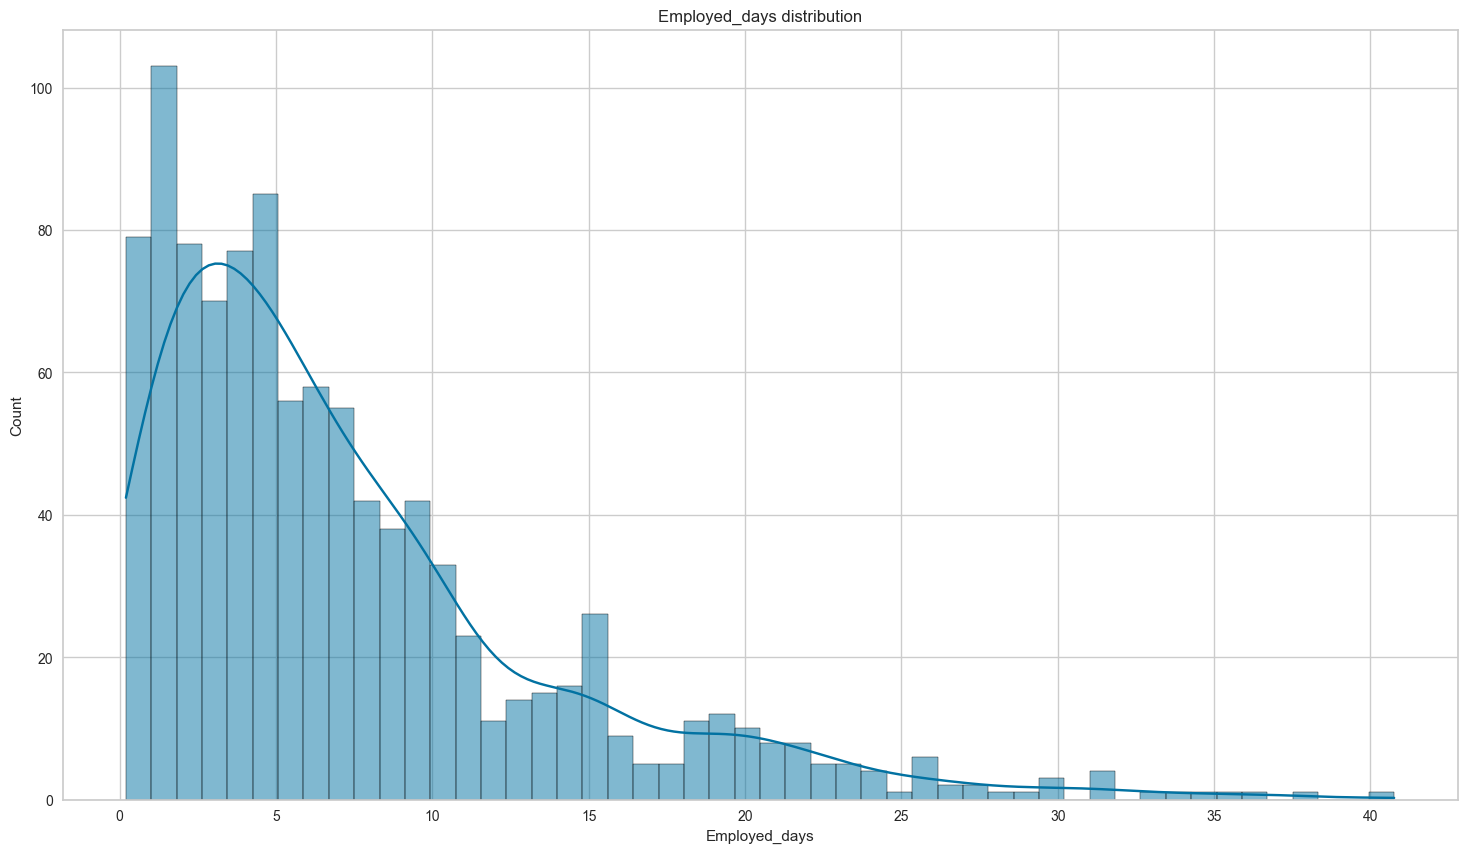

In [67]:
# below Employed_days are in year
hist_plot(cc_train_original,'Employed_days')

Is_high_risk
0   7.58
1   5.27
Name: Employed_days, dtype: float64


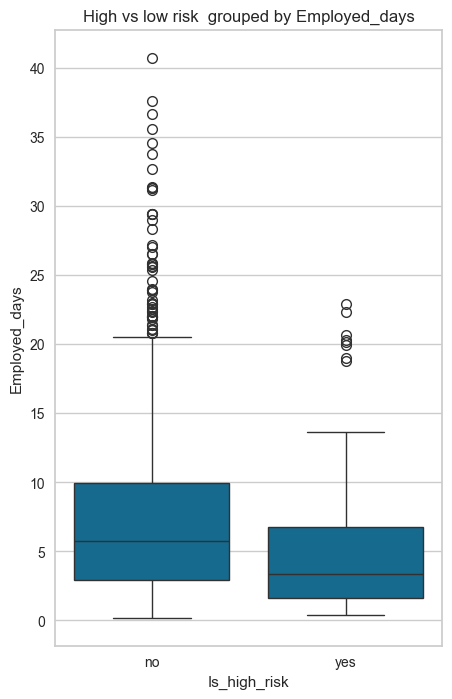

In [68]:
# bivaraiate analysis with target variable, here 0 means No and 1 means Yes
low_vs_high_risk_box_plot(cc_train_original,'Employed_days')

+ Here we can see that most of the applicants have been working between 5 to 7 years on average 
+ Also have many outlier who have been working for more than 20 years.
+ Also we can see employed days[in year] histogram is positively skewed.
+ Also we can see high risk have low employment days                                            

### Car_Owner

In [69]:
feature_info(cc_train_original,'Car_Owner')

Description:
count     1238
unique       2
top          N
freq       750
Name: Car_Owner, dtype: object
****************************************
Data type:
object
****************************************
Value count:
           Count  Frequency (%)
Car_Owner                      
N            750          60.58
Y            488          39.42


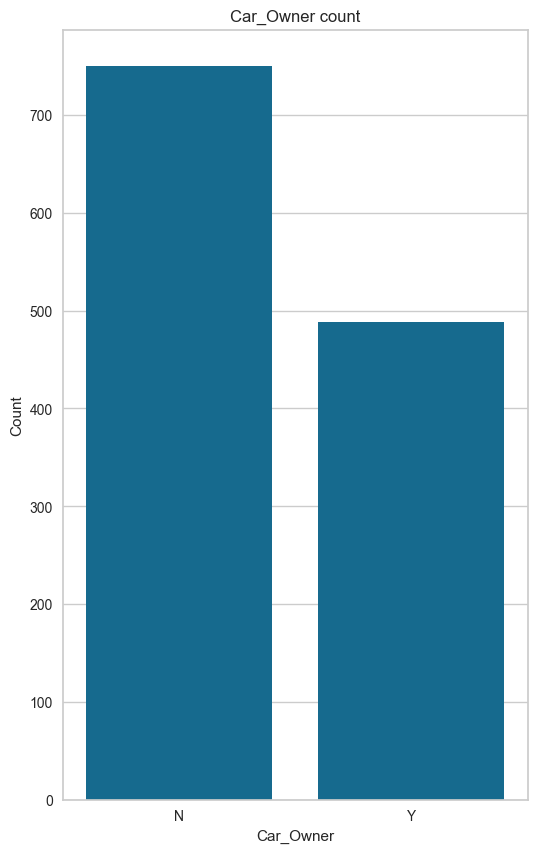

In [70]:
bar_plot(cc_train_original,'Car_Owner')

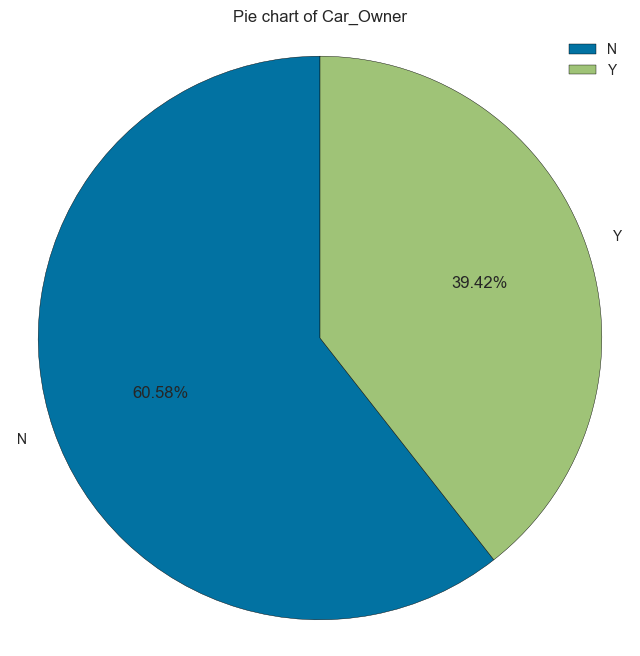

In [71]:
pie_chart_plot(cc_train_original,'Car_Owner')

+ we can see most of the applicants don't have a car

### Propert_Owner

In [72]:
feature_info(cc_train_original,'Propert_Owner')

Description:
count     1238
unique       2
top          Y
freq       805
Name: Propert_Owner, dtype: object
****************************************
Data type:
object
****************************************
Value count:
               Count  Frequency (%)
Propert_Owner                      
Y                805          65.02
N                433          34.98


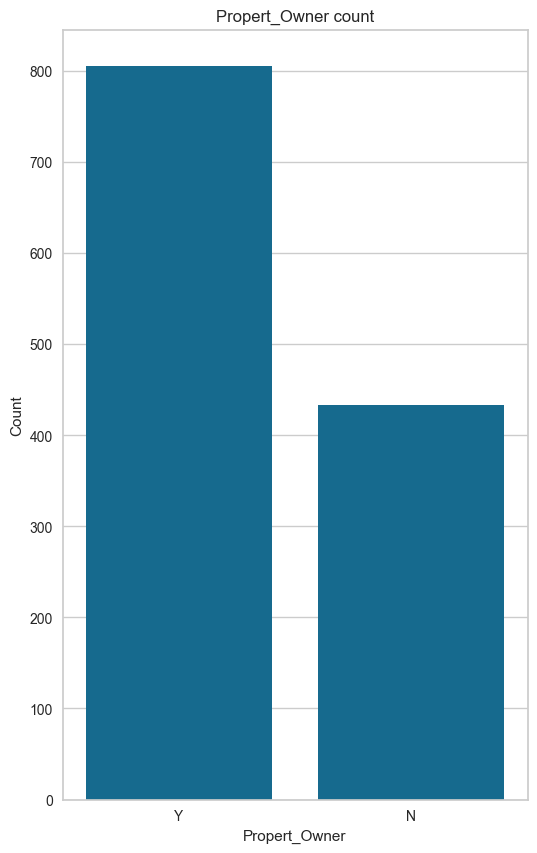

In [73]:
bar_plot(cc_train_original,'Propert_Owner')

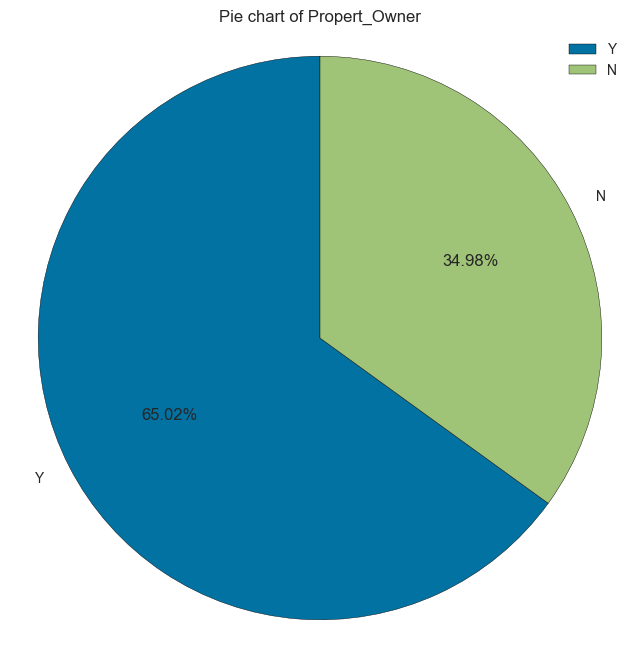

In [74]:
pie_chart_plot(cc_train_original,'Propert_Owner')

+ we can see most of the applicants own a property(65.02%)

### Work_Phone

In [75]:
feature_info(cc_train_original,'Work_Phone')

Description:
count   1238.00
mean       0.22
std        0.41
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Work_Phone, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
            Count  Frequency (%)
Work_Phone                      
0             970          78.35
1             268          21.65


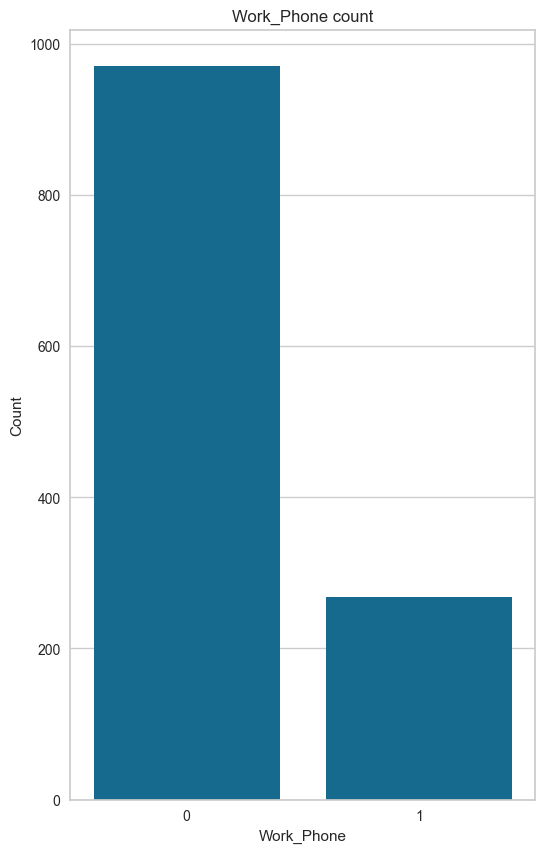

In [76]:
bar_plot(cc_train_original,'Work_Phone')

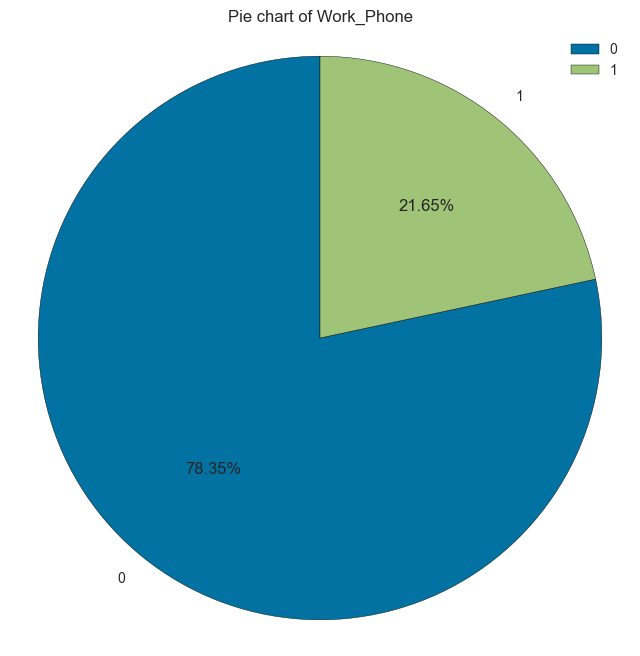

In [77]:
pie_chart_plot(cc_train_original,'Work_Phone')

+ Here we can see 78.35% applicants don't have work phone
+ Here 0 means No and 1 means Yes

### EMAIL_ID

In [78]:
feature_info(cc_train_original,'EMAIL_ID')

Description:
count   1238.00
mean       0.09
std        0.29
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: EMAIL_ID, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
          Count  Frequency (%)
EMAIL_ID                      
0          1123          90.71
1           115           9.29


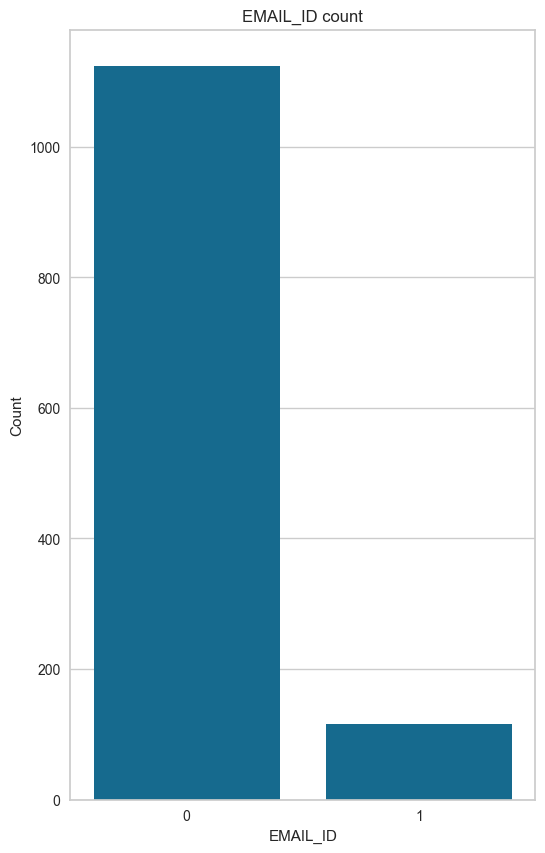

In [79]:
bar_plot(cc_train_original,'EMAIL_ID')

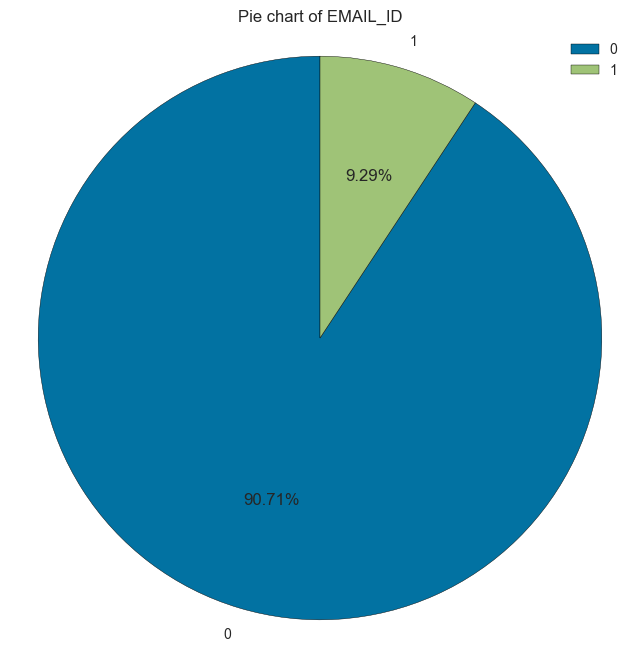

In [80]:
pie_chart_plot(cc_train_original,'EMAIL_ID')

+ Here we can see more than 90% of applicants don't have email id, only less than 10% applicants have email id.
+ Here 0 means No and 1 means yes

### Mobile_phone

In [81]:
feature_info(cc_train_original,'Mobile_phone')

Description:
count   1238.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Mobile_phone, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
              Count  Frequency (%)
Mobile_phone                      
1              1238         100.00


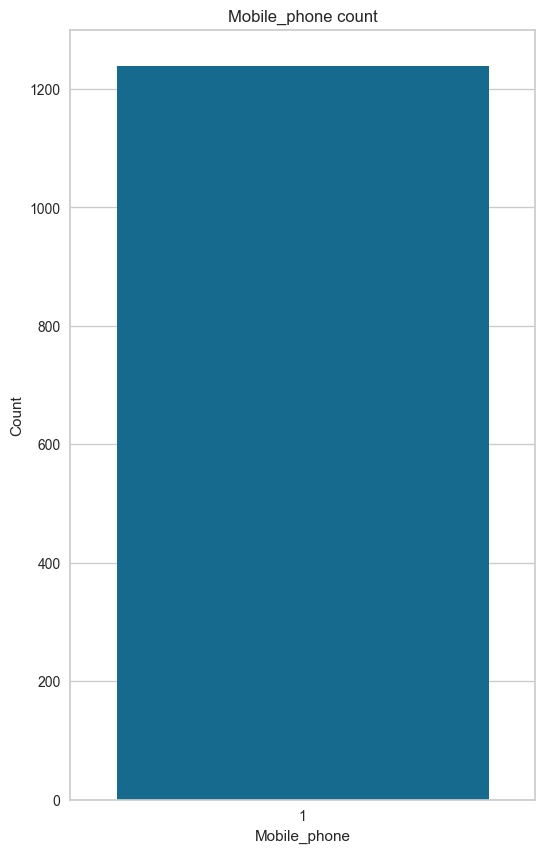

In [82]:
bar_plot(cc_train_original,'Mobile_phone')

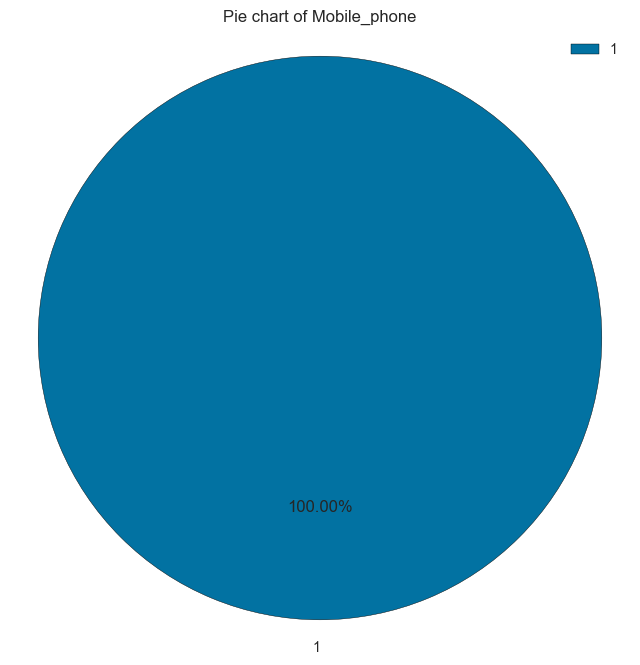

In [83]:
pie_chart_plot(cc_train_original,'Mobile_phone')

+ Here we can see all applicants have mobile phone

### Phone

In [84]:
feature_info(cc_train_original,'Phone')

Description:
count   1238.00
mean       0.31
std        0.46
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Phone, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
       Count  Frequency (%)
Phone                      
0        859          69.39
1        379          30.61


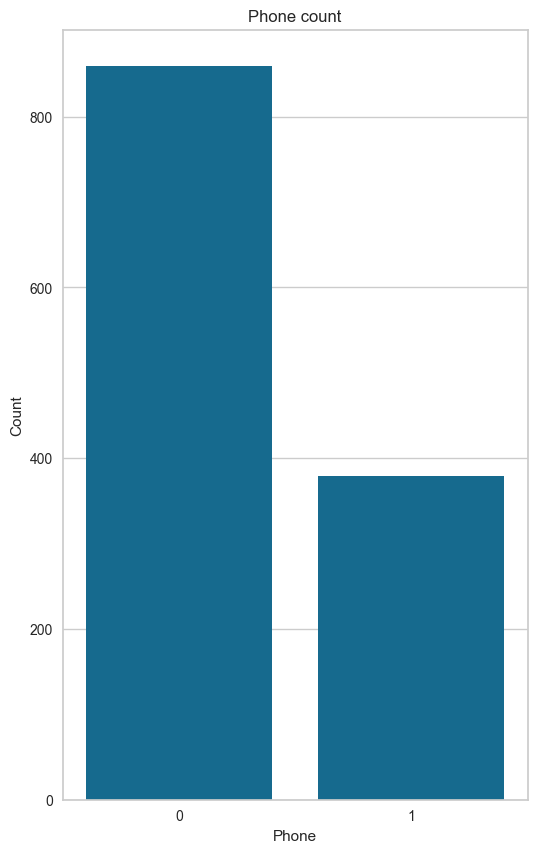

In [85]:
bar_plot(cc_train_original,'Phone')

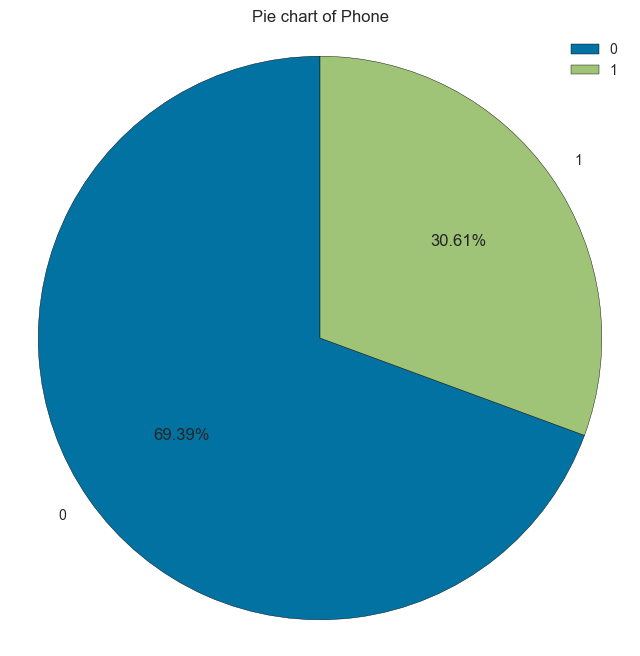

In [86]:
pie_chart_plot(cc_train_original,'Phone')

+ Here we can see 69.39% applicants don't have phone,and 30.61% applicants have phone.
+ Here 0 means No and 1 means Yes

### Is_high_risk(Target variable)

In [87]:
feature_info(cc_train_original,'Is_high_risk')

Description:
count   1238.00
mean       0.12
std        0.32
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Is_high_risk, dtype: float64
****************************************
Data type:
int64
****************************************
Value count:
              Count  Frequency (%)
Is_high_risk                      
0              1093          88.29
1               145          11.71


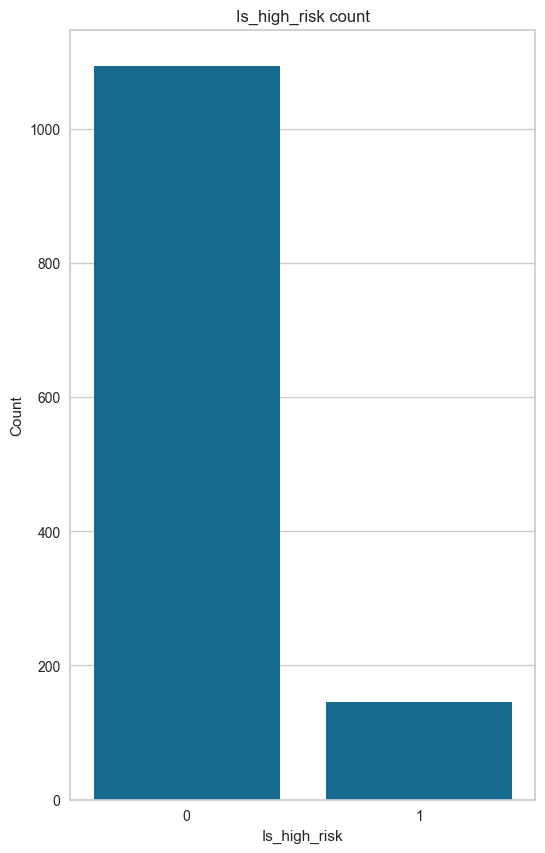

In [88]:
bar_plot(cc_train_original,'Is_high_risk')

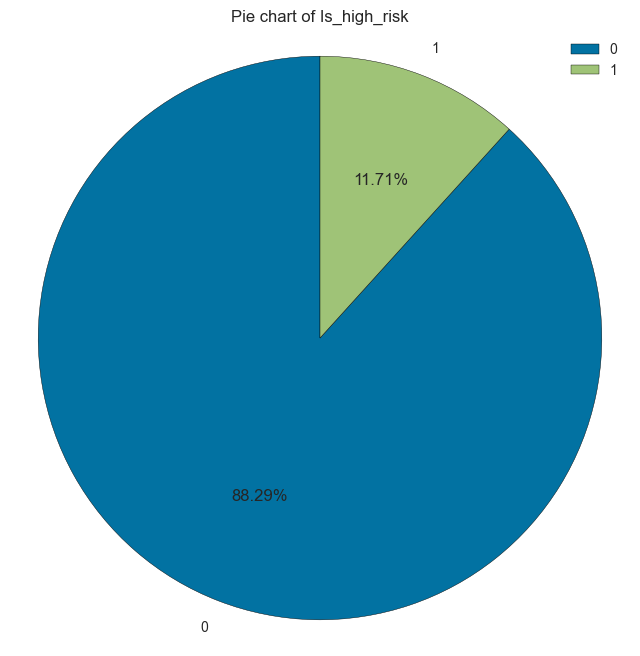

In [89]:
pie_chart_plot(cc_train_original,'Is_high_risk')

+ Here we can see that 88.29% No risk, it means good applicants ,credit card will be approved and 11.71% has risk, it means bad applicants , credit card will not be approved.
+ Here we can see have a imbalanced data that need to balanced using SMOTE before training our model
+ Here 0 means No and 1 means Yes

## 3.4.Bivariate analysis

### Numerical vs Numerical Features

#### scatter plot

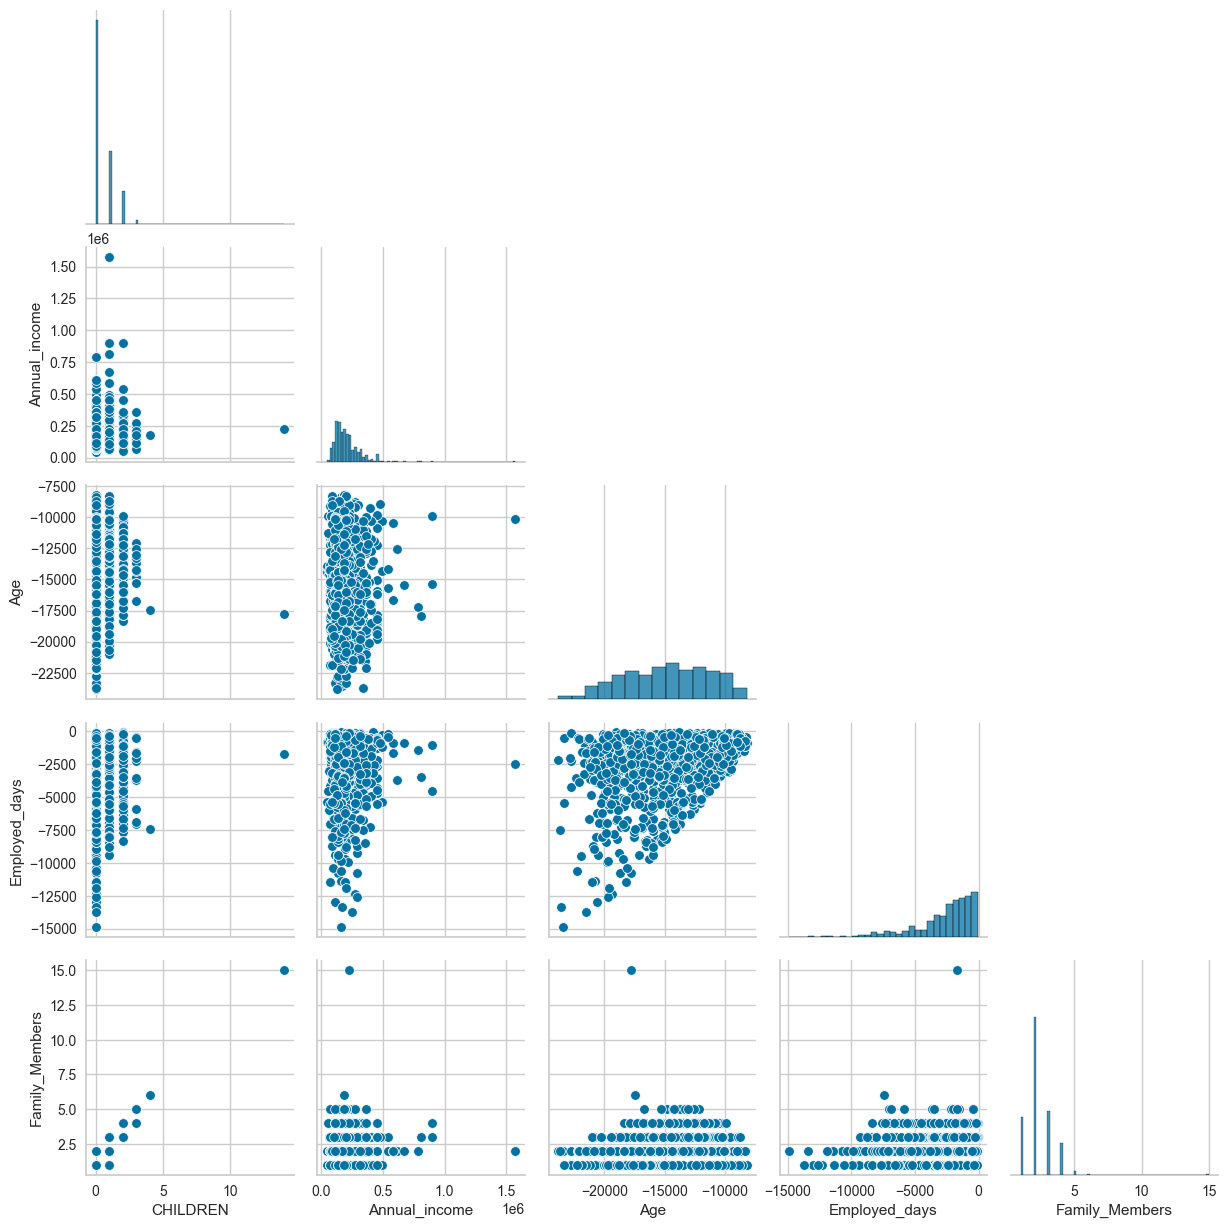

In [90]:
sns.pairplot(cc_train_original[cc_train_original['Employed_days'] < 0].drop(['Ind_ID','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Is_high_risk'], axis = 1),corner = True)

+ "Here, we observe a positive linear correlation between the number of Family Members and the count of Children. This implies that as someone has more children, the Family Member count also increases. However, this correlation introduces multicollinearity, a problem arising from two highly correlated features, which is not suitable for training our model. Therefore, we need to drop these features.
+ Additionally, we notice a similar pattern between Employed Days and Age. The longer the period of employment, the older someone tends to be.

### Family Member vs CHILDREN(Numerical vs numerical)

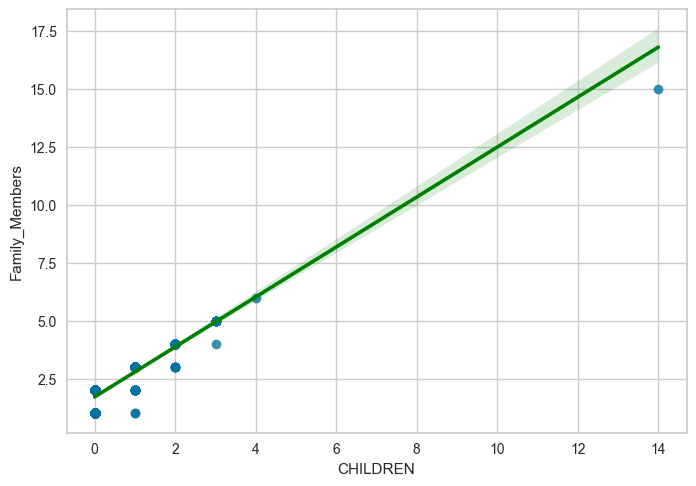

In [91]:
sns.regplot(x = 'CHILDREN',y = 'Family_Members', data = cc_train_original, line_kws = {'color':'green'})
plt.show()

+ Here, we observe that the more children a person has, the larger the family size

### Employed days vs Age(numerical vs numerical)

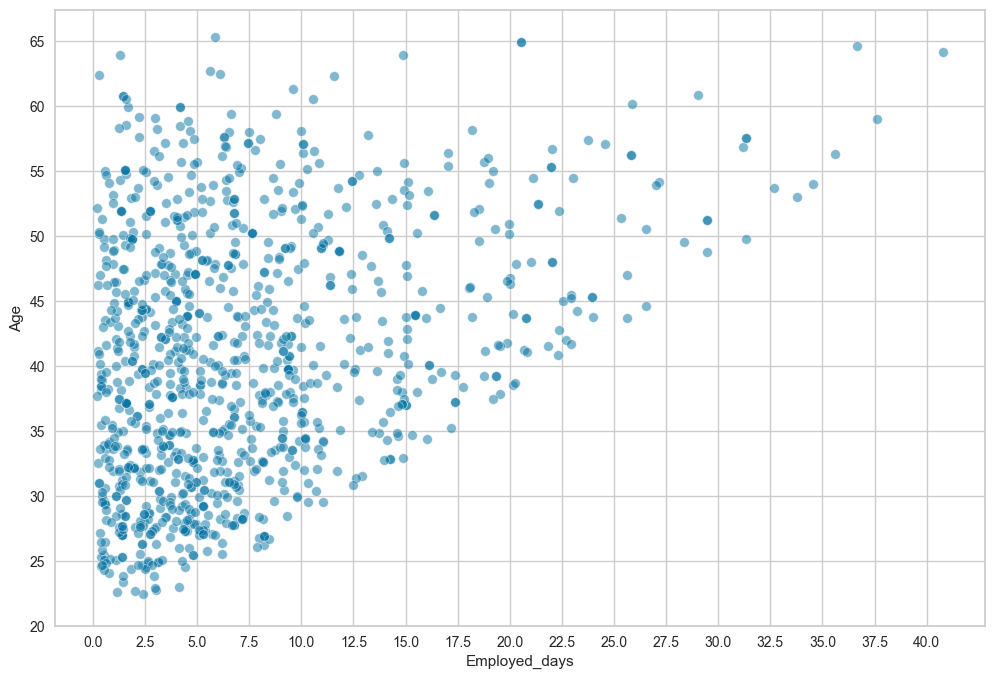

In [92]:
# Calculate the absolute values of age and employed days
y_age = np.abs(cc_train_original['Age']) / 365.25
x_employed_days = np.abs(cc_train_original[cc_train_original['Employed_days'] < 0]['Employed_days']) / 365.25

# Create a scatter plot using sns.scatterplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=cc_train_original, x=x_employed_days, y=y_age,alpha=0.50)

# Set custom tick values for better readability
plt.xticks(np.arange(0, x_employed_days.max(), 2.5))
plt.yticks(np.arange(20, y_age.max(), 5))

# Show the plot
plt.show()

+ Here we observe a correlation between the age of applicants and their employed days in this scatter plot.

### Heatmap

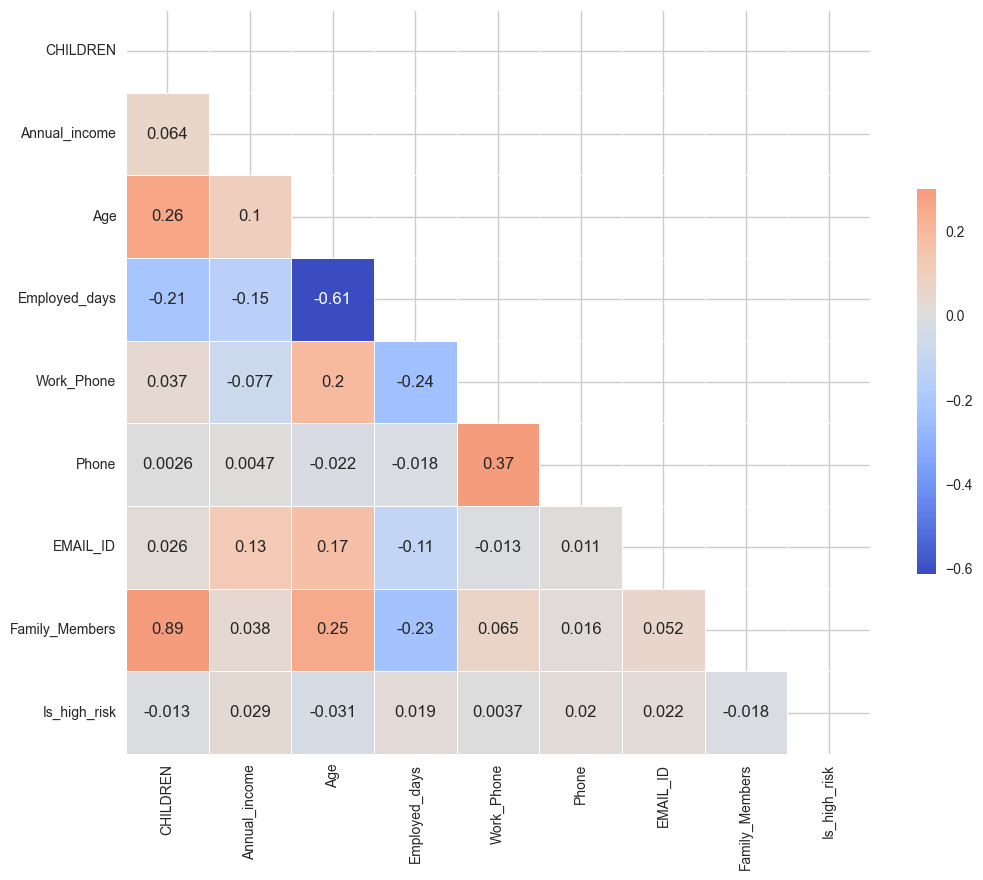

In [93]:
cc_train_modified = cc_train_original.copy()
# drop Mobile_phone and Ind_ID features
cc_train_modified.drop(['Mobile_phone', 'Ind_ID'], axis=1, inplace=True)

# Select numeric columns
numeric_df = cc_train_modified.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()



+ Here we observe a high correlation between Family Members and Children. Additionally:
+ Age shows some positive correlation with Family Members and Children, indicating larger family sizes for older individuals.
+ We can see there is no features that is correlated with the target variable.
+ There is a positive correlation between having a Phone and a Work_phone.
+ A negative correlation is evident between Employed_days and Age.
+ Furthermore, a positive correlation exists between Age and Work_phone

### Numerical vs Categorical Features(ANOVA[Analysis of Variance])

#### Age vs categorical features

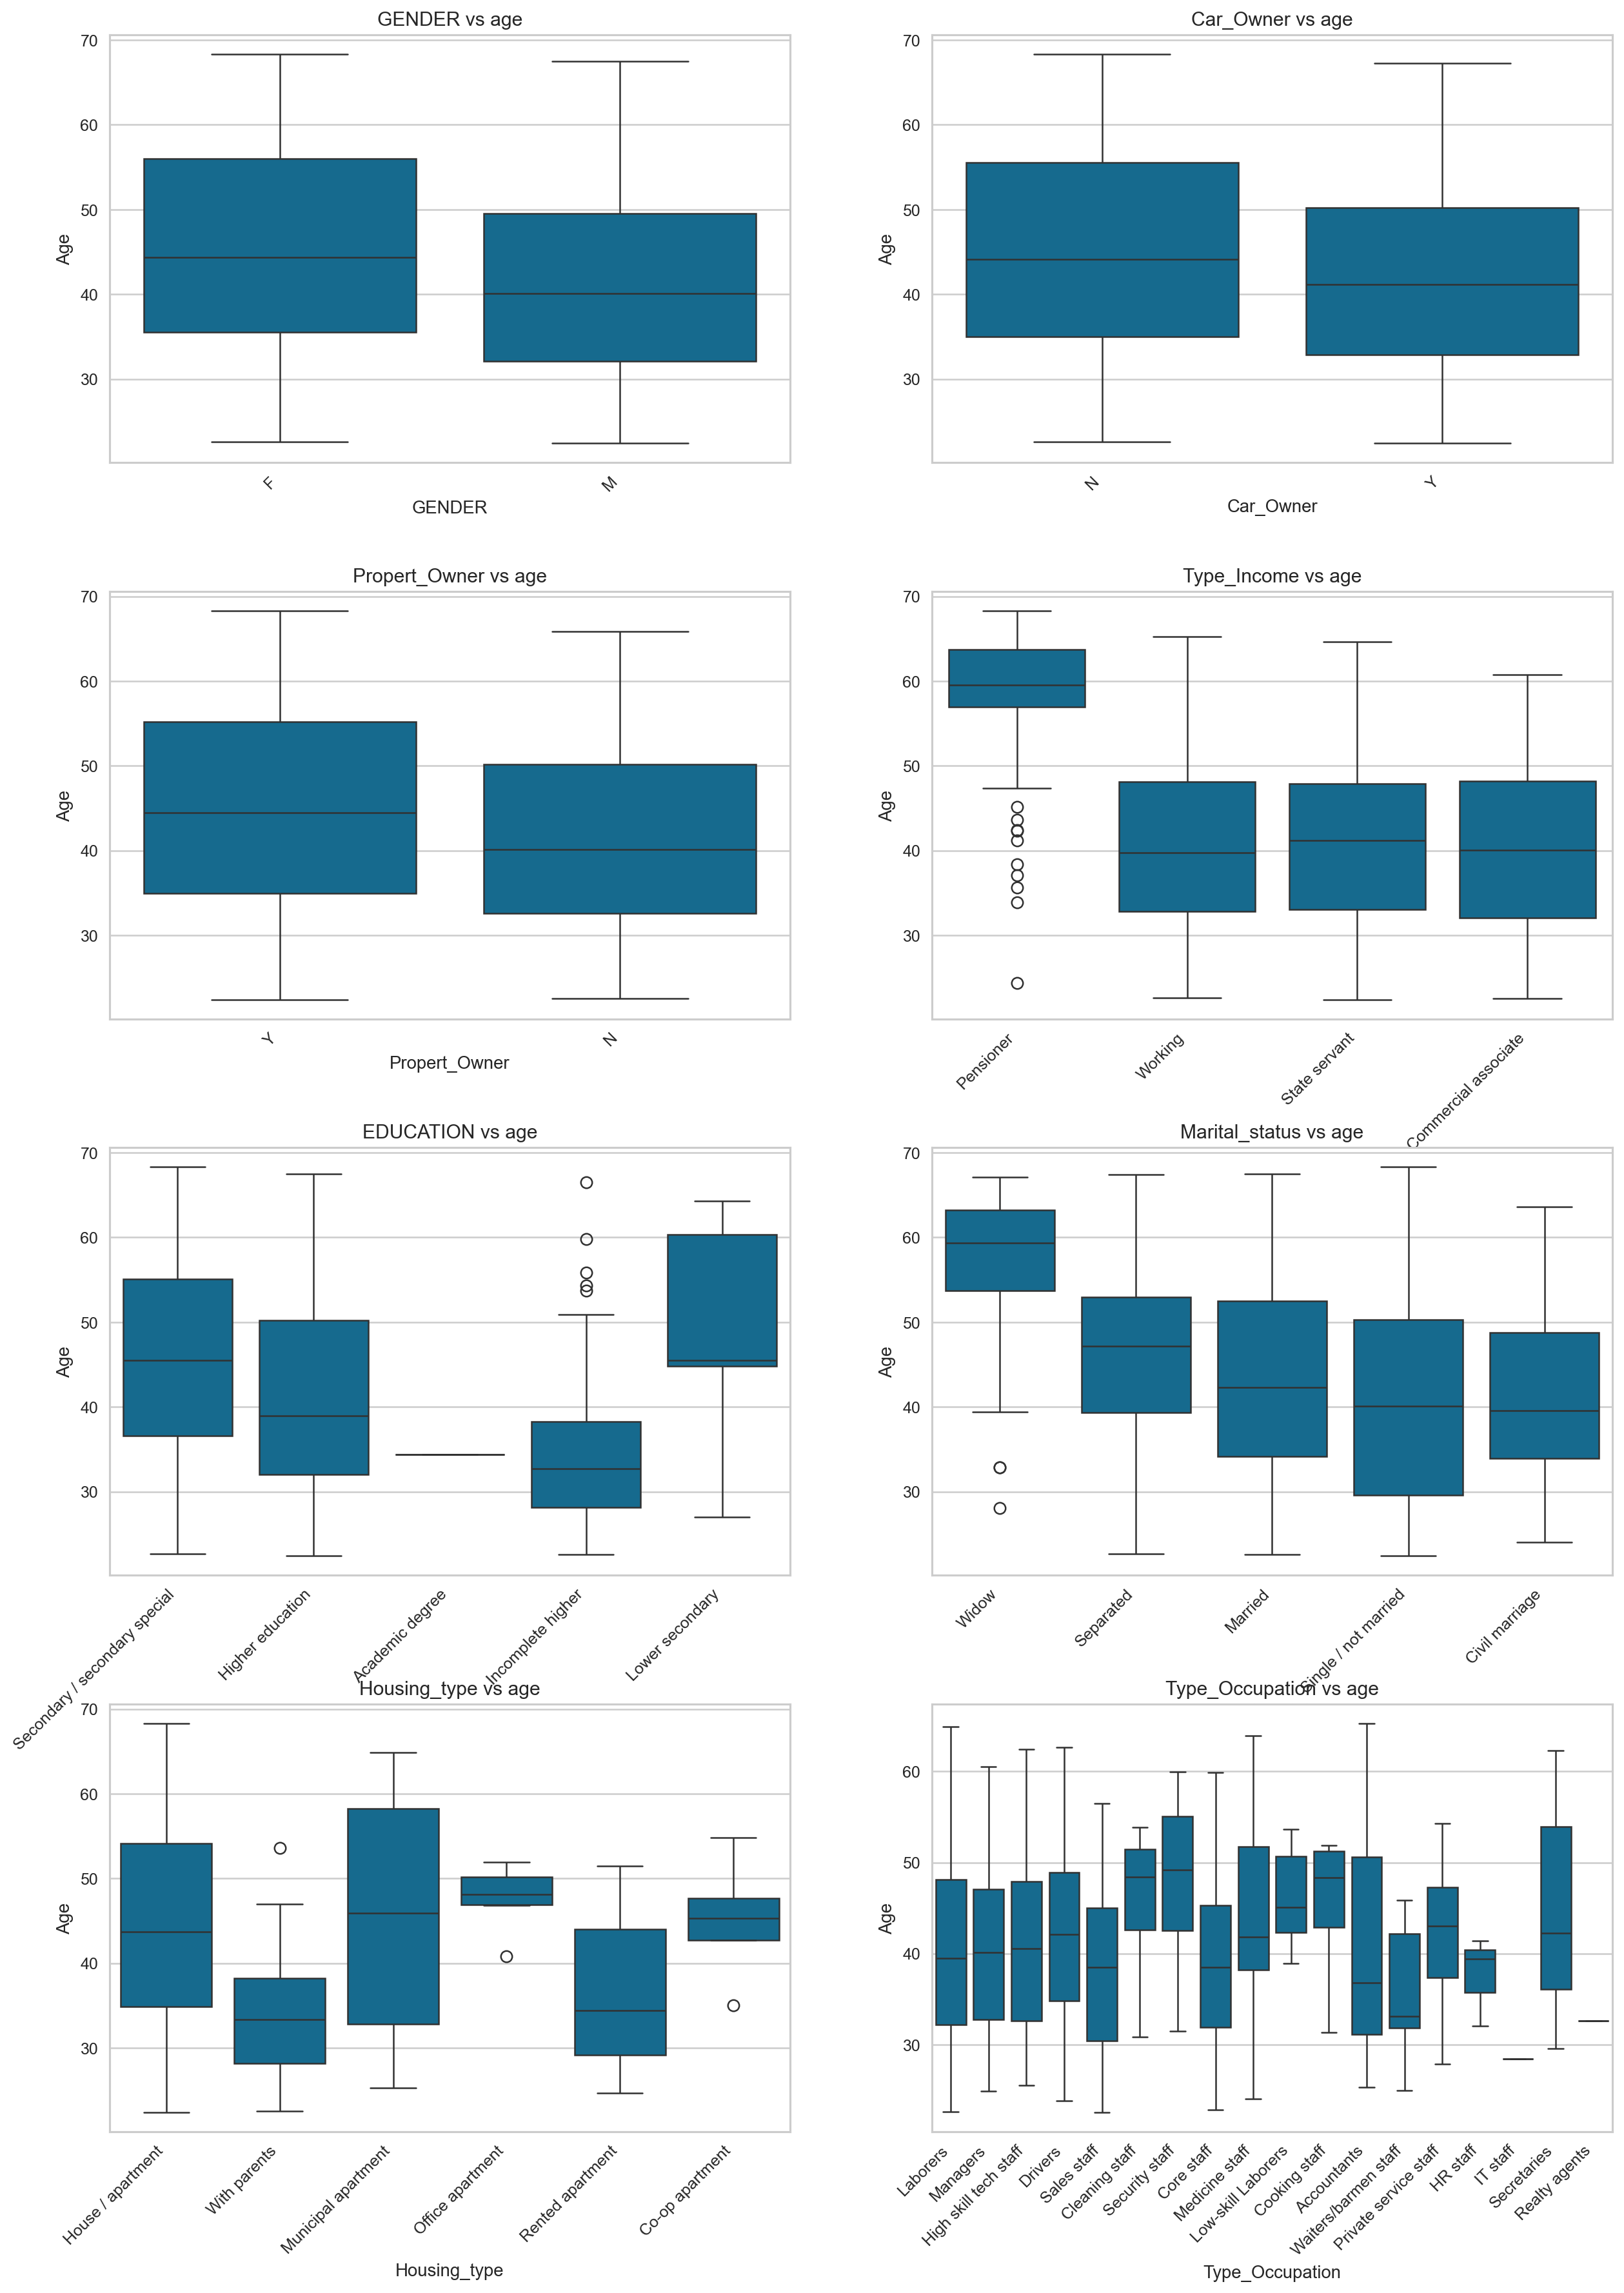

In [94]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']
for cat_feature_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=cc_train_original[cat_features[cat_feature_count]],y=np.abs(cc_train_original['Age'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_feature_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_feature_count += 1
    break        

+ Female applicants are older than male applicants.
+ Individuals without a car tend to be older.
+ Property owners are generally older than those without property.
+ Pensioners are older than those who are currently working (with some outliers where individuals pensioned at a young age).
+ Widows tend to be much older, with some outliers in their 30s.
+ Individuals living with parents are younger, with some outliers.
+ Security staff members tend to be older, while those in information technology (IT) tend to be younger.

### Categorical vs Categorical Features(Chi-Square test)

+ Null Hypothesis: The categories of the features have no effect on the target variable.
+ 
Alternative Hypothesis: One or more feature categories have a significant effect on the target variable.

In [95]:
import scipy.stats as stats
def chi_square_test(feature):
    # Select rows with high risk
    high_risk_ft = cc_train_original[cc_train_original['Is_high_risk'] == 1][feature]
    high_risk_ft_ct = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    
    # Drop the index feature name
    high_risk_ft_ct.index.name = None
    
    # Observe values
    obs = high_risk_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    
    # Expected values
    exp = pd.DataFrame([obs['Count'].sum() / len(obs)] * len(obs.index), columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    
    # Chi-square test
    chi_squared_stat = (((obs - exp) ** 2) / exp).sum().values[0]
    print('Chi-square:\n')
    print(chi_squared_stat)
    print('\n')
    
    # Critical value
    crit = stats.chi2.ppf(q=0.95, df=len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    
    # P-value
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    
    if chi_squared_stat >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat <= crit:
        print('Fail to reject the null hypothesis')
        

In [96]:
cat_features = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']
for feat in cat_features:
    print('\n\n**** {} ****\n'.format(feat))
    chi_square_test(feat)



**** GENDER ****

Observed values:

   Count
F     77
M     63


Expected values:

   Count
F  70.00
M  70.00


Chi-square:

1.4


Critical value:

3.841458820694124


P-value:

0.2367235706378572


Fail to reject the null hypothesis


**** Car_Owner ****

Observed values:

   Count
N     85
Y     60


Expected values:

   Count
N  72.50
Y  72.50


Chi-square:

4.310344827586207


Critical value:

3.841458820694124


P-value:

0.0378812823153869


Reject the null hypothesis


**** Propert_Owner ****

Observed values:

   Count
N     52
Y     93


Expected values:

   Count
N  72.50
Y  72.50


Chi-square:

11.593103448275862


Critical value:

3.841458820694124


P-value:

0.0006619684903875767


Reject the null hypothesis


**** Type_Income ****

Observed values:

                      Count
Commercial associate     42
Pensioner                34
State servant             6
Working                  63


Expected values:

                      Count
Commercial associate  36.25
Pension

## Summary of EDA

#### Gender Distribution
- Two unique classes, Female (F) and Male (M), with 778 and 454 applicants, respectively.
- 63.14% are female, and 36.85% are male.

#### Marital Status
- Five unique classes, with most applicants (68.50%) being married.
- Widows have a higher risk compared to separated individuals.

#### Family Members
- Numerical feature with a median of 2 family members.
- Most applicants have 2 family members (51.85%).

#### Children
- Most applicants don't have children.
- Three outliers with 5, 6, and 15 children.

#### Housing Type
- 89.42% of applicants live in a house/apartment.

#### Annual Income
- Average income is 194,770.84, with outliers.
- Most people make 172,125, ignoring outliers.
- Positively skewed distribution.

#### Type Occupation
- Laborers (25.06%) and Core staff (16.83%) are the most common occupations.
- 32.31% missing data.

#### Type Income
- Most applicants are working (51.21%), followed by commercial associates (23.59%).

#### Education
- Most applicants completed Secondary/Secondary Special (66.24%).

#### Employed Days
- Most applicants have been working between 5 to 7 years on average.
- Outliers with employment durations over 20 years.

#### Car Ownership and Property Ownership
- Most applicants don't have a car (70.36%).
- Most applicants own property (65.02%).

#### Phone and Work Phone
- 78.35% of applicants don't have a work phone.
- More than 90% don't have an email ID.
- All applicants have a mobile phone.
- 69.39% don't have a phone, and 30.61% have a phone.

#### Is High Risk (Target Variable)
- 88.29% have no risk, and 11.71% have risk, indicating imbalanced data.
- Imbalance needs to be addressed using SMOTE before model training.

#### Age and Is High Risk
- There is no significant difference in age between high-risk and low-risk applicants.
- The mean age for both groups is around 43 years, and there is no correlation between age and risk factors.

#### Correlations
- Positive linear correlation between Family Members and Children, introducing multicollinearity.
- Similar pattern observed between Employed Days and Age, indicating longer employment correlates with older age.
- No features are strongly correlated with the target variable.
- Positive correlation between having a Phone and a Work_phone.
- Negative correlation between Employed_days and Age.
- Positive correlation between Age and Work_phone.

#### Demographic Observations
- Female applicants are older than male applicants.
- Non-car owners tend to be older.
- Property owners are generally older.
- Pensioners are older than working individuals, with some outliers.
- Widows are generally older.
- Individuals living with parents are younger, with some outliers.
- Security staff tends to be older, while IT staff tends to be younger.


# 4.Preparing the Data

## 4.1.Here is a list of all the transformations that need to be applied to each feature

#### Ind_ID 
- Drop the feature

#### GENDER 
- One-hot Encoding
- impute missing value

#### Car_Owner  
- Change it numerical
- One-hot encoding

#### Propert_Owner 
- Change it numerical
- One-hot encoding

#### CHILDREN 
- Fix outlier
- Drop Feature

#### Annual_income
- Remove outlier
- Fix Skewness
- Min-Max Scaling
- impute missing value

#### Type_Income
- One-hot encoding

#### EDUCATION  
- Ordinal encoding

#### Marital_status
- One-hot encoding

#### Housing_type
- One-hot encoding

#### Age 
- Min-Max Scaling
- Fix Skewness
- Abs value and divide 365.25
- impute missing value

#### Employed_days 
- Min-Max Scaling
- Remove outlier
- Abs value and divide 365.25

#### Mobile_phone
- Drop feature

#### Work_Phone
- One-hot encoding

#### Phone 
- One-hot encoding

#### EMAIL_ID  
- One-hot encoding

#### Type_Occupation 
- One-hot encoding
- impute missing value

#### Family_Members
- Fix outlier

#### Is_high_risk
- Balance the Imbalance Data with SMOTE

## 4.2.Data Cleaning

### 4.3.1.Impute Missing Value

In [97]:
class Handle_Missing_Values(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols=['GENDER', 'Type_Occupation'], numerical_cols=['Annual_income', 'Age']):
        self.categorical_cols = categorical_cols
        self.numerical_cols = numerical_cols
    
    def fit(self, df):
        # Store the mode for categorical columns and the mean for numerical columns
        self.imputation_values = {}
        for col in self.categorical_cols:
            self.imputation_values[col] = df[col].mode()[0]
        for col in self.numerical_cols:
            self.imputation_values[col] = df[col].mean()
        return self
    
    def transform(self, df):
        # Replace missing values with the stored imputation values
        for col in self.categorical_cols:
            df[col].fillna(self.imputation_values[col], inplace=True)
        for col in self.numerical_cols:
            df[col].fillna(self.imputation_values[col], inplace=True)
        return df

In [98]:
#cc_train_original.isnull().sum()

### 4.3.2.Outlier Remover Function
+ Here we are creating a class to handle outliers.
+ This class will remove outliers more or less than 3 inter-quantile ranges away from the mean

In [99]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Family_Members','Annual_income', 'Employed_days']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("Warning: One or more specified features for outlier removal are not present in the dataframe. No outliers removed.")
            return df

## 4.3.Feature Selection

---
### 4.3.1 Drop Features

- We dropped `Ind_ID` because it is not useful for prediction. It was helpful during the merging of the two datasets, but afterward, it became unnecessary.
- We dropped `Mobile_phone` because everyone has a mobile phone, and thus, this feature did not provide any useful information.
- We dropped `CHILDREN` because it is highly correlated with `Family_Members`. To avoid multicollinearity, it was necessary to remove this feature.
- We dropped `Type_Occupation` due to the presence of many missing values.
---

In [100]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Ind_ID','Mobile_phone','CHILDREN','Type_Occupation']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("Warning: One or more specified features for dropping are not present in the dataframe. No features dropped.")
            return df

## 4.4.Feature Engineering

### 4.4.1 Convert Time

+ This class converts features that use days (Employed days, Age) to their absolute values because negative days of employment are not valid.

In [101]:
class Handle_time_conversion(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_days=['Employed_days', 'Age']):
        self.feat_with_days = feat_with_days

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if set(self.feat_with_days).issubset(X.columns):
            # We convert days to absolute value
            X[['Employed_days', 'Age']] = np.abs(X[['Employed_days', 'Age']])
            return X
        else:
            print("Error: The specified features for time conversion are not present in the dataframe.")
            return X


### 4.4.2. Handle Retiree

+ The following class will convert the employed days of retirees to 0 so that it is not considered an outlier.

In [102]:
class Handle_Retiree(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        # Check if 'Employed_days' is in the dataframe columns
        if 'Employed_days' in df.columns:
            # Select rows with 'Employed_days' equal to 365243, corresponding to retirees
            df_ret_idx = df['Employed_days'][df['Employed_days'] == 365243].index
            # Change 'Employed_days' value from 365243 to 0 for retirees
            df.loc[df_ret_idx, 'Employed_days'] = 0
            return df
        else:
            # Print an error message if 'Employed_days' is not in the dataframe
            print("Error: 'Employed_days' is not in the dataframe.")
            return df

### 4.4.3.Handle Skewness

+ We employ cubic root transformation; this class aims to reduce the skewness in the distribution of Annual income and age. Skewed features can adversely impact the performance of our predictive model, and machine learning models generally benefit from normally distributed data.

In [103]:
class Handle_Skewness(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_skewness=['Annual_income', 'Age']):
        self.feat_with_skewness = feat_with_skewness
    
    def fit(self, df):
        # This transformer doesn't require fitting, so it returns self.
        return self
    
    def transform(self, df):
        # Check if features with skewness are present in the dataframe columns
        if set(self.feat_with_skewness).issubset(df.columns):
            # Apply cubic root transformation to handle skewness
            df[self.feat_with_skewness] = np.cbrt(df[self.feat_with_skewness])
            return df
        else:
            # Print an error message if features are not in the dataframe
            print("Error: One or more features are not in the dataframe.")
            return df

### 4.4.4.Binary Number to Y and N
+ This class will map the value 1 to the character “Y” and 0 to “N” for features such as Has a Work Phone, Has a Phone, and Has an Email. This mapping will enhance comprehensibility, especially when we perform one-hot encoding for these features

In [104]:
class BinningNum_To_YN(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_num_enc=['Work_Phone', 'Phone', 'EMAIL_ID']):
        self.feat_with_num_enc = feat_with_num_enc

    def fit(self, df):
        # No fitting is needed, return self
        return self

    def transform(self, df):
        # Check if all features in feat_with_num_enc are present in the dataframe
        if set(self.feat_with_num_enc).issubset(df.columns):
            # Change 0 to 'N' and 1 to 'Y' for all features in feat_with_num_enc
            for ft in self.feat_with_num_enc:
                df[ft] = df[ft].map({1: 'Y', 0: 'N'})
            return df
        else:
            # Print a message if one or more features are not in the dataframe
            print("One or more features are not in the dataframe")
            return df


### 4.4.5.One Hot Encoding
+ This class performs one-hot encoding on the specified categorical features and retains the feature names. Feature names are preserved instead of using the default array without names because they will be used for feature importance analysis

In [105]:
class OneHot_Encoding_with_Features(BaseEstimator, TransformerMixin):
    def __init__(self, one_hot_enc_ft=['GENDER', 'Car_Owner', 'Propert_Owner', 'Marital_status', 'Housing_type', 'Type_Income', 'Work_Phone', 'Phone', 'EMAIL_ID']):
        self.one_hot_enc_ft = one_hot_enc_ft
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if set(self.one_hot_enc_ft).issubset(df.columns):
            # Function to one-hot encode the features in one_hot_enc_ft
            def one_hot_enc(df, one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # Get the result of the one-hot encoding column names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # Change the array of the one-hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(), columns=feat_names_one_hot_enc, index=df.index)
                return df
            
            # Function to concatenate the one-hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df, one_hot_enc_df, one_hot_enc_ft):
                # Get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # Concatenate the rest of the features with the one-hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]], axis=1)
                return df_concat
            
            # One-hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df, self.one_hot_enc_ft)
            # Returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df, one_hot_enc_df, self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("Warning: One or more specified features are not present in the dataframe. Returning the original dataframe.")
            return df


### 4.4.6.Ordinal Encoding
+ This class will convert the education level to an ordinal encoding. Here we use ordinal encoding instead of one-hot encoding because we know that the education level is ranked

In [106]:
class Ordinal_Encoding_with_Feature(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_enc_ft=['EDUCATION']):
        self.ordinal_enc_ft = ordinal_enc_ft
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if 'EDUCATION' in df.columns:
            # Instantiate the OrdinalEncoder object
            ordinal_enc = OrdinalEncoder()
            df[self.ordinal_enc_ft] = ordinal_enc.fit_transform(df[self.ordinal_enc_ft])
            return df
        else:
            print("Warning: 'EDUCATION' feature is not present in the dataframe. Returning the original dataframe.")
            return df


### 4.4.7.Min-Max Scaling
+ This class performs Min-Max scaling on specified numerical features while preserving the feature names. Scaling is essential because some numerical features have a wide range, and without scaling, machine learning algorithms might give more weight to features with larger values. Scaling ensures that all numerical features are on a similar scale (0 to 1), addressing this issue.

In [107]:
class MinMax_Scaling_With_Feature(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_scale=['Age', 'Annual_income', 'Employed_days']):
        self.features_to_scale = features_to_scale
    
    def fit(self, df, y=None):
        return self
    
    def transform(self, df):
        if set(self.features_to_scale).issubset(df.columns):
            min_max_scaler = MinMaxScaler()
            df[self.features_to_scale] = min_max_scaler.fit_transform(df[self.features_to_scale])
            return df
        else:
            print("Warning: One or more features not found in the dataframe. Returning the original dataframe.")
            return df

### 4.4.8. Balanced the Imbalanced[Oversampling]
+ Here we can see that 88.29% No risk, it means good applicants ,credit card will be approved and 11.71% has risk, it means bad applicants , credit card will not be approved.
+  have a imbalanced data that need to balanced using SMOT samplingE before training our model+ 
Here 0 means No and 1 means Yes

In [110]:
class Target_Oversampling(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Is_high_risk' in df.columns:
            # SMOTE function to oversample the minority class and balance the dataset
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Is_high_risk'], df['Is_high_risk'])
            df_bal = pd.concat([pd.DataFrame(X_bal), pd.DataFrame(y_bal)], axis=1)
            return df_bal
        else:
            print("Warning: 'Is_high_risk' not found in the dataframe. Returning the original dataframe.")
            return df

## 4.5 Data Preprocessing Pipeline
- Creating the data preprocessing pipeline using the built-in sklearn function Pipeline.
- The pipeline calls each class sequentially, starting from the outlier remover to the Target oversampling class.
- The dataset will be transformed consecutively from the first class to the next one until the end.
- The pipeline will be stored in a variable called 'pipeline.'
- We will then call 'fit_transform' on that variable, passing our dataframe that we want to transform, and return the result.

In [111]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('handle_missing_values',Handle_Missing_Values()),
        ('outlier_remover',OutlierRemover()),
        ('drop_feature', DropFeatures()),
        ('handle_time_conversion',Handle_time_conversion()),
        ('handle_retiree', Handle_Retiree()),
        ('handle_skewness', Handle_Skewness()),
        ('binnin_gnum_to_yn', BinningNum_To_YN()),
        ('one_hot_encoding_with_features', OneHot_Encoding_with_Features()),
        ('ordinal_encoding_with_feature', Ordinal_Encoding_with_Feature()),
        ('minmax_scaling_with_feature', MinMax_Scaling_With_Feature()),
        ('target_oversampling', Target_Oversampling())         
    ])
    df_pipeline_pre = pipeline.fit_transform(df)
    return df_pipeline_pre

In [112]:
# Pass our training dataset
pd.options.mode.chained_assignment = None 
cc_train_prep_data = full_pipeline(cc_train_original)

In [113]:
cc_train_prep_data.shape

(1780, 33)

In [114]:
cc_train_prep_data.isnull().sum()

GENDER_F                               0
GENDER_M                               0
Car_Owner_N                            0
Car_Owner_Y                            0
Propert_Owner_N                        0
Propert_Owner_Y                        0
Marital_status_Civil marriage          0
Marital_status_Married                 0
Marital_status_Separated               0
Marital_status_Single / not married    0
Marital_status_Widow                   0
Housing_type_Co-op apartment           0
Housing_type_House / apartment         0
Housing_type_Municipal apartment       0
Housing_type_Office apartment          0
Housing_type_Rented apartment          0
Housing_type_With parents              0
Type_Income_Commercial associate       0
Type_Income_Pensioner                  0
Type_Income_State servant              0
Type_Income_Working                    0
Work_Phone_N                           0
Work_Phone_Y                           0
Phone_N                                0
Phone_Y         

In [115]:
pd.set_option('display.max_columns', None)
cc_train_prep_data.head()

GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  Propert_Owner_N  \
0      0.00      1.00         0.00         1.00             1.00   
1      1.00      0.00         0.00         1.00             0.00   
2      1.00      0.00         1.00         0.00             1.00   
3      1.00      0.00         1.00         0.00             0.00   
4      1.00      0.00         1.00         0.00             0.00   

   Propert_Owner_Y  Marital_status_Civil marriage  Marital_status_Married  \
0             0.00                           0.00                    0.00   
1             1.00                           0.00                    1.00   
2             0.00                           0.00                    1.00   
3             1.00                           0.00                    0.00   
4             1.00                           0.00                    0.00   

   Marital_status_Separated  Marital_status_Single / not married  \
0                      1.00                                 0.00   
1                      0.00                                 0.00   
2                      0.00                                 0.00   
3                      0.00                                 0.00   
4                      0.00                                 1.00   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                  0.00                          0.00   
1                  0.00                          0.00   
2                  0.00                          0.00   
3                  1.00                          0.00   
4                  0.00                          0.00   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                            0.00                              0.00   
1                            1.00                              0.00   
2                            1.00                              0.00   
3                            1.00                              0.00   
4                            1.00                              0.00   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                           0.00                           0.00   
1                           0.00                           0.00   
2                           0.00                           0.00   
3                           0.00                           0.00   
4                           0.00                           0.00   

   Housing_type_With parents  Type_Income_Commercial associate  \
0                       1.00                              0.00   
1                       0.00                              0.00   
2                       0.00                              0.00   
3                       0.00                              1.00   
4                       0.00                              0.00   

   Type_Income_Pensioner  Type_Income_State servant  Type_Income_Working  \
0                   0.00                       0.00                 1.00   
1                   0.00                       1.00                 0.00   
2                   0.00                       0.00                 1.00   
3                   0.00                       0.00                 0.00   
4                   0.00                       0.00                 1.00   

   Work_Phone_N  Work_Phone_Y  Phone_N  Phone_Y  EMAIL_ID_N  EMAIL_ID_Y  \
0          1.00          0.00     1.00     0.00        1.00        0.00   
1          1.00          0.00     0.00     1.00        0.00        1.00   
2          0.00          1.00     1.00     0.00        1.00        0.00   
3          1.00          0.00     1.00     0.00        1.00        0.00   
4          1.00          0.00     1.00     0.00        1.00        0.00   

   Annual_income  EDUCATION  Age  Employed_days  Family_Members  Is_high_risk  
0           0.42       4.00 0.46           0.14               3             0  
1           0.88       4.00 0.64           0.03               3             0  
2   

+ We extract the target variable from cc_train_prep_data and create a new dataframe that is a combination of independent features (X_cc_train_prep_data) and the target variable (y_cc_train_prep_data).

In [117]:
X_cc_train_prep_data, y_cc_train_prep_data = cc_train_prep_data.loc[:,cc_train_prep_data.columns != 'Is_high_risk'],cc_train_prep_data['Is_high_risk'].astype('int64')

In [118]:
X_cc_train_prep_data.head(3)

GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  Propert_Owner_N  \
0      0.00      1.00         0.00         1.00             1.00   
1      1.00      0.00         0.00         1.00             0.00   
2      1.00      0.00         1.00         0.00             1.00   

   Propert_Owner_Y  Marital_status_Civil marriage  Marital_status_Married  \
0             0.00                           0.00                    0.00   
1             1.00                           0.00                    1.00   
2             0.00                           0.00                    1.00   

   Marital_status_Separated  Marital_status_Single / not married  \
0                      1.00                                 0.00   
1                      0.00                                 0.00   
2                      0.00                                 0.00   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                  0.00                          0.00   
1                  0.00                          0.00   
2                  0.00                          0.00   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                            0.00                              0.00   
1                            1.00                              0.00   
2                            1.00                              0.00   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                           0.00                           0.00   
1                           0.00                           0.00   
2                           0.00                           0.00   

   Housing_type_With parents  Type_Income_Commercial associate  \
0                       1.00                              0.00   
1                       0.00                              0.00   
2                       0.00                              0.00   

   Type_Income_Pensioner  Type_Income_State servant  Type_Income_Working  \
0                   0.00                       0.00                 1.00   
1                   0.00                       1.00                 0.00   
2                   0.00                       0.00                 1.00   

   Work_Phone_N  Work_Phone_Y  Phone_N  Phone_Y  EMAIL_ID_N  EMAIL_ID_Y  \
0          1.00          0.00     1.00     0.00        1.00        0.00   
1          1.00          0.00     0.00     1.00        0.00        1.00   
2          0.00          1.00     1.00     0.00        1.00        0.00   

   Annual_income  EDUCATION  Age  Employed_days  Family_Members  
0           0.42       4.00 0.46           0.14               3  
1           0.88       4.00 0.64           0.03               3  
2           0.36       4.00 0.59           0.05               2

In [119]:
y_cc_train_prep_data.head(3)

0    0
1    0
2    0
Name: Is_high_risk, dtype: int64

# 5.Model Training
+ First, we create a dictionary of models and their corresponding names. This dictionary will be utilized to loop through all the models and train them without the need to repeatedly write them.

In [120]:
classifiers = {
    'sgd':SGDClassifier(random_state=42,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'bagging':BaggingClassifier(random_state=42),
    'neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=42),
    'extra_trees':ExtraTreesClassifier(random_state=42),
    }

+ This function is designed for plotting the feature importance of the model. Feature importance ranks the features based on their contribution, whether it be more or less, to the model prediction

In [121]:
def plot_feature_importance(model_train,model_name):
    if model_name not in ['sgd', 'support_vector_machine', 'gaussian_naive_bayes', 'k_nearest_neighbors', 'bagging', 'neural_network']:
        # Set font sizes for better readability
        plt.rcParams['xtick.labelsize'] = 12
        plt.rcParams['ytick.labelsize'] = 12

        # Get the top 10 features
        top_10_feat = FeatureImportances(model_train, relative=False, topn=10)

        # Get the bottom 10 features
        bottom_10_feat = FeatureImportances(model_train, relative=False, topn=-10)

        # Plot the top 10 features
        plt.figure(figsize=(10, 4))
        plt.xlabel('xlabel', fontsize=14)
        top_10_feat.fit(X_cc_train_prep_data, y_cc_train_prep_data)
        top_10_feat.show()
        print('\n')

        # Plot the bottom 10 features
        plt.figure(figsize=(10, 4))
        plt.xlabel('xlabel', fontsize=14)
        bottom_10_feat.fit(X_cc_train_prep_data, y_cc_train_prep_data)
        bottom_10_feat.show()
        print('\n')
    else:
        print('Feature importance not available for {0}'.format(model_name))
        print('\n')

+ This function is used to obtain the predicted values (y predictions) of the model using cross-validation with k folds, where k is set to 10.

In [122]:
def y_prediction(model_train, model_name, final_model=False):
    """
    Generate predictions using cross-validation and save them to a file.

    Parameters:
    - model_train: The trained model to generate predictions.
    - model_name: Name of the model for file naming.
    - final_model: If True, indicates that the model is the final one.

    Returns:
    - y_cc_train_pred: Predictions generated using cross-validation.
    """
    if not final_model:
        # Check if y_train_pred_model files exist, if not create it
        y_cc_train_pred_path = Path('saved_models/y_train_pred_model_{0}.sav'.format(model_name))
        try:
            y_cc_train_pred_path.resolve(strict=True)
        except FileNotFoundError:
            # Cross-validation prediction with kfold = 10
            y_cc_train_pred = cross_val_predict(model_train, X_cc_train_prep_data, y_cc_train_prep_data, cv=10, n_jobs = -1)
            # Save the predictions using joblib library
            joblib.dump(y_cc_train_pred, y_cc_train_pred_path)
            return y_cc_train_pred
        else:
            # If the file exists, load the predictions
            y_cc_train_pred = joblib.load(y_cc_train_pred_path)
            return y_cc_train_pred
            
    # If it's the final model      
    else:
        # Check if y_train_pred_model files exist, if not create it
        y_cc_train_pred_path_final = Path('saved_models/y_train_pred_model_{0}.sav'.format(model_name))
        try:
            y_cc_train_pred_path_final.resolve(strict=True)
        except FileNotFoundError:
            # Cross-validation prediction with kfold = 10
            y_cc_train_pred_final = cross_val_predict(model_train, X_cc_train_prep_data, y_cc_train_prep_data, cv=10, n_jobs=-1)
            # Save prediction model
            joblib.dump(y_cc_train_pred_final, y_cc_train_pred_path_final)
            return y_cc_train_pred_final
        else:
            # If the file exists, load the predictions
            y_cc_train_pred_final = joblib.load(y_cc_train_pred_path_final)
            return y_cc_train_pred_final      

#### Confusion Matrix Finction
+ This function is for plotting the confusion matrix of each algorithm. The confusion matrix visualizes the performance of a classification algorithm by showing the counts of true positive, true negative, false positive, and false negative predictions.

In [123]:
def confusion_matrix(model_train, model_name, final_model = False):
     if not final_model:
        fig, ax = plt.subplots(figsize=(8,8))
        # Create a confusion matrix display from predictions
        conf_matrix = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep_data,y_prediction(model_train,model_name),ax=ax, cmap='Blues',values_format='d')
        
        # remove the grid
        plt.grid(visible=None)

        # Set x and y axis labels and title
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        plt.title('Confusion Matrix', fontsize=14)
        
        # show the plot
        plt.show()
        print('\n')
        
     # If it's the final model
     else:
        fig, ax = plt.subplots(figsize=(8,8))
        # Create a confusion matrix display from predictions
        conf_matrix_final = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep_data,y_prediction_func(model_train,model_name,final_model=True),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        
        # Set x and y axis labels and title
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        plt.title('Confusion Matrix', fontsize=14)
        
        # show the plot
        plt.show()
        print('\n')

#### Roc curve plot function
+ This function will plot roc curve of each model

In [124]:
def roc_curve(model_train, model_name, final_model=False):
    """
    Display ROC curve plot based on predicted probabilities.

    Parameters:
    - model_train: The trained model to generate predictions.
    - model_name: Name of the model for file naming.
    - final_model: If True, indicates that the model is the final one.
    """

    # If not the final model
    if not final_model:
        # Check if the file exists; if not, create it
        y_proba_path = Path('saved_models/{0}/y_cc_train_proba_{0}.sav'.format(model_name))
        try:
            y_proba_path.resolve(strict=True)
        except FileNotFoundError:
            # Calculate the predicted probabilities
            y_cc_train_proba = model_train.predict_proba(X_cc_train_prep_data)
            # Save the predicted probabilities file at y_proba_path
            joblib.dump(y_cc_train_proba, y_proba_path)
        else:
            # If the path exists, load the predicted probabilities file
            y_cc_train_proba = joblib.load(y_proba_path)
        # Plot the ROC curve
        skplt.metrics.plot_roc(y_cc_train_prep_data, y_cc_train_proba, title='ROC curve for {0}'.format(model_name),
                               cmap='cool', figsize=(8, 6), text_fontsize='large')
        # Remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')

    # If it's the final model
    else:
        # Check if the predicted probabilities file exists; if not, create it
        y_proba_path_final = Path('saved_models_final/{0}/y_cc_train_proba_{0}_final.sav'.format(model_name))
        try:
            y_proba_path_final.resolve(strict=True)
        except FileNotFoundError:
            y_cc_train_proba_final = model_train.predict_proba(X_cc_train_prep_data)
            joblib.dump(y_cc_train_proba_final, y_proba_path_final)
        else:
            # If the path exists, load the predicted probabilities file
            y_cc_train_proba_final = joblib.load(y_proba_path_final)
        # Plot the ROC curve
        skplt.metrics.plot_roc(y_cc_train_prep_data, y_cc_train_proba_final, title='ROC curve for {0}'.format(model_name),
                               cmap='cool', figsize=(8, 6), text_fontsize='large')
        # Remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')


#### Score Function
+ This additional function is designed to print the classification report, which provides a comprehensive summary of the performance of a classification model. The report includes metrics such as precision, recall, f1-score, support, and accuracy.

In [125]:
def score_func(model_train, model_name, final_model=False):
    """
    Display classification report based on the model's predictions.
    """

    if final_model == False:
        class_report = classification_report(y_cc_train_prep_data,y_prediction(model_train,model_name))
        print(class_report)
    else:
        class_report_final = classification_report(y_cc_train_prep_data,y_prediction(model_train,model_name,final_model=True))
        print(class_report_final)

#### Train Model Function
+ This function will train the models and save them in the "saved_models" folder. Additionally, it will save the final models in the "saved_models_final" folder.

In [126]:
def train_model(model, model_name, final_model=False):
    """
    Train and save the model, checking if the file already exists.

    Parameters:
    - model: The model to be trained.
    - model_name: Name of the model for file naming.
    - final_model: If True, indicates that the model is the final one.

    Returns:
    - model_train: The trained model.
    """

    # If not the final model
    if not final_model:
        # Check if the model file exists; if not, create, train, and save it
        model_file_path = Path('saved_models/{0}/{0}_model.sav'.format(model_name))
        try:
            model_file_path.resolve(strict=True)
        except FileNotFoundError:
            # For SGD model, use CalibratedClassifierCV for probability calibration
            if model_name == 'sgd':
                calibrated_model = CalibratedClassifierCV(model, cv=10, method='sigmoid')
                # Train the model
                model_train = calibrated_model.fit(X_cc_train_prep_data, y_cc_train_prep_data)
            else:
                # For other models
                model_train = model.fit(X_cc_train_prep_data, y_cc_train_prep_data)

            # Save the model
            joblib.dump(model_train, model_file_path)
            return model_train
        else:
            # If the path exists, load the model
            model_train = joblib.load(model_file_path)
            return model_train
    else:
        # Check if the final model file exists; if not, create, train, and save it
        final_model_file_path = Path('saved_models_final/{0}/{0}_model.sav'.format(model_name))
        try:
            final_model_file_path.resolve(strict=True)
        except FileNotFoundError:
            # Train the model
            model_trn = model.fit(X_cc_train_prep_data, y_cc_train_prep_data)
            joblib.dump(model_trn, final_model_file_path)
            return model_train
        else:
            # If the path exists, load the model
            model_trn = joblib.load(final_model_file_path)
            return model_train


#### Folder check function
+ The function below checks the existence of the "saved_models" folder. If the folder doesn't exist, it creates it.

In [127]:
def model_folder_check():
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}'.format(model_name)):
        os.makedirs('saved_models/{}'.format(model_name))      





----------------------  sgd  ----------------------


              precision    recall  f1-score   support

           0       0.62      0.63      0.62       890
           1       0.62      0.61      0.61       890

    accuracy                           0.62      1780
   macro avg       0.62      0.62      0.62      1780
weighted avg       0.62      0.62      0.62      1780



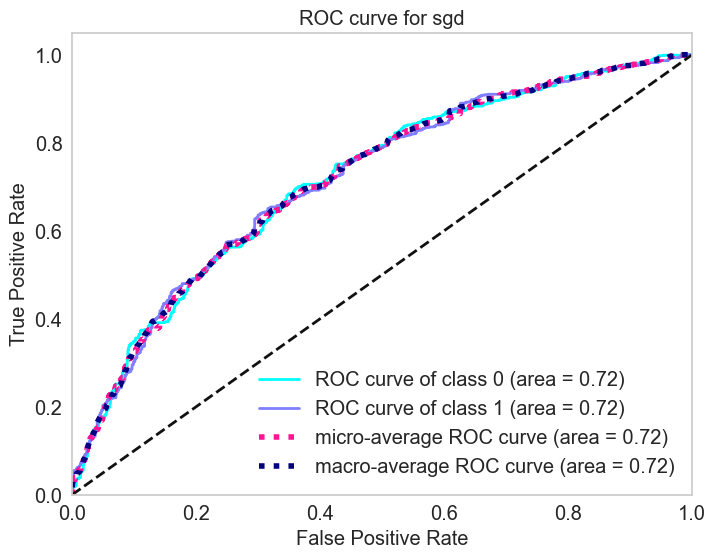

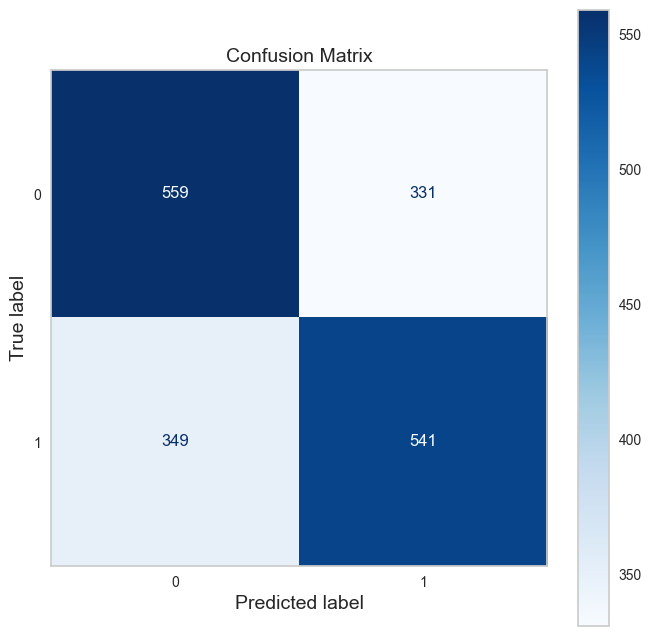



Feature importance not available for sgd






----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.65      0.62      0.63       890
           1       0.63      0.67      0.65       890

    accuracy                           0.64      1780
   macro avg       0.64      0.64      0.64      1780
weighted avg       0.64      0.64      0.64      1780



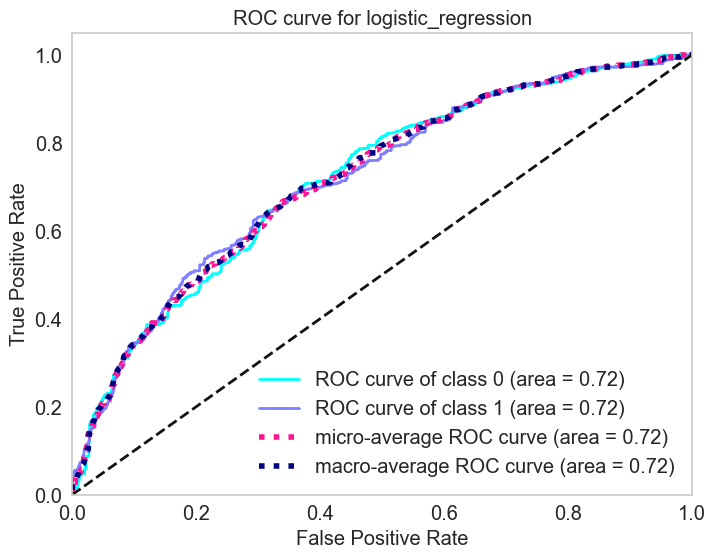

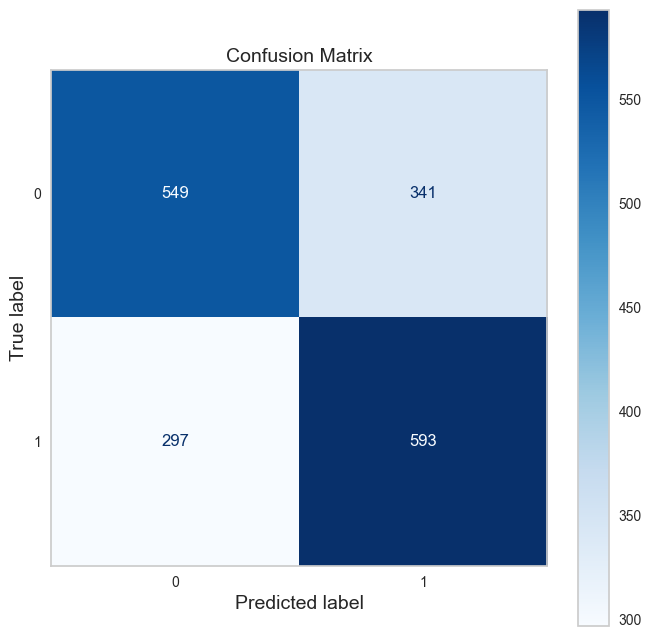

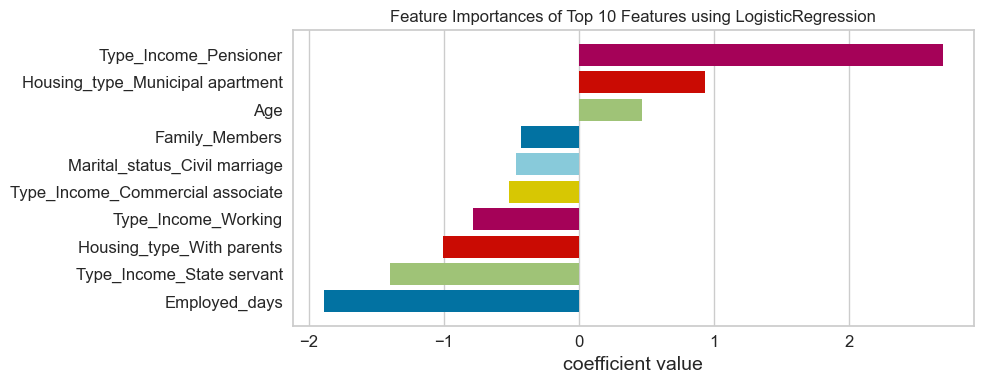

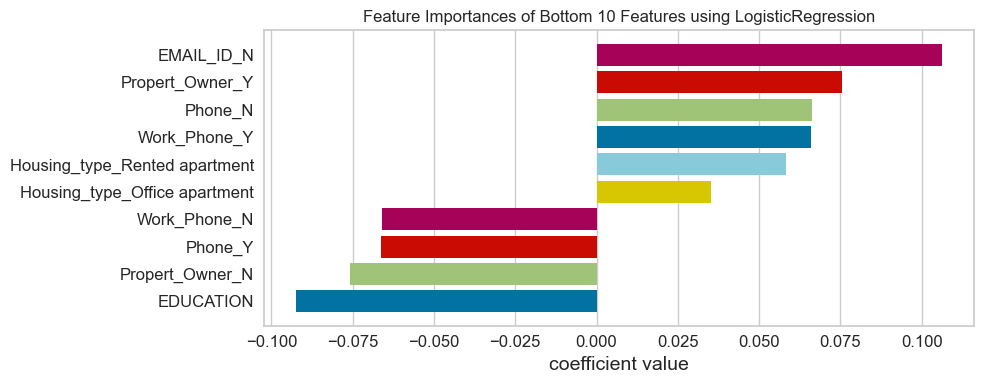







----------------------  support_vector_machine  ----------------------


              precision    recall  f1-score   support

           0       0.86      0.72      0.78       890
           1       0.76      0.88      0.81       890

    accuracy                           0.80      1780
   macro avg       0.81      0.80      0.80      1780
weighted avg       0.81      0.80      0.80      1780



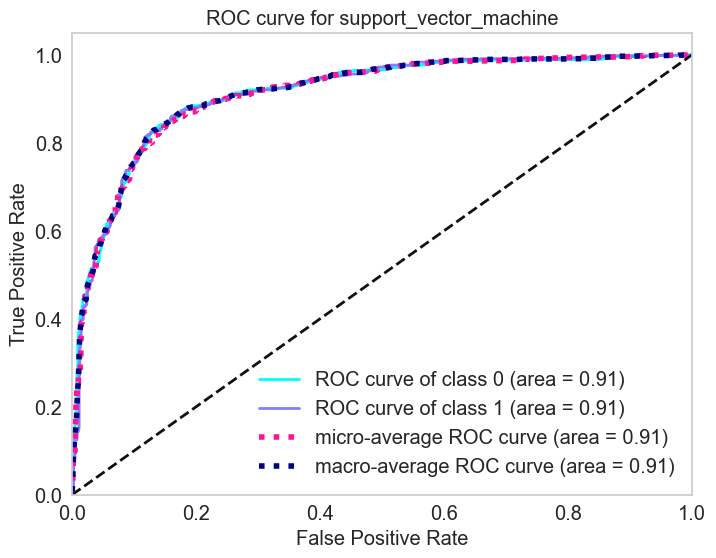

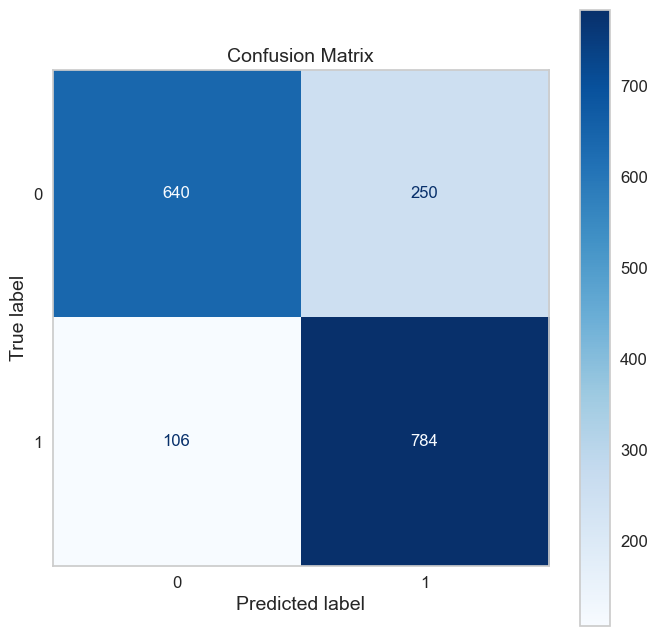



Feature importance not available for support_vector_machine






----------------------  decision_tree  ----------------------


              precision    recall  f1-score   support

           0       0.88      0.85      0.87       890
           1       0.86      0.89      0.87       890

    accuracy                           0.87      1780
   macro avg       0.87      0.87      0.87      1780
weighted avg       0.87      0.87      0.87      1780



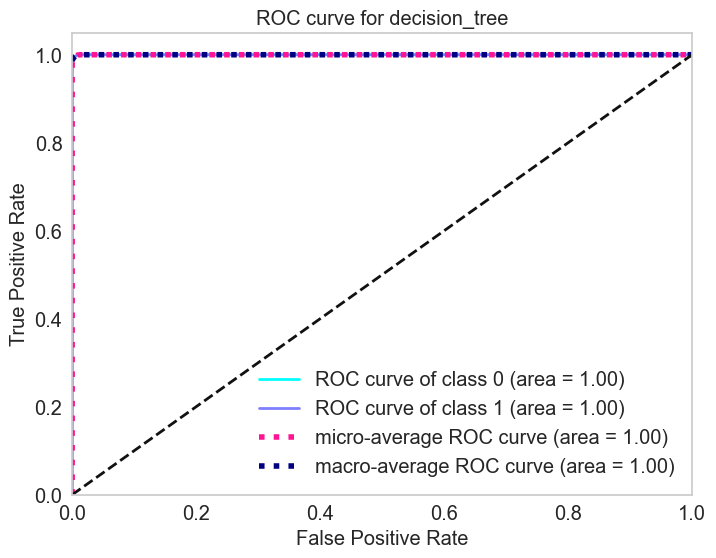

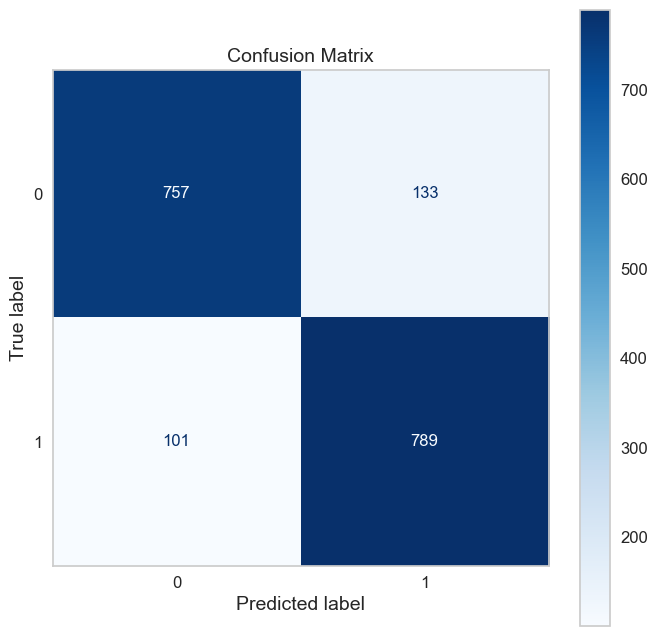

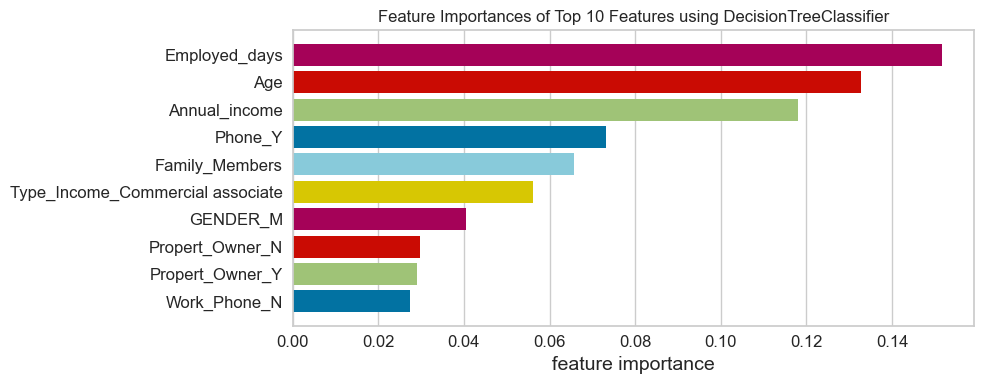

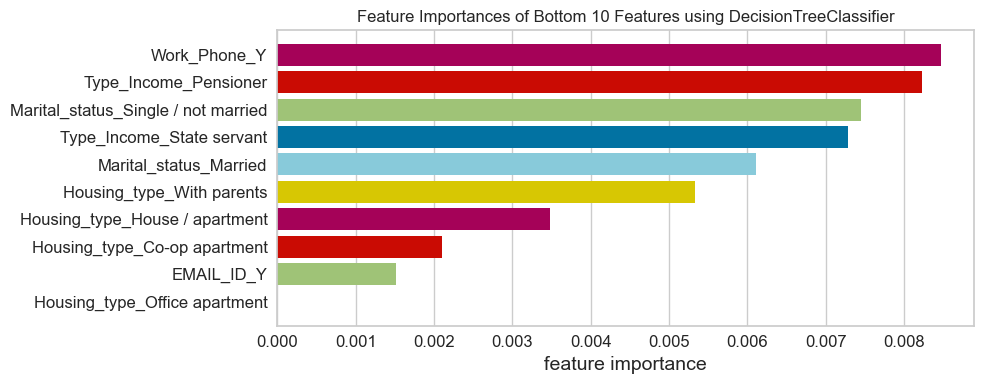







----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       890
           1       0.97      0.95      0.96       890

    accuracy                           0.96      1780
   macro avg       0.96      0.96      0.96      1780
weighted avg       0.96      0.96      0.96      1780



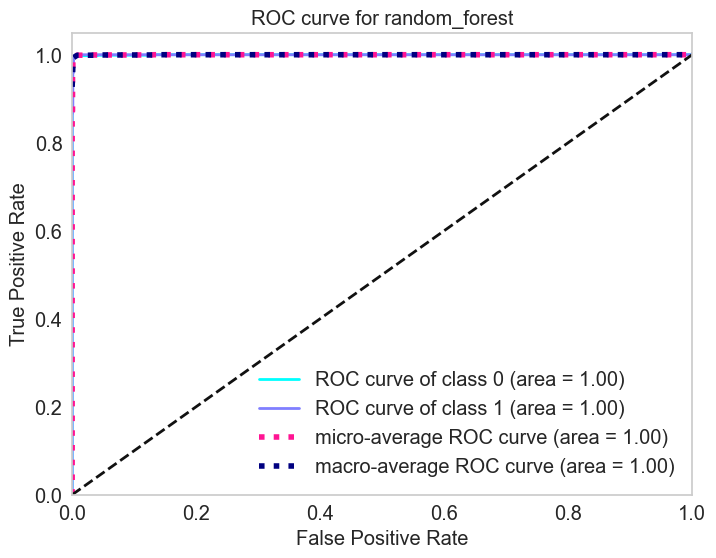

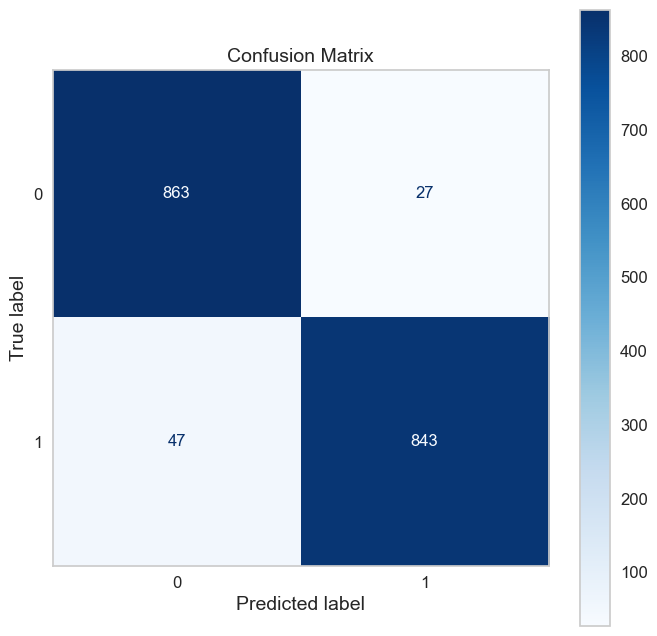

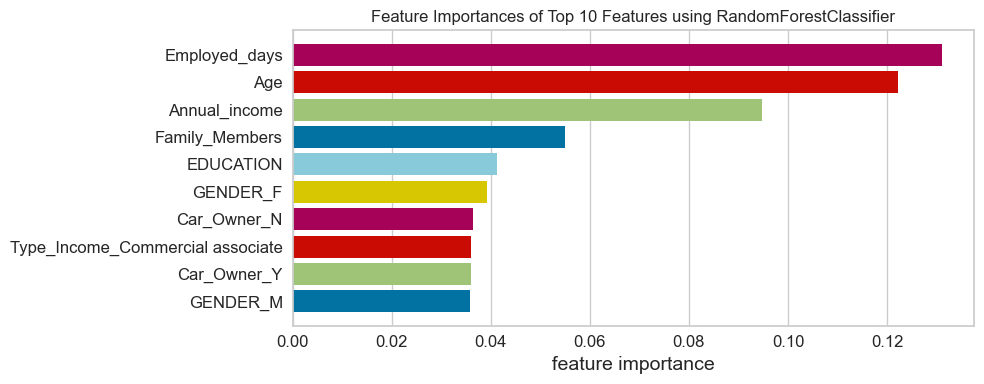

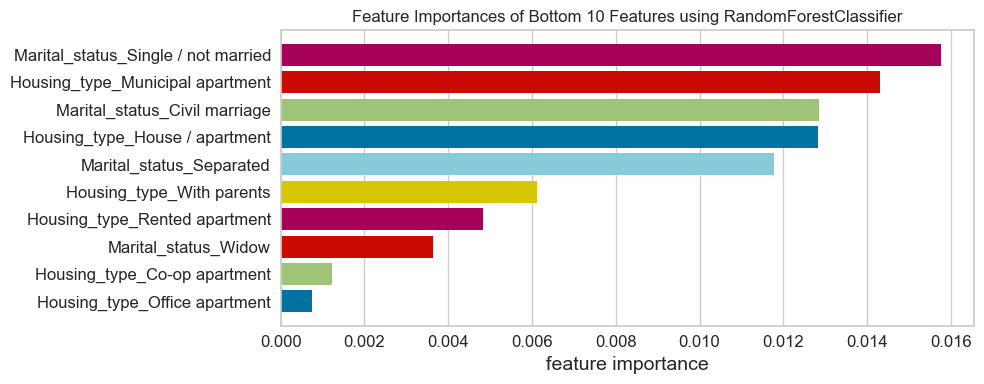







----------------------  gaussian_naive_bayes  ----------------------


              precision    recall  f1-score   support

           0       0.57      0.80      0.67       890
           1       0.67      0.39      0.50       890

    accuracy                           0.60      1780
   macro avg       0.62      0.60      0.58      1780
weighted avg       0.62      0.60      0.58      1780



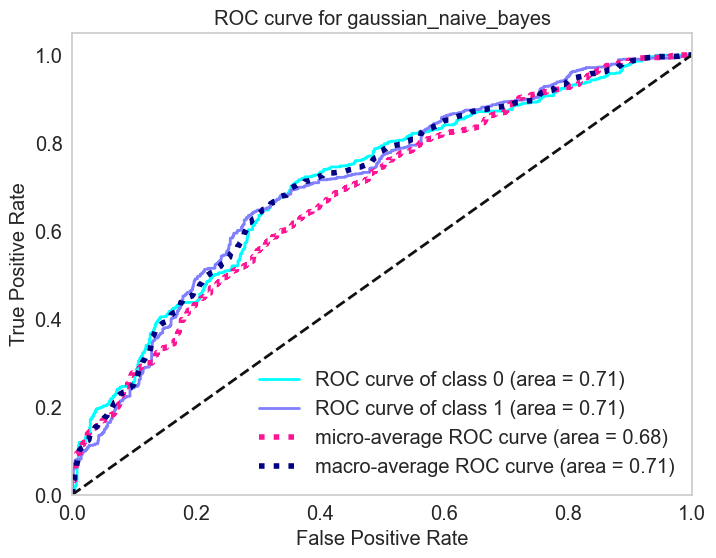

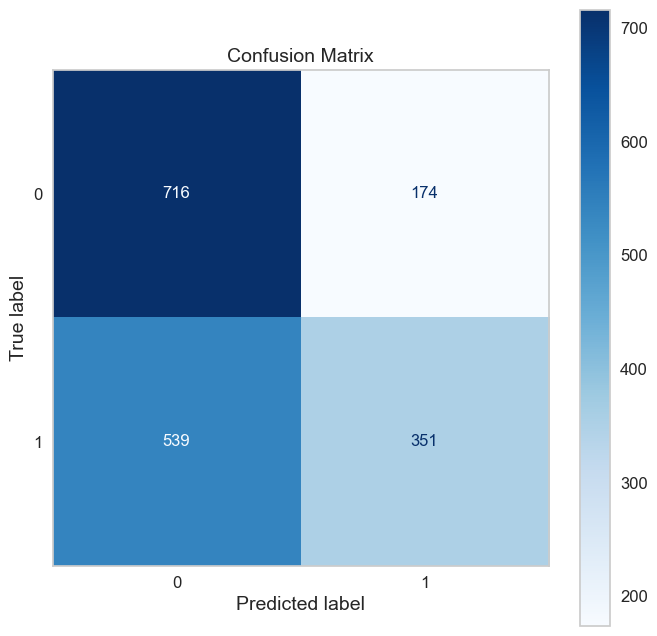



Feature importance not available for gaussian_naive_bayes






----------------------  k_nearest_neighbors  ----------------------


              precision    recall  f1-score   support

           0       0.96      0.78      0.86       890
           1       0.81      0.97      0.88       890

    accuracy                           0.87      1780
   macro avg       0.89      0.87      0.87      1780
weighted avg       0.89      0.87      0.87      1780



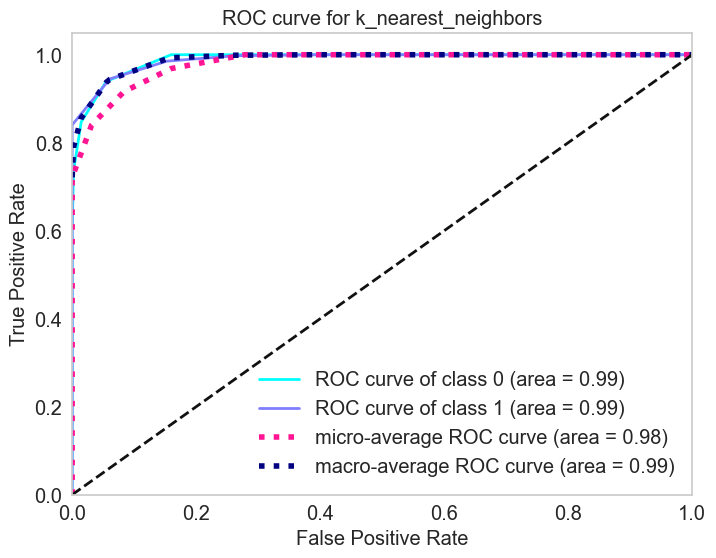

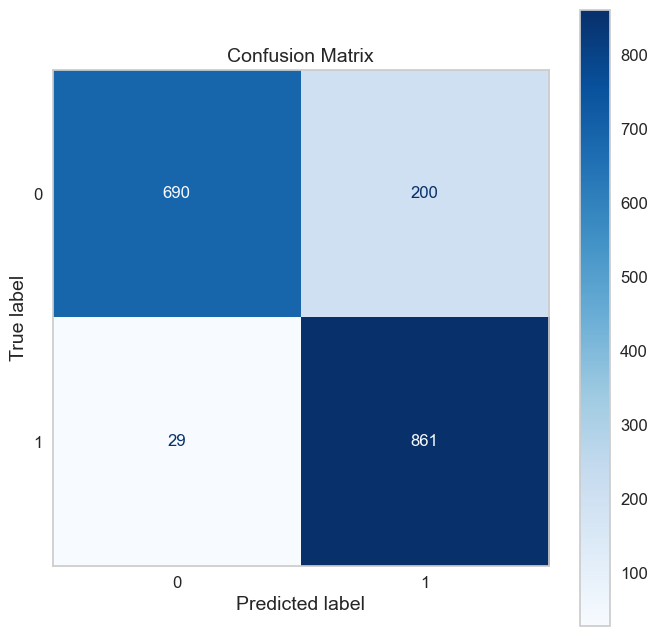



Feature importance not available for k_nearest_neighbors






----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       890
           1       0.92      0.90      0.91       890

    accuracy                           0.91      1780
   macro avg       0.91      0.91      0.91      1780
weighted avg       0.91      0.91      0.91      1780



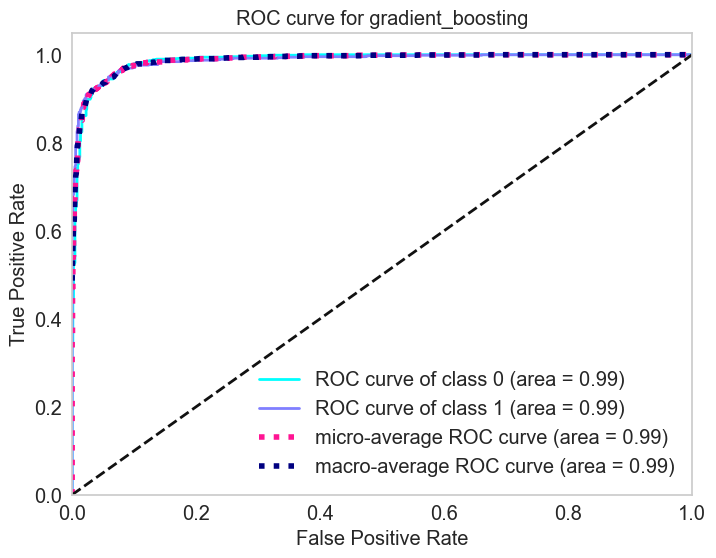

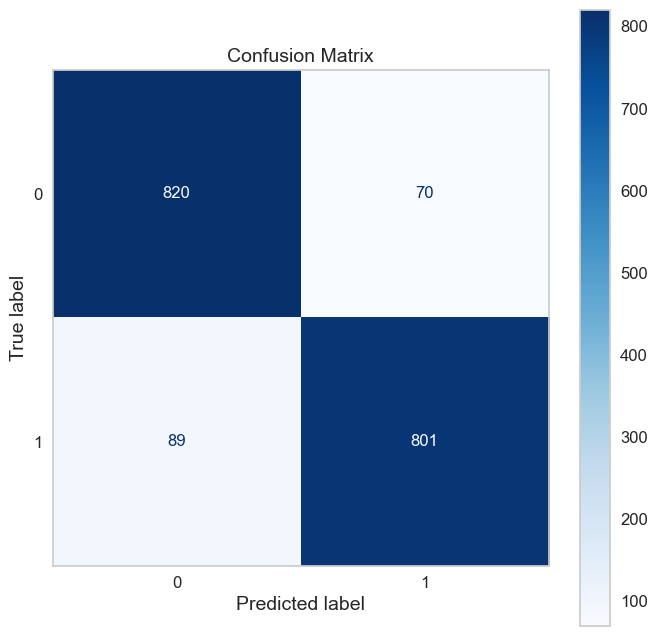

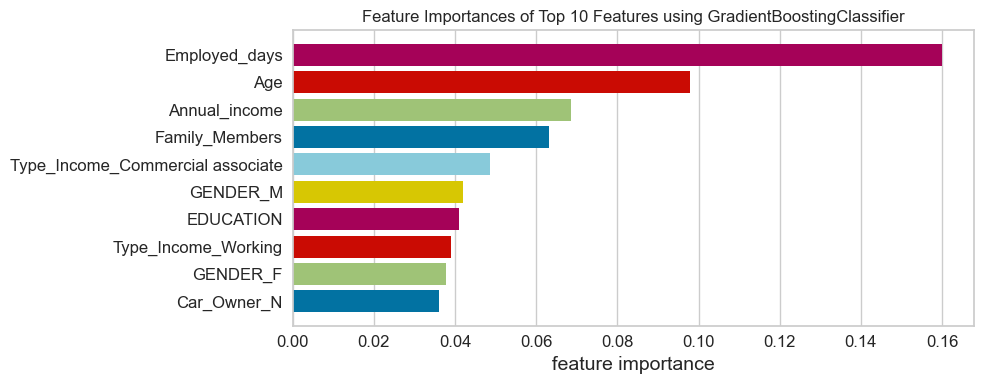

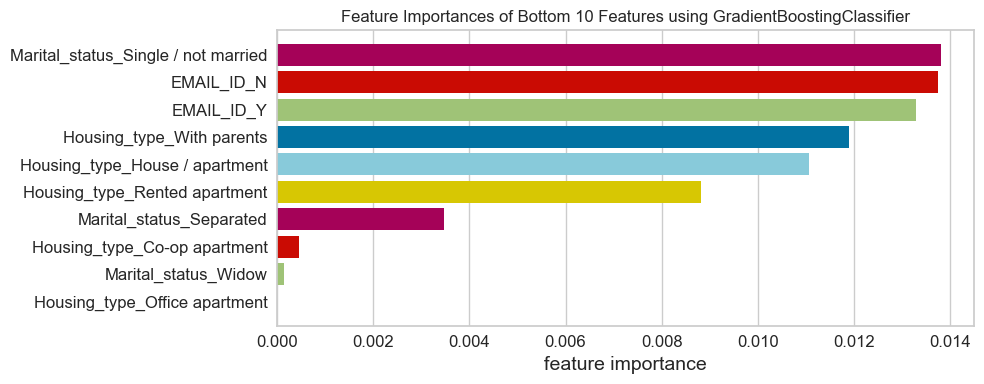







----------------------  linear_discriminant_analysis  ----------------------


              precision    recall  f1-score   support

           0       0.64      0.62      0.63       890
           1       0.63      0.66      0.64       890

    accuracy                           0.64      1780
   macro avg       0.64      0.64      0.64      1780
weighted avg       0.64      0.64      0.64      1780



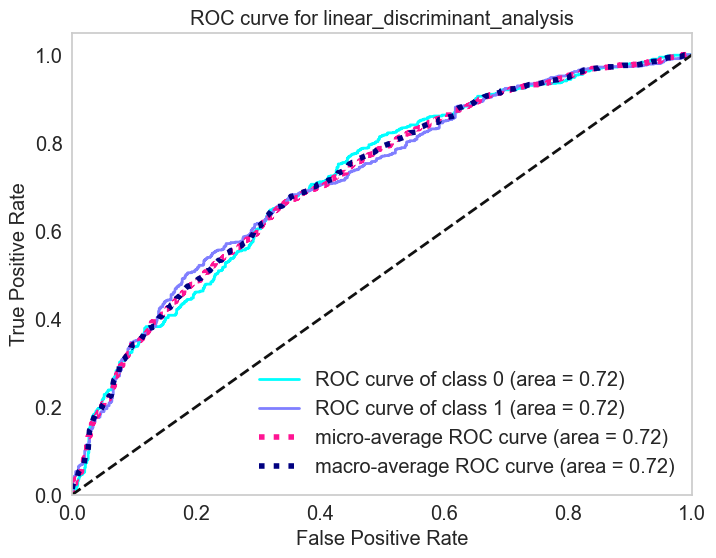

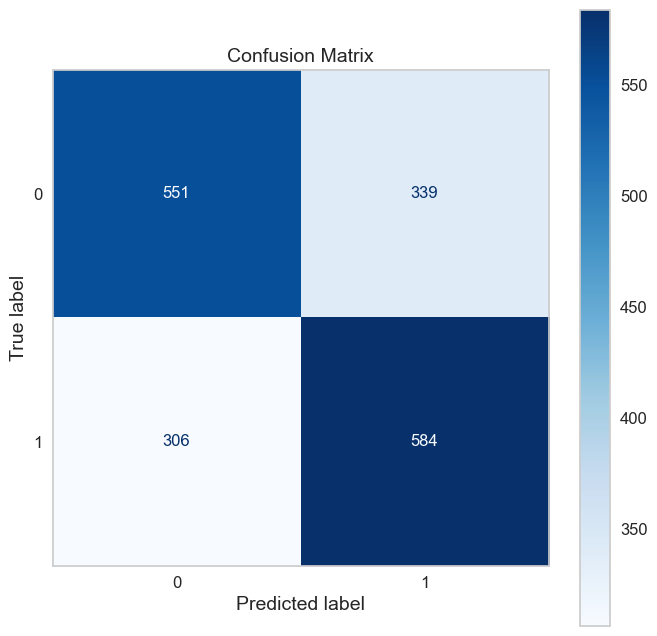

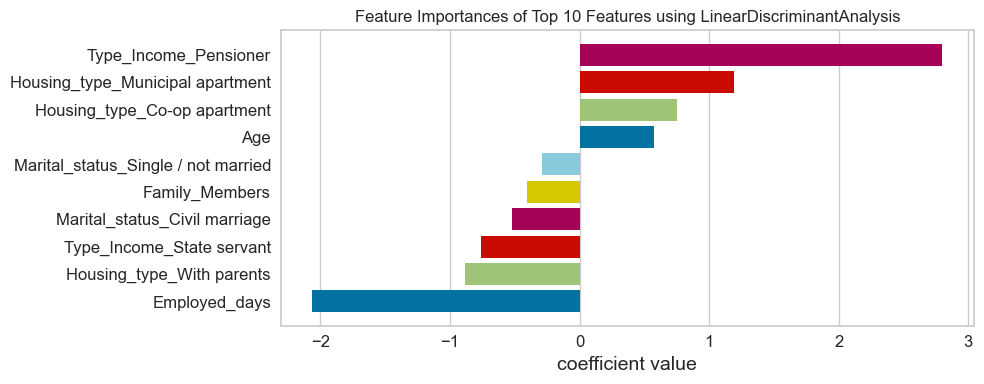

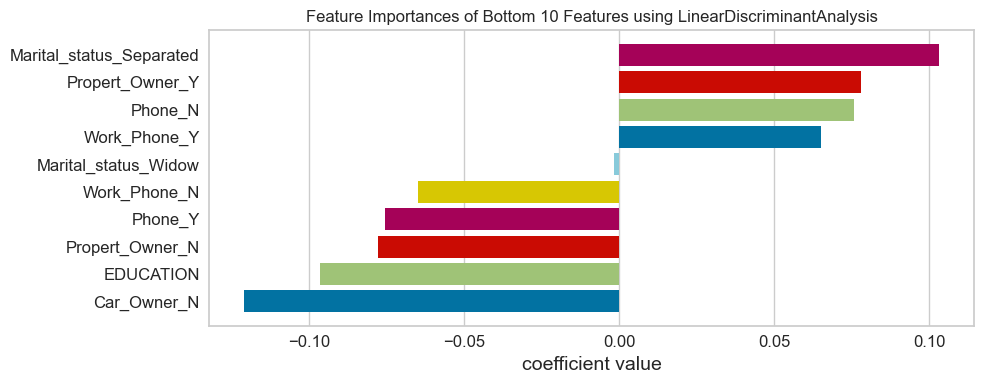







----------------------  bagging  ----------------------


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       890
           1       0.92      0.92      0.92       890

    accuracy                           0.92      1780
   macro avg       0.92      0.92      0.92      1780
weighted avg       0.92      0.92      0.92      1780



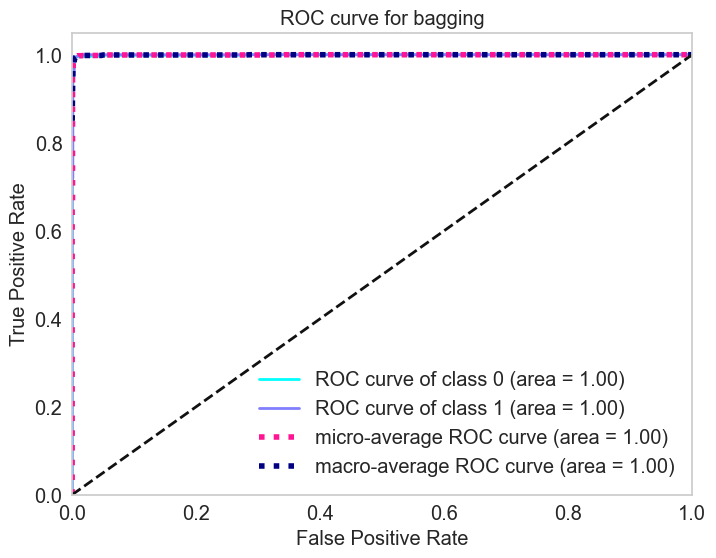

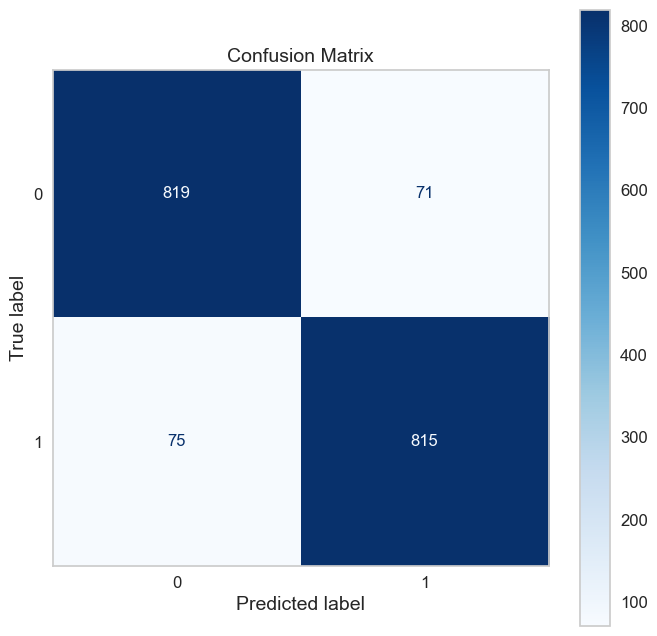



Feature importance not available for bagging






----------------------  neural_network  ----------------------


              precision    recall  f1-score   support

           0       0.90      0.85      0.87       890
           1       0.86      0.90      0.88       890

    accuracy                           0.88      1780
   macro avg       0.88      0.88      0.88      1780
weighted avg       0.88      0.88      0.88      1780



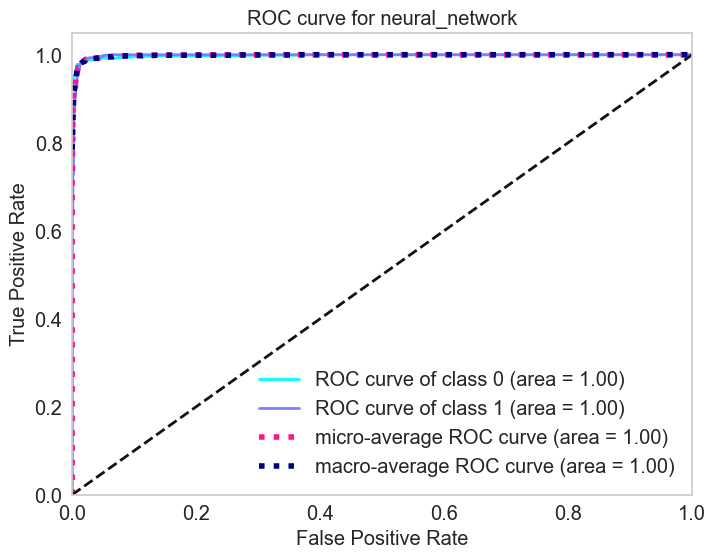

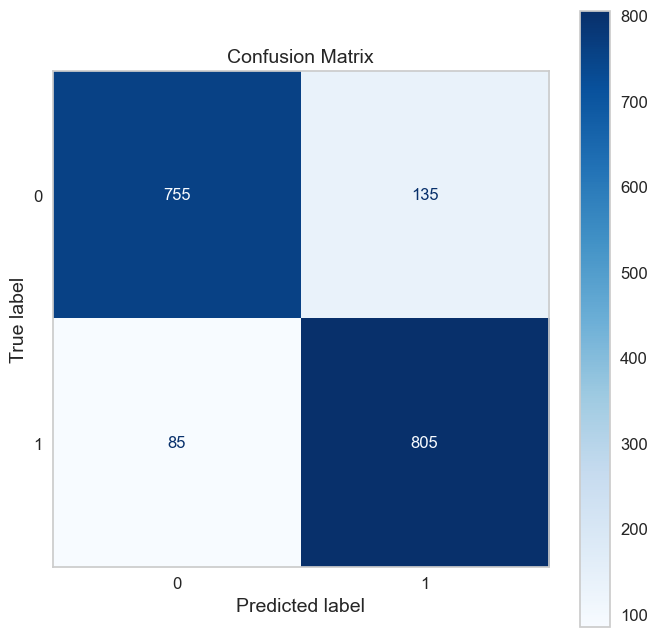



Feature importance not available for neural_network






----------------------  adaboost  ----------------------


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       890
           1       0.80      0.78      0.79       890

    accuracy                           0.79      1780
   macro avg       0.79      0.79      0.79      1780
weighted avg       0.79      0.79      0.79      1780



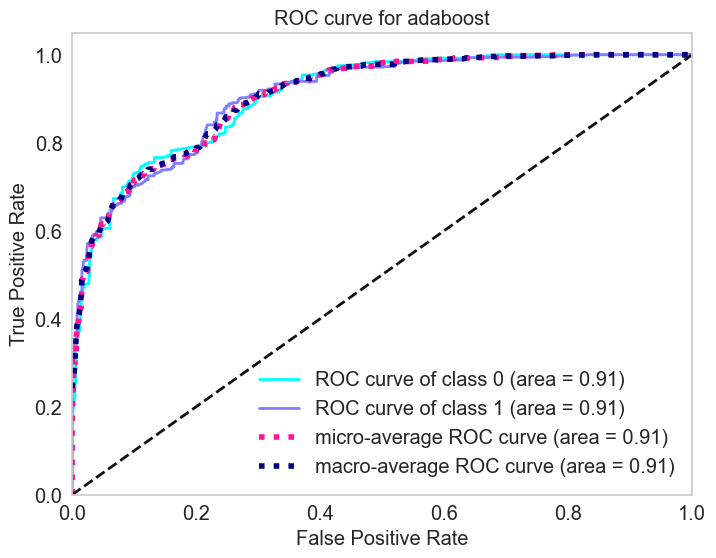

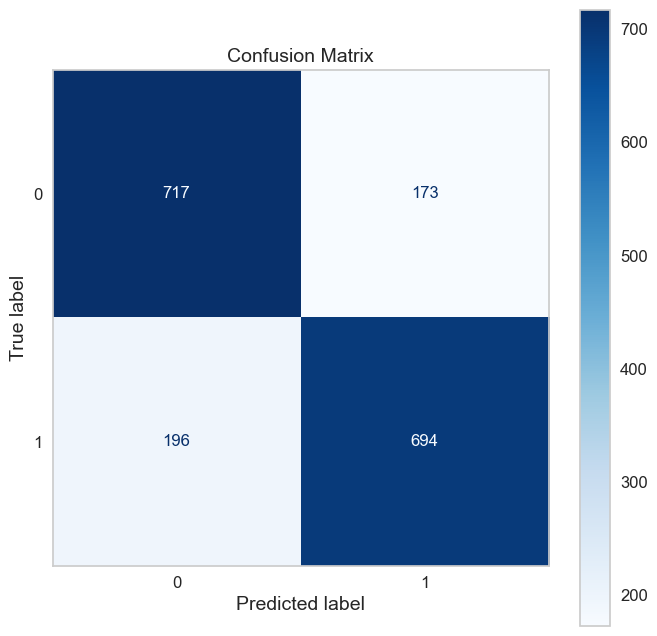

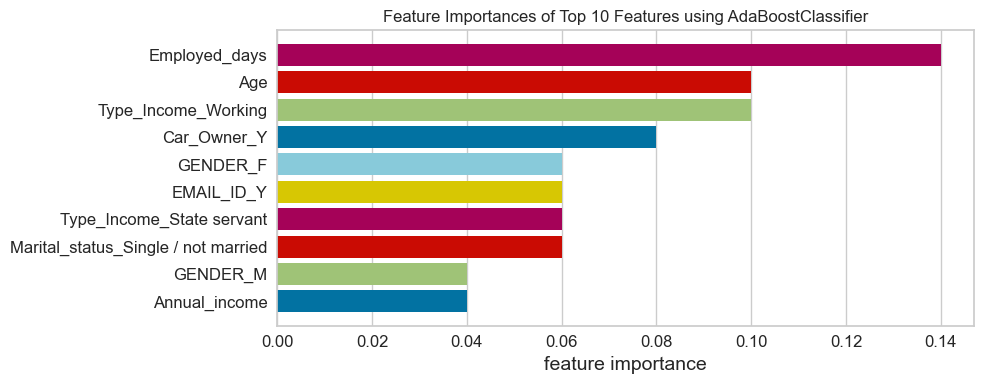

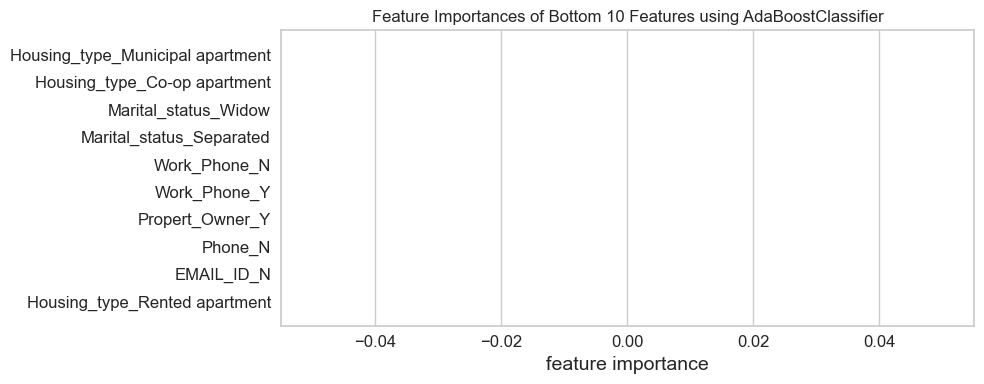







----------------------  extra_trees  ----------------------


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       890
           1       0.96      0.97      0.97       890

    accuracy                           0.97      1780
   macro avg       0.97      0.97      0.97      1780
weighted avg       0.97      0.97      0.97      1780



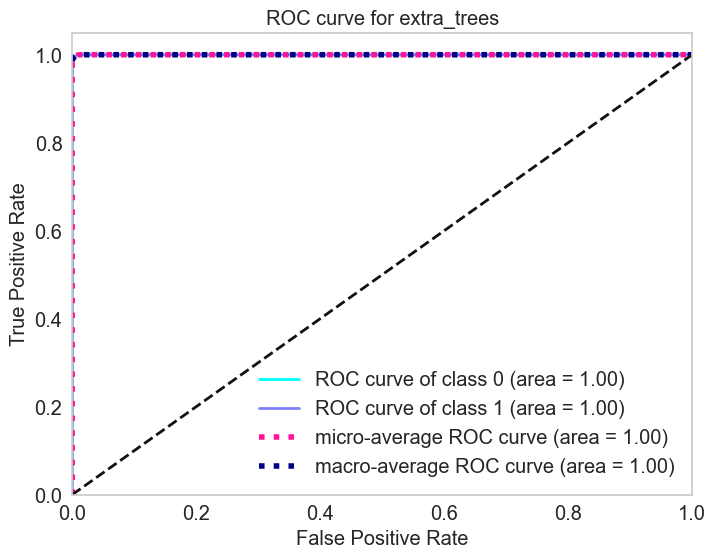

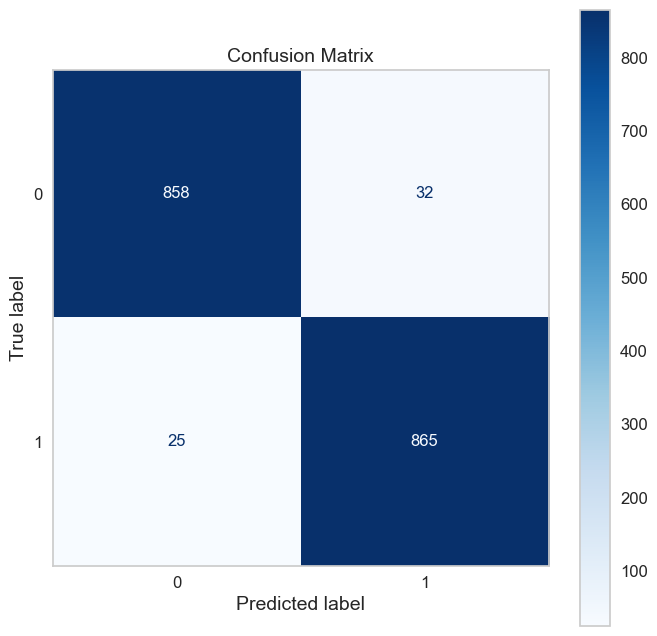

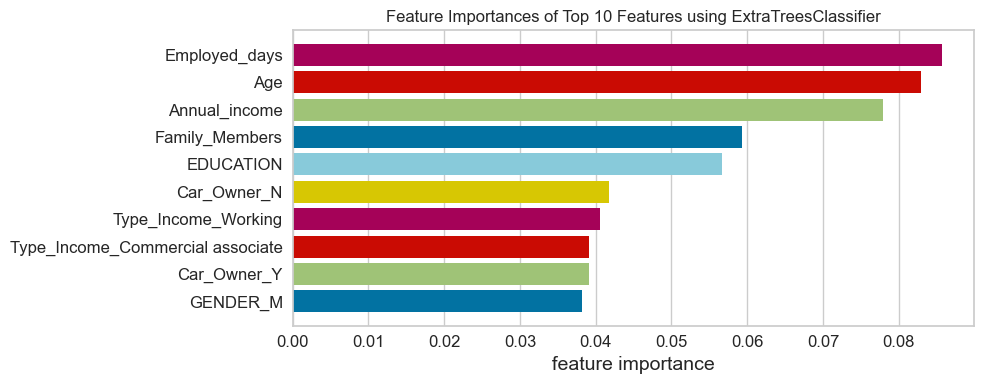

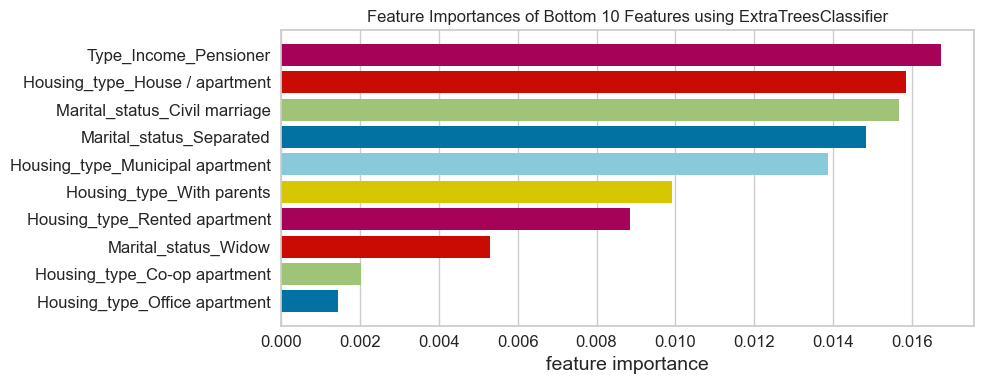

In [128]:
for model_name, model in classifiers.items():
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    model_folder_check()
    # train the model
    model_train = train_model(model,model_name)
    # print score from the classification report
    score_func(model_train, model_name)
    # Roc curve plot
    roc_curve(model_train,model_name)
    # confusion matrix plot
    confusion_matrix(model_train, model_name)
    # feature importance plot
    plot_feature_importance(model_train,model_name)
    warnings.filterwarnings("ignore")

# 6.How to choose best model?
+ we choose best model based on precision ,recall and ROC curve of the trained model

#### When recall considerd?
+ When the economy is thriving, people experience a sense of prosperity and employment. Typically, money is inexpensive, and the risk of default is minimal due to economic stability and low unemployment. Financial institutions can manage the risk of default, and therefore, they are not overly stringent in granting credit. The institution can accommodate some high-risk clients as long as the majority of credit card holders are reliable clients, namely those who consistently repay their credit on time and in full. In such a scenario, achieving a high recall (sensitivity) is considered.

#### When precision considered?
+ When the economy is in decline, individuals face job losses and financial setbacks, often stemming from the stock market and other investment platforms. Many people find it challenging to fulfill their financial responsibilities. Consequently, financial institutions adopt a more conservative approach in extending credit or loans. The institution cannot risk providing credit to numerous clients who may struggle to repay. In this situation, the financial institution prioritizes having a smaller but more reliable clientele, even if it results in denying credit to some creditworthy clients. In such cases, achieving good precision (specificity) is considered.

#### Best Model
+ After analyzing the ROC curve and recall of all the trained models, it is apparent that our best-performing model is Gradient Boosting.

# 7.Test Best model on test data

In [129]:
cc_test_original.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5029028      F         N             Y         0       90000.00   
1  5051097      F         N             N         0       69750.00   
2  5028990      F         N             N         2       81000.00   
3  5145968      F         N             Y         0      112500.00   
4  5052755      M         N             Y         0      225000.00   

  Type_Income                      EDUCATION        Marital_status  \
0     Working                Lower secondary  Single / not married   
1   Pensioner  Secondary / secondary special                 Widow   
2     Working                Lower secondary  Single / not married   
3   Pensioner  Secondary / secondary special                 Widow   
4     Working  Secondary / secondary special        Civil marriage   

          Housing_type       Age  Employed_days  Mobile_phone  Work_Phone  \
0     Rented apartment -12026.00          -4770             1           0   
1  Municipal apartment -21986.00         365243             1           0   
2    House / apartment -15373.00          -2333             1           0   
3    House / apartment -23018.00         365243             1           0   
4    House / apartment -10570.00          -1175             1           0   

   Phone  EMAIL_ID Type_Occupation  Family_Members  Is_high_risk  
0      0         0  Cleaning staff               2             1  
1      1         0             NaN               1             0  
2      0         0     Sales staff               3             0  
3      0         0             NaN               1             0  
4      0         0        Managers               2             0

In [131]:
cc_test_original.shape

(310, 19)

In [132]:
pd.options.mode.chained_assignment = None 
cc_test_prep_data = full_pipeline(cc_test_original)

In [133]:
cc_test_prep_data.head()

GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  Propert_Owner_N  \
0      1.00      0.00         1.00         0.00             0.00   
1      1.00      0.00         1.00         0.00             1.00   
2      0.00      1.00         1.00         0.00             0.00   
3      0.00      1.00         1.00         0.00             0.00   
4      1.00      0.00         0.00         1.00             0.00   

   Propert_Owner_Y  Marital_status_Civil marriage  Marital_status_Married  \
0             1.00                           0.00                    0.00   
1             0.00                           0.00                    0.00   
2             1.00                           1.00                    0.00   
3             1.00                           0.00                    0.00   
4             1.00                           0.00                    1.00   

   Marital_status_Separated  Marital_status_Single / not married  \
0                      0.00                                 1.00   
1                      0.00                                 1.00   
2                      0.00                                 0.00   
3                      0.00                                 1.00   
4                      0.00                                 0.00   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                  0.00                          0.00   
1                  0.00                          0.00   
2                  0.00                          0.00   
3                  0.00                          0.00   
4                  0.00                          0.00   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                            0.00                              0.00   
1                            1.00                              0.00   
2                            1.00                              0.00   
3                            1.00                              0.00   
4                            1.00                              0.00   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                           0.00                           1.00   
1                           0.00                           0.00   
2                           0.00                           0.00   
3                           0.00                           0.00   
4                           0.00                           0.00   

   Housing_type_With parents  Type_Income_Commercial associate  \
0                       0.00                              0.00   
1                       0.00                              0.00   
2                       0.00                              0.00   
3                       0.00                              0.00   
4                       0.00                              0.00   

   Type_Income_State servant  Type_Income_Working  Work_Phone_N  Work_Phone_Y  \
0                       0.00                 1.00          1.00          0.00   
1                       0.00                 1.00          1.00          0.00   
2                       0.00                 1.00          1.00          0.00   
3                       0.00                 1.00          1.00          0.00   
4                       1.00                 0.00          0.00          1.00   

   Phone_N  Phone_Y  EMAIL_ID_N  EMAIL_ID_Y  Annual_income  EDUCATION  Age  \
0     1.00     0.00        1.00        0.00           0.24       3.00 0.35   
1     1.00     0.00        1.00        0.00           0.21       3.00 0.57   
2     1.00     0.00        1.00        0.00           0.57       4.00 0.25   
3     1.00     0.00        1.00        0.00           0.48       4.00 0.42   
4     1.00     0.00        1.00        0.00           0.34       4.00 0.83   

   Employed_days  Family_Members  Is_high_risk  
0           0.41               2             1  
1           0.20               3             0  
2           0.09               2             0  


In [135]:
cc_test_prep_data.shape

(460, 32)

In [136]:
cc_test_prep_data.insert(18,'Type_Income_Pensioner', 0.00)

In [137]:
cc_test_prep_data.head()

GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  Propert_Owner_N  \
0      1.00      0.00         1.00         0.00             0.00   
1      1.00      0.00         1.00         0.00             1.00   
2      0.00      1.00         1.00         0.00             0.00   
3      0.00      1.00         1.00         0.00             0.00   
4      1.00      0.00         0.00         1.00             0.00   

   Propert_Owner_Y  Marital_status_Civil marriage  Marital_status_Married  \
0             1.00                           0.00                    0.00   
1             0.00                           0.00                    0.00   
2             1.00                           1.00                    0.00   
3             1.00                           0.00                    0.00   
4             1.00                           0.00                    1.00   

   Marital_status_Separated  Marital_status_Single / not married  \
0                      0.00                                 1.00   
1                      0.00                                 1.00   
2                      0.00                                 0.00   
3                      0.00                                 1.00   
4                      0.00                                 0.00   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                  0.00                          0.00   
1                  0.00                          0.00   
2                  0.00                          0.00   
3                  0.00                          0.00   
4                  0.00                          0.00   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                            0.00                              0.00   
1                            1.00                              0.00   
2                            1.00                              0.00   
3                            1.00                              0.00   
4                            1.00                              0.00   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                           0.00                           1.00   
1                           0.00                           0.00   
2                           0.00                           0.00   
3                           0.00                           0.00   
4                           0.00                           0.00   

   Housing_type_With parents  Type_Income_Commercial associate  \
0                       0.00                              0.00   
1                       0.00                              0.00   
2                       0.00                              0.00   
3                       0.00                              0.00   
4                       0.00                              0.00   

   Type_Income_Pensioner  Type_Income_State servant  Type_Income_Working  \
0                   0.00                       0.00                 1.00   
1                   0.00                       0.00                 1.00   
2                   0.00                       0.00                 1.00   
3                   0.00                       0.00                 1.00   
4                   0.00                       1.00                 0.00   

   Work_Phone_N  Work_Phone_Y  Phone_N  Phone_Y  EMAIL_ID_N  EMAIL_ID_Y  \
0          1.00          0.00     1.00     0.00        1.00        0.00   
1          1.00          0.00     1.00     0.00        1.00        0.00   
2          1.00          0.00     1.00     0.00        1.00        0.00   
3          1.00          0.00     1.00     0.00        1.00        0.00   
4          0.00          1.00     1.00     0.00        1.00        0.00   

   Annual_income  EDUCATION  Age  Employed_days  Family_Members  Is_high_risk  
0           0.24       3.00 0.35           0.41               2             1  
1           0.21       3.00 0.57           0.20               3             0  
2   

In [138]:
cc_test_prep_data.shape

(460, 33)

In [139]:
X_cc_test_prep_data,y_cc_test_prep_data = cc_test_prep_data.loc[:,cc_test_prep_data.columns != 'Is_high_risk'],cc_test_prep_data['Is_high_risk'].astype('int64')

In [148]:
# train the model
trained_model = train_model(classifiers['gradient_boosting'],'gradient_boosting')

In [149]:
# Make predictions on the test data
predicted_labels = model_train.predict(X_cc_test_prep_data)

In [151]:
# We use the sum function to compare the predicted and actual target values. We store the count of the correct predictions in correct_prediction
correct_prediction = sum(predicted_labels == y_cc_test_prep_data)

In [152]:
# Count the correct predictions
correct_predictions_count = sum(predicted_labels == y_cc_test_prep_data)

In [153]:
# Calculate accuracy
accuracy = correct_predictions_count / len(predicted_labels)

In [154]:
# Print the accuracy
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 88.48%
